In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
import graphviz
from datetime import datetime
from sklearn import tree
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)
from folium.plugins import FastMarkerCluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn import linear_model
from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [5]:
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [6]:
bos_listings = pd.read_csv('listings.csv')
bos_reviews = pd.read_csv('reviews.csv')

In [7]:
pd.set_option('display.max_columns', None)
bos_listings.head(3)

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   

  last_scraped                               name  \
0   2016-09-07         Sunny Bungalow in the City   
1   2016-09-07  Charming room in pet friendly apt   
2   2016-09-07   Mexican Folk Art Haven in Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   

                               neighborhood_overview  \
0  Roslindale is quiet, convenient and friendly. ...   
1  The room is in Roslindale, a diverse and prima...   
2  The LOCATION: Roslindale is a safe and diverse...   

                                               notes  \
0                                                NaN   
1  If you don't have a US cell phone, you can tex...   
2  I am in a scenic part of Boston with a couple ...   

                                             transit  \
0  The bus stop is 2 blocks away, and frequent. B...   
1  Plenty of safe street parking. Bus stops a few...   
2  PUBLIC TRANSPORTATION: From the house, quick p...   

                                              access  \
0  You will have access to 2 bedrooms, a living r...   
1  Apt has one more bedroom (which I use) and lar...   
2  I am living in the apartment during your stay,...   

                                         interaction  \
0                                                NaN   
1  If I am at home, I am likely working in my hom...   
2  ABOUT ME: I'm a laid-back, friendly, unmarried...   

                                         house_rules  \
0  Clean up and treat the home the way you'd like...   
1  Pet friendly but please confirm with me if the...   
2  I encourage you to use my kitchen, cooking and...   

                                       thumbnail_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   
1  https://a1.muscache.com/im/pictures/39327812/d...   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...   

                                          medium_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   
1  https://a1.muscache.com/im/pictures/39327812/d...   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...   

                                         picture_url  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...   
1  https://a1.muscache.com/im/pictures/39327812/d...   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...   

                                      xl_picture_url   host_id  \
0  https://a2.muscache.com/im/pictures/c0842db1-e...  31303940   
1  https://a1.muscache.com/im/pictures/39327812/d...   2572247   
2  https://a2.muscache.com/im/pictures/6ae8335d-9...     16701   

                                     host_url host_name  host_since  \
0  https://www.airbnb.com/users/show/31303940  Virginia  2015-04-15   
1   https://www.airbnb.com/users/show/2572247    Andrea  2012-06-07   
2     https://www.airbnb.com/users/show/16701      Phil  2009-05-11   

                          host_location  \
0  Boston, Massachusetts, United States   
1  Boston, Massachusetts, United States   
2  Boston, Massachusetts, United States   

            

In [8]:
bos_listings.tail(3)

id                            listing_url       scrape_id  \
3582  14585486  https://www.airbnb.com/rooms/14585486  20160906204935   
3583  14603878  https://www.airbnb.com/rooms/14603878  20160906204935   
3584  14504422  https://www.airbnb.com/rooms/14504422  20160906204935   

     last_scraped                                   name  \
3582   2016-09-07               Gorgeous funky apartment   
3583   2016-09-07  Great Location; Train and Restaurants   
3584   2016-09-07     (K1) Private Room near Harvard/MIT   

                                                summary  \
3582  Funky little apartment close to public transpo...   
3583  My place is close to Taco Loco Mexican Grill, ...   
3584  My place is close to My home is a warm and fri...   

                                                  space  \
3582  Modern and relaxed space with many facilities ...   
3583                                                NaN   
3584  To ensure a smooth check in: 1. You MUST have ...   

                                            description experiences_offered  \
3582  Funky little apartment close to public transpo...                none   
3583  My place is close to Taco Loco Mexican Grill, ...                none   
3584  My place is close to My home is a warm and fri...                none   

                                  neighborhood_overview  \
3582  Cambridge is a short walk into Boston, and set...   
3583                                                NaN   
3584                                                NaN   

                                                  notes  \
3582  Depending on when you arrive, I can be here to...   
3583                                                NaN   
3584                                                NaN   

                                                transit  \
3582  Public transport is 5 minuts away, but walking...   
3583                                                NaN   
3584                                                NaN   

                                                 access interaction  \
3582  The whole place including social areas is your...         NaN   
3583                                                NaN         NaN   
3584                                                NaN         NaN   

     house_rules                                      thumbnail_url  \
3582         NaN  https://a2.muscache.com/im/pictures/eb32a608-a...   
3583         NaN  https://a2.muscache.com/im/pictures/4b56e0c4-6...   
3584         NaN  https://a2.muscache.com/im/pictures/f2b43613-6...   

                                             medium_url  \
3582  https://a2.muscache.com/im/pictures/eb32a608-a...   
3583  https://a2.muscache.com/im/pictures/4b56e0c4-6...   
3584  https://a2.muscache.com/im/pictures/f2b43613-6...   

                                            picture_url  \
3582  https://a2.muscache.com/im/pictures/eb32a608-a...   
3583  https://a2.muscache.com/im/pictures/4b56e0c4-6...   
3584  https://a2.muscache.com/im/pictures/f2b43613-6...   

                                         xl_picture_url   host_id  \
3582  https://a2.muscache.com/im/pictures/eb32a608-a...  11311919   
3583  https://a2.muscache.com/im/pictures/4b56e0c4-6...  74318064   
3584  https://a2.muscache.com/im/pictures/f2b43613-6...  42070843   

                                        host_url host_name  host_since  \
3582  https://www.airbnb.com/users/show/11311919      Vera  2014-01-14   
3583  https://www.airbnb.com/users/show/74318064      Medi  2016-05-27   
3584  https://www.airbnb.com/users/show/42070843    Rachel  2015-08-20   

                                 host_location  \
3582         New York, New York, United States   
3583  Somerville, Massachusetts, United States   
3584  Somerville, Massachusetts, United States   

                                             host_about host_response_time  \
3582                                                NaN       within a day   
3

In [9]:
bos_listings.shape

(3585, 95)

In [10]:
bos_listings_copy = bos_listings

In [72]:
#bos_listings = bos_listings_copy

In [11]:
pd.set_option('display.float_format', '{:.6f}'.format)
bos_listings.describe().T

count                  mean  \
id                             3585.000000        8440874.627615   
scrape_id                      3585.000000 20160906204935.000000   
host_id                        3585.000000       24923107.451046   
host_listings_count            3585.000000             58.902371   
host_total_listings_count      3585.000000             58.902371   
neighbourhood_group_cleansed      0.000000                   NaN   
latitude                       3585.000000             42.340032   
longitude                      3585.000000            -71.084818   
accommodates                   3585.000000              3.041283   
bathrooms                      3571.000000              1.221647   
bedrooms                       3575.000000              1.255944   
beds                           3576.000000              1.609060   
square_feet                      56.000000            858.464286   
guests_included                3585.000000              1.429847   
minimum_nights                 3585.000000              3.171269   
maximum_nights                 3585.000000          28725.836820   
has_availability                  0.000000                   NaN   
availability_30                3585.000000              8.649930   
availability_60                3585.000000             21.833194   
availability_90                3585.000000             38.558159   
availability_365               3585.000000            179.346444   
number_of_reviews              3585.000000             19.044630   
review_scores_rating           2772.000000             91.916667   
review_scores_accuracy         2762.000000              9.431571   
review_scores_cleanliness      2767.000000              9.258041   
review_scores_checkin          2765.000000              9.646293   
review_scores_communication    2767.000000              9.646549   
review_scores_location         2763.000000              9.414043   
review_scores_value            2764.000000              9.168234   
license                           0.000000                   NaN   
jurisdiction_names                0.000000                   NaN   
calculated_host_listings_count 3585.000000             12.733891   
reviews_per_month              2829.000000              1.970908   

                                           std                   min  \
id                              4500786.860725           3353.000000   
scrape_id                             0.000000 20160906204935.000000   
host_id                        22927809.873801           4240.000000   
host_listings_count                 171.119663              0.000000   
host_total_listings_count           171.119663              0.000000   
neighbourhood_group_cleansed               NaN                   NaN   
latitude                              0.024403             42.235942   
longitude                             0.031565            -71.171789   
accommodates                          1.778929              1.000000   
bathrooms                             0.501487              0.000000   
bedrooms                              0.753060              0.000000   
beds                                  1.011745              0.000000   
square_feet                         608.874310              0.000000   
guests_included                       1.056787              0.000000   
minimum_nights                        8.874133              1.000000   
maximum_nights                  1670135.937686              1.000000   
has_availability                           NaN                   NaN   
availability_30                      10.435330              0.000000   
availability_60                      21.860966              0.000000   
availability_90                      33.158272              0.000000   
availability_365                    142.136180              0.000000   
number_of_reviews                    35.571658              0.000000   
review_scores_rating                  9.531686             20.000000

In [12]:
bos_listings.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   756
Length: 95, dtype: int64

In [13]:
bos_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [14]:
#Replacing the values in the columns containing True/False values by 0/1 and inplace=True parameter will directly make
#changes to existing dataset without creating new one

bos_listings.replace({'f':0, 't':1}, inplace = True)

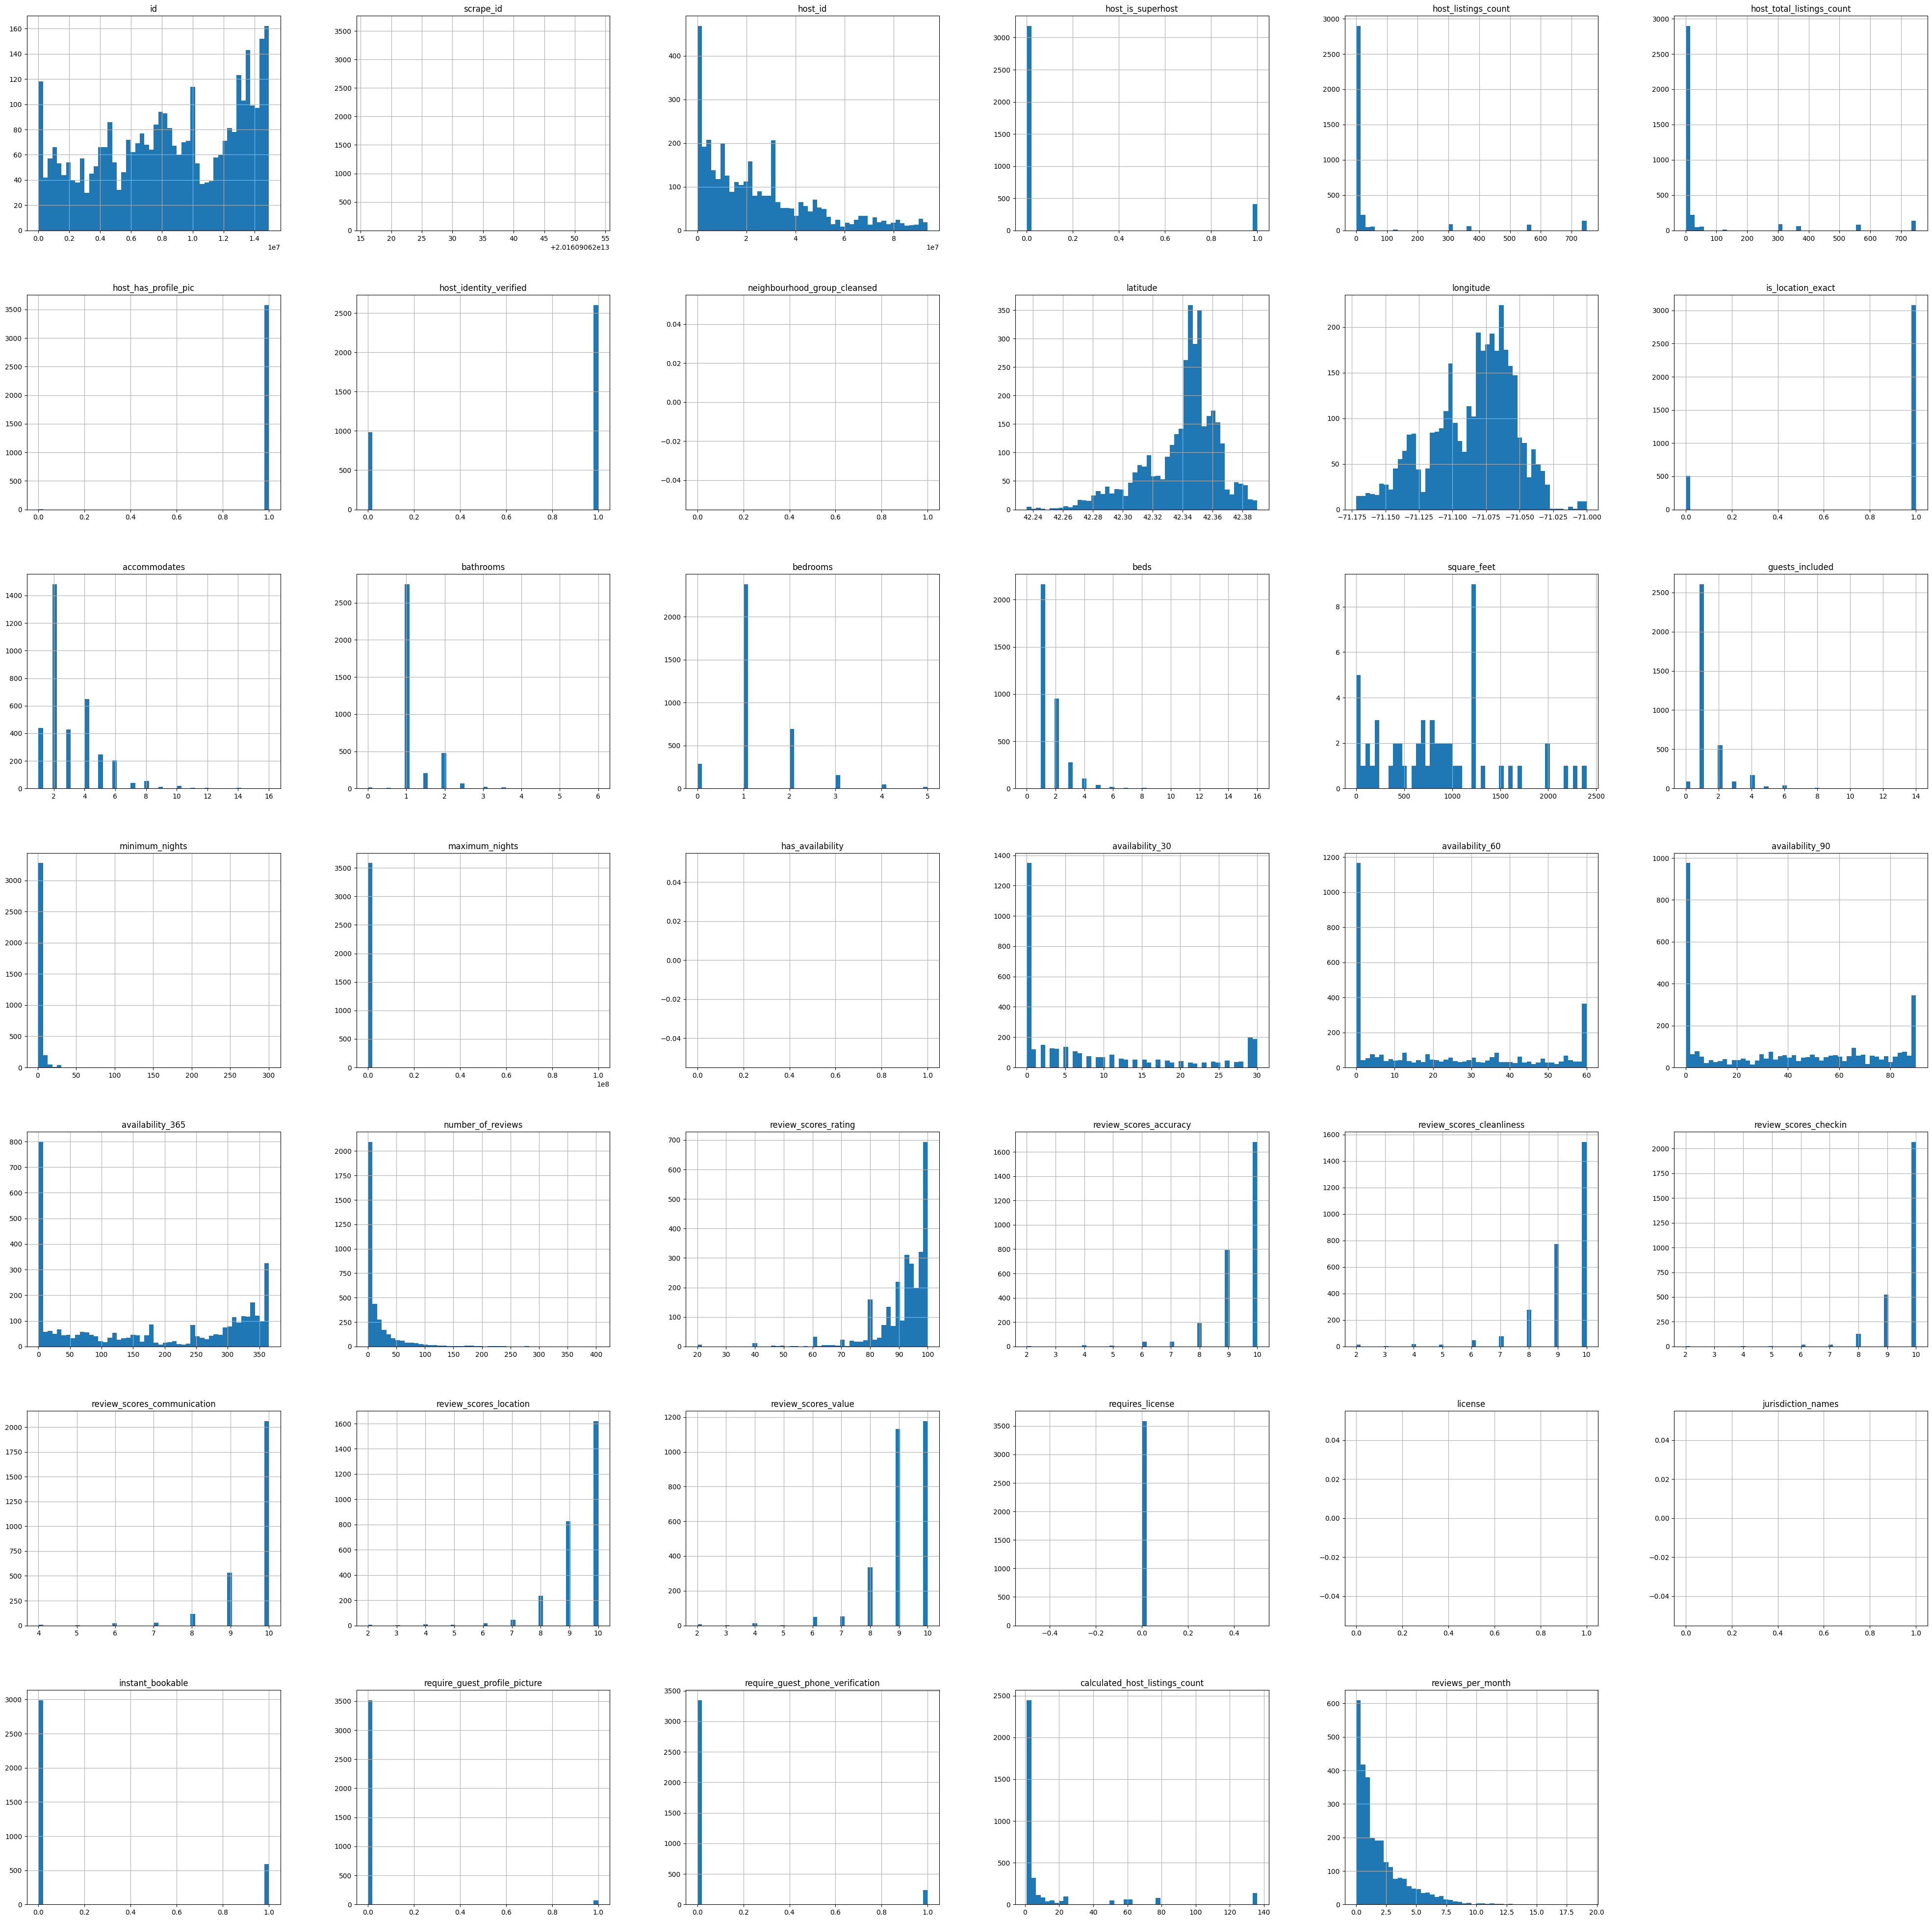

In [15]:
bos_listings.hist(bins = 50, figsize  =(50,50))
plt.show()

<Axes: title={'center': 'Ratio of Missing Values in each Column'}, xlabel='None', ylabel='Missing_Columns_Ratio'>

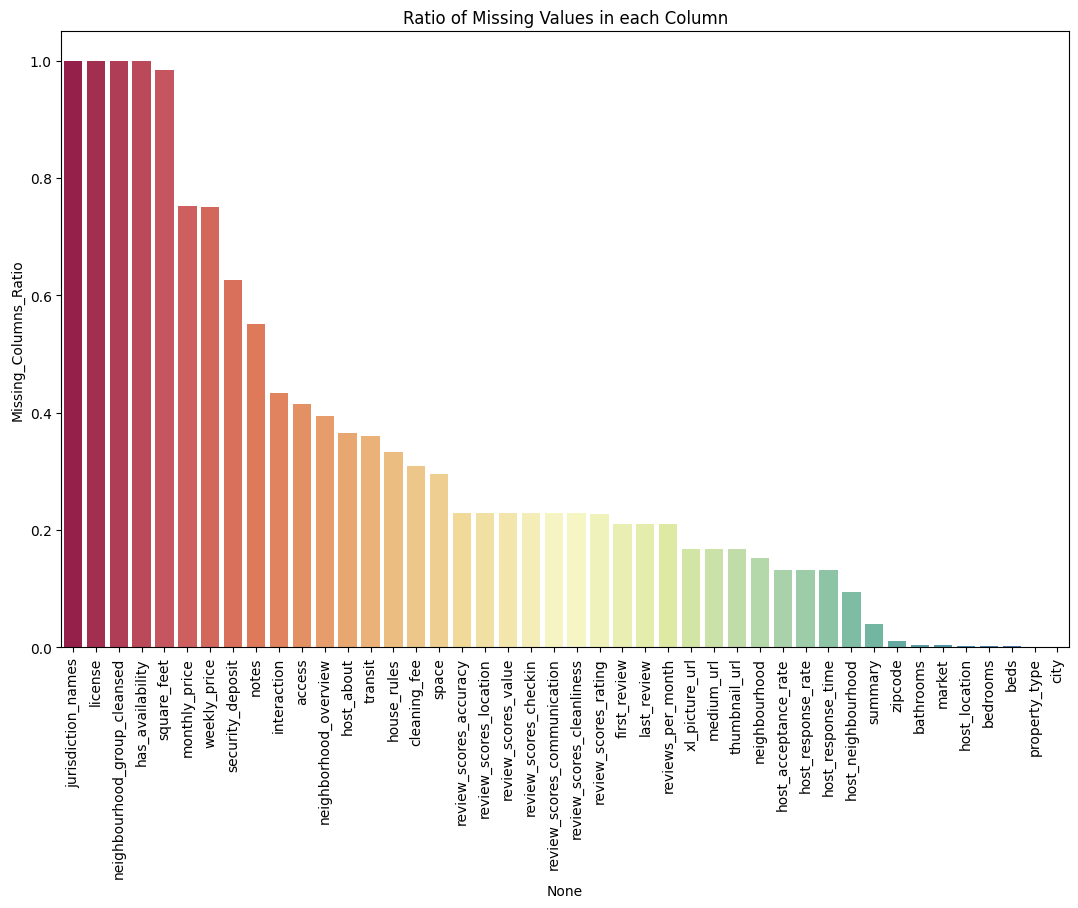

In [24]:
#Data Preprocessing and checking the ratio of missing values in each column
plt.figure(figsize = (13,8))
plt.xticks(rotation=90)
plt.title('Ratio of Missing Values in each Column')
col_na = bos_listings.loc[:, bos_listings.isna().any()]
missing_ratio = pd.DataFrame((col_na.isna().sum()/col_na.shape[0]).sort_values(ascending = False), columns = ['Missing_Columns_Ratio'])
sns.barplot(x=missing_ratio.index, y=missing_ratio.Missing_Columns_Ratio, palette='Spectral')

# # check the missness ratio
# plt.figure(figsize= (12,7))
# plt.xticks(rotation='90')
# plt.title('Missing Values Ratio')
# col_na = df_boston_listing.loc[:,df_boston_listing.isna().any()]
# mis_ratio = pd.DataFrame((col_na.isna().sum()/col_na.shape[0]).sort_values(ascending = False), columns = ['miss_ratio'])
# sns.barplot(mis_ratio.index, mis_ratio.miss_ratio)


In [25]:
#Display names of columns containing more than 70% values missing
bos_listings.columns[bos_listings.isnull().mean()>0.70]

Index(['neighbourhood_group_cleansed', 'square_feet', 'weekly_price',
       'monthly_price', 'has_availability', 'license', 'jurisdiction_names'],
      dtype='object')

In [26]:
bos_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [27]:
col_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
               'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url',
               'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications',
               'neighbourhood_group_cleansed', 'license', 'jurisdiction_names', 'has_availability', 'square_feet']

bos_listings_processed = bos_listings.drop(col_to_drop, axis = 1)

In [82]:
#bos_listings_processed = bos_listings_processed.drop(['square_feet'], axis=1, inplace=True)

In [28]:
#Setting the column 'id' as index for the dataset

bos_listings_processed = bos_listings_processed.set_index('id')

In [29]:
# the columns host_listings_count and host_listings_count have all the similar values. So, we can drop any one of the columns
print(sum((bos_listings_processed['host_listings_count'] == bos_listings_processed['host_total_listings_count']) == True))

3585


In [30]:
bos_listings_processed = bos_listings_processed.drop(['host_total_listings_count'], axis = 1)

In [31]:
#dropping the columns such as 'neighbourhood', 'state', 'country_code' and 'country' as we are focused on the boston city only

bos_listings_processed = bos_listings_processed.drop(['neighbourhood', 'state', 'country_code', 'country'], axis =1)

Handling the missing Values in each columns

In [32]:
bos_listings_processed.host_since

id
12147973    2015-04-15
3075044     2012-06-07
6976        2009-05-11
1436513     2013-04-21
7651065     2014-05-11
               ...    
8373729     2014-07-31
14844274    2015-07-02
14585486    2014-01-14
14603878    2016-05-27
14504422    2015-08-20
Name: host_since, Length: 3585, dtype: object

 **Since the data type of the above column is object ad we want the dates, we will convert it to datetime format and will measure the number of days the host has been on the platform and we will measure it from the date the data was scraped**

In [33]:
bos_listings_processed.host_since = pd.to_datetime(bos_listings_processed.host_since)

bos_listings_processed['host_active_days'] = (datetime(2023, 3, 25) - bos_listings_processed.host_since).dt.days

print('Average number of days as a active host: ', round(bos_listings_processed['host_active_days'].mean(),0))
print('Median number of days as a active host ', bos_listings_processed['host_active_days'].median())

bos_listings_processed.host_active_days.fillna(bos_listings_processed.host_active_days.median(), inplace=True)


Average number of days as a active host:  3285.0
Median number of days as a active host  3155.0


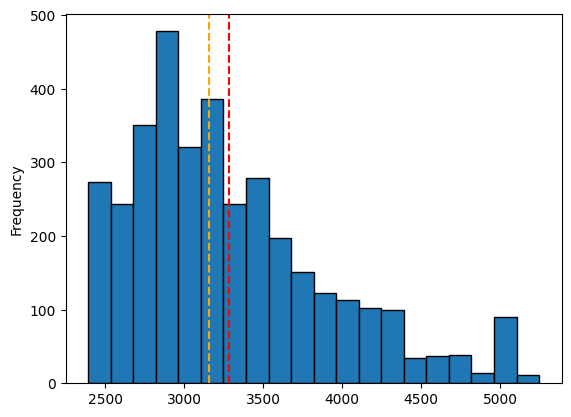

In [34]:
# bos_listings_processed['host_active_days'].plot(kind='hist')
# plt.axvline(bos_listings_processed['host_active_days'].mean(), color='red', linestyle='--')
# plt.axvline(bos_listings_processed['host_active_days'].median(), color='green', linestyle='--')

bos_listings_processed['host_active_days'].plot(kind='hist', bins=20, edgecolor='black')  # You can adjust the number of bins

# Add vertical lines for mean and median
plt.axvline(bos_listings_processed['host_active_days'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(bos_listings_processed['host_active_days'].median(), color='orange', linestyle='--', label='Median')



In [35]:
print("Null values:", bos_listings_processed.host_response_time.isna().sum())
print(f"Null value Percentage: {round((bos_listings_processed.host_response_time.isna().sum()/len(bos_listings_processed))*100, 1)}%")

Null values: 471
Null value Percentage: 13.1%


In [36]:
bos_listings_processed.host_response_time.fillna('Not Known', inplace=True)
bos_listings_processed.host_response_time.value_counts(normalize=True)

host_response_time
within an hour       0.386053
within a few hours   0.339749
Not Known            0.131381
within a day         0.130823
a few days or more   0.011994
Name: proportion, dtype: float64

Similar to Host response time, processing the host response rate column and removing the null values

In [37]:
bos_listings_processed.host_response_rate[:-1]

# Removing the % sign from the host_response_rate string
bos_listings_processed.host_response_rate = bos_listings_processed.host_response_rate.str[:-1].astype('float64')


In [38]:

# Bin into four categories
bos_listings_processed.host_response_rate = pd.cut(bos_listings_processed.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
bos_listings_processed.host_response_rate = bos_listings_processed.host_response_rate.astype('str')

# Replace nulls with 'unknown'
bos_listings_processed.host_response_rate= bos_listings_processed.host_response_rate.replace('NaN', 'Not Known')

# Category counts
bos_listings_processed.host_response_rate.value_counts()



host_response_rate
100%      2072
90-99%     496
50-89%     482
nan        471
0-49%       64
Name: count, dtype: int64

In [39]:
# Checking for rows , having missing values in multiple columns.

list_host_col = ['host_since', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic','host_identity_verified']

len(bos_listings_processed[bos_listings_processed.loc[ :,[i for i in list_host_col ]].isnull().sum(axis=1) == 5])

bos_listings_processed.dropna(subset=['host_since'], inplace=True)

In [95]:
print(bos_listings_processed['property_type'].unique())

['House' 'Apartment' 'Condominium' 'Villa' 'Bed & Breakfast' 'Townhouse'
 'Entire Floor' 'Loft' 'Guesthouse' 'Boat' 'Dorm' 'Other' nan 'Camper/RV']


In [40]:
# There are various categories in Property Type Column. So , Dividing them into 'House','Apartment' and 'Other'.

bos_listings_processed.property_type.replace({
    'House' : 'House',
    'Apartment' : 'Apartment',
    'Condominium' : 'Apartment',
    'Villa' : 'House',
    'Bed & Breakfast' : 'House',
    'Entire Floor' : 'Apartment',
    'Loft': 'House',
    'Townhouse': 'House',
    'Guesthouse': 'House',
    'Dorm': 'House',
    'Boat': 'Camper',
    'Camper/RV' : 'Camper',
    }, inplace=True)

bos_listings_processed.loc[~bos_listings_processed.property_type.isin(['House', 'Apartment', 'Camper']), 'property_type'] = 'Other'

bos_listings_processed.property_type.value_counts()

property_type
Apartment    2847
House         705
Other          20
Camper         13
Name: count, dtype: int64

In [41]:
print(bos_listings_processed['bathrooms'].unique())

[1.5 1.  2.  0.  2.5 3.5 nan 3.  0.5 4.5 4.  5.  6. ]


In [42]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    bos_listings_processed[col].fillna(bos_listings_processed[col].median(), inplace=True)

bos_listings_processed.bathrooms.value_counts()

bathrooms
1.000000    2765
2.000000     478
1.500000     208
2.500000      68
3.000000      21
0.000000      13
3.500000      13
0.500000       7
5.000000       5
6.000000       4
4.000000       2
4.500000       1
Name: count, dtype: int64

In [43]:
# Converting Price column values into integer

# bos_listings_processed.price = bos_listings_processed.price.str.replace('$', '', regex=True).str.replace(',', '', regex=True).astype(float)

# bos_listings_processed.price.value_counts()

In [44]:
# Ensure all strings have no leading/trailing whitespace
bos_listings_processed['price'] = bos_listings_processed['price'].str.strip()

# Remove dollar signs and commas
bos_listings_processed['price'] = bos_listings_processed['price'].str.replace(r'[$,]', '', regex=True)

# Convert to float
bos_listings_processed['price'] = bos_listings_processed['price'].astype(float)

# Display the value counts for the price column
print(bos_listings_processed['price'].value_counts())


price
150.000000    144
200.000000    117
100.000000    101
250.000000     95
75.000000      94
             ... 
276.000000      1
695.000000      1
342.000000      1
106.000000      1
459.000000      1
Name: count, Length: 324, dtype: int64


In [45]:
print(f"Null values in 'first_review': {round(100*bos_listings_processed.first_review.isna().sum()/len(bos_listings_processed),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*bos_listings_processed.review_scores_rating .isna().sum()/len(bos_listings_processed),1)}%")


Null values in 'first_review': 21.1%
Null values in 'review_scores_rating': 22.7%


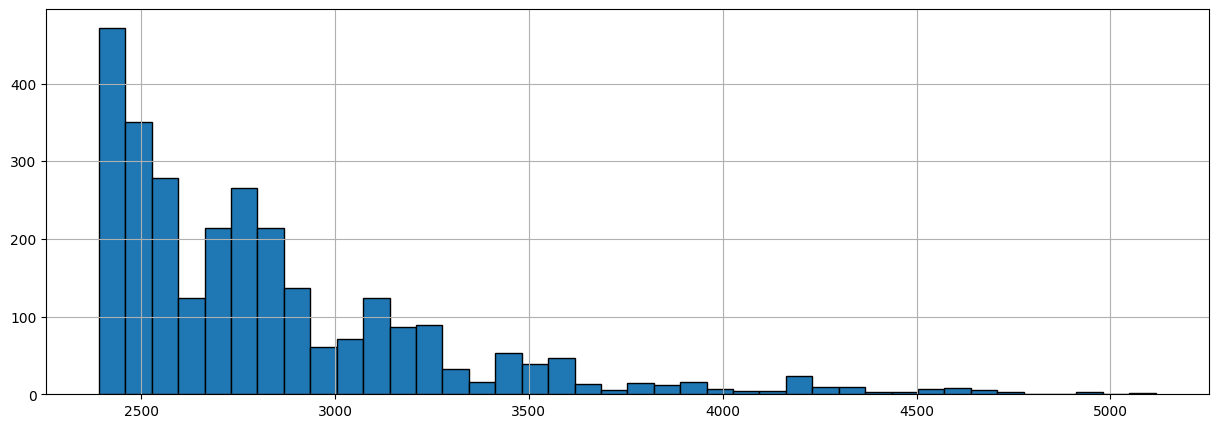

In [46]:
# Converting to datetime
bos_listings_processed.first_review = pd.to_datetime(bos_listings_processed.first_review)

#Calculating the number of days between the first review and the date the data was scraped
bos_listings_processed['time_since_first_review'] = (datetime(2023, 3, 25) - bos_listings_processed.first_review).dt.days

# Distribution of the number of days since first review
bos_listings_processed.time_since_first_review.hist(figsize=(15,5), bins=40, edgecolor = 'black');


In [47]:
print(bos_listings_processed['time_since_first_review'].unique())

[  nan 3219. 4997. 2400. 2776. 2530. 2817. 3233. 2753. 3369. 2472. 3442.
 2436. 2462. 2762. 4202. 2402. 2469. 2806. 3140. 2470. 4191. 2787. 2801.
 3448. 3608. 2635. 3927. 3430. 2855. 2547. 3259. 3087. 2736. 2959. 3079.
 3112. 2441. 3366. 2501. 3436. 2437. 2910. 3128. 2731. 3127. 3480. 3157.
 3153. 2394. 3898. 3296. 3784. 2819. 2845. 2864. 2422. 2582. 2767. 2829.
 2759. 2721. 2810. 4200. 3626. 2531. 2545. 2659. 3905. 3584. 2481. 3126.
 3094. 2457. 3234. 2895. 2934. 3252. 2938. 2775. 2489. 3491. 3595. 3578.
 2708. 2425. 2824. 2500. 3224. 3531. 3174. 2897. 2434. 3158. 2645. 2497.
 2893. 2904. 3373. 2513. 2540. 2723. 3107. 2450. 3156. 3386. 2860. 3060.
 3993. 3269. 2729. 3100. 2856. 2754. 2623. 2755. 2563. 3005. 3170. 2571.
 3421. 4208. 2890. 2827. 3589. 2677. 3581. 2485. 2520. 3291. 2433. 3175.
 2391. 3790. 2820. 3273. 3226. 3115. 2760. 3000. 2427. 2449. 3149. 3057.
 2743. 3400. 2973. 2778. 2720. 2940. 2955. 2579. 2465. 2807. 2926. 2512.
 3120. 2896. 2663. 2701. 3139. 2533. 3829. 3485. 27

In [48]:

def bin_column(col, bins, labels, na_label='Unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    bos_listings_processed[col] = pd.cut(bos_listings_processed[col], bins=bins, labels=labels, include_lowest=True)
    bos_listings_processed[col] = bos_listings_processed[col].astype('str')
    bos_listings_processed[col].fillna(na_label, inplace=True)

In [49]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 250, 400, 800, 2000, max(bos_listings_processed.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

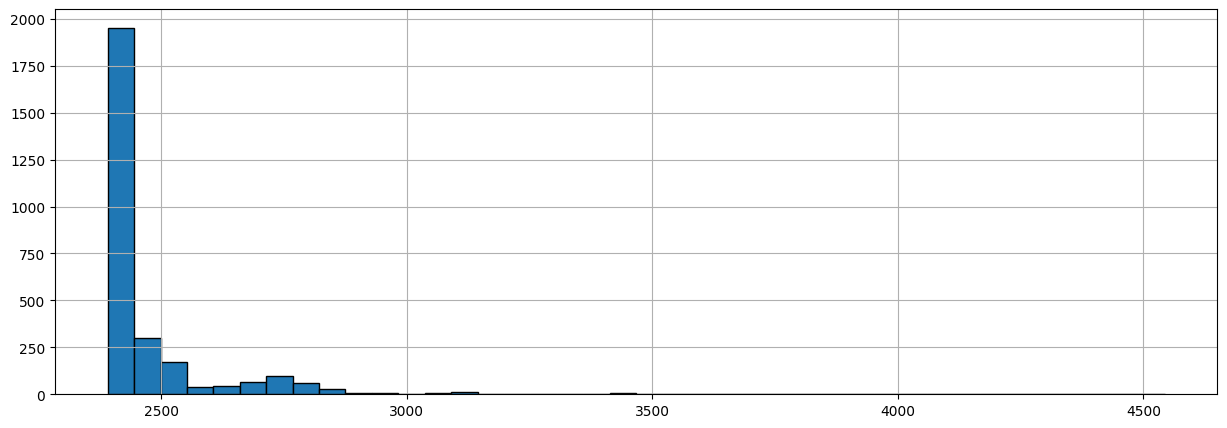

In [50]:
bos_listings_processed.last_review = pd.to_datetime(bos_listings_processed.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
bos_listings_processed['time_since_last_review'] = (datetime(2023, 3, 25) - bos_listings_processed.last_review).dt.days

# Distribution of the number of days since last review
bos_listings_processed.time_since_last_review.hist(figsize=(15,5), bins=40, edgecolor = 'black');

In [51]:
print(bos_listings_processed['time_since_last_review'].unique())

[  nan 2415. 2423. 2400. 2396. 2393. 2398. 2493. 2472. 2410. 2436. 2394.
 2422. 2426. 2402. 2469. 2407. 2397. 2409. 2801. 2395. 2671. 2404. 2709.
 2413. 2489. 2463. 2464. 2405. 2406. 2421. 2399. 2481. 2392. 2457. 2414.
 2483. 2391. 2696. 2864. 2408. 2819. 2401. 2470. 2756. 2476. 2529. 2428.
 2516. 2531. 2528. 2446. 2549. 2701. 2642. 2513. 2522. 3128. 2418. 2778.
 2403. 2460. 2437. 2824. 3553. 2554. 2707. 2433. 2411. 2425. 2435. 2473.
 2432. 2698. 2454. 2895. 2462. 2504. 2532. 2419. 2416. 2427. 3400. 2781.
 2465. 2444. 2749. 2412. 2485. 3112. 2527. 2482. 2524. 2488. 3194. 2420.
 2638. 3089. 2761. 2548. 2644. 2626. 2442. 2760. 2453. 2451. 2458. 2496.
 2645. 2618. 2477. 2624. 2505. 2673. 2429. 2714. 2688. 2679. 2490. 2511.
 2797. 2573. 2545. 2775. 2860. 2509. 3956. 3437. 2767. 2762. 2635. 2769.
 2526. 2452. 2455. 2634. 2818. 2523. 2925. 2417. 2641. 2502. 2471. 2764.
 2793. 2434. 2484. 2438. 2424. 2677. 3110. 2445. 3004. 2584. 2441. 2794.
 2598. 2497. 2542. 2461. 2544. 2702. 2596. 2449. 24

In [52]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(bos_listings_processed.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [53]:
# Dropping last_review
bos_listings_processed.drop('last_review', axis=1, inplace=True)

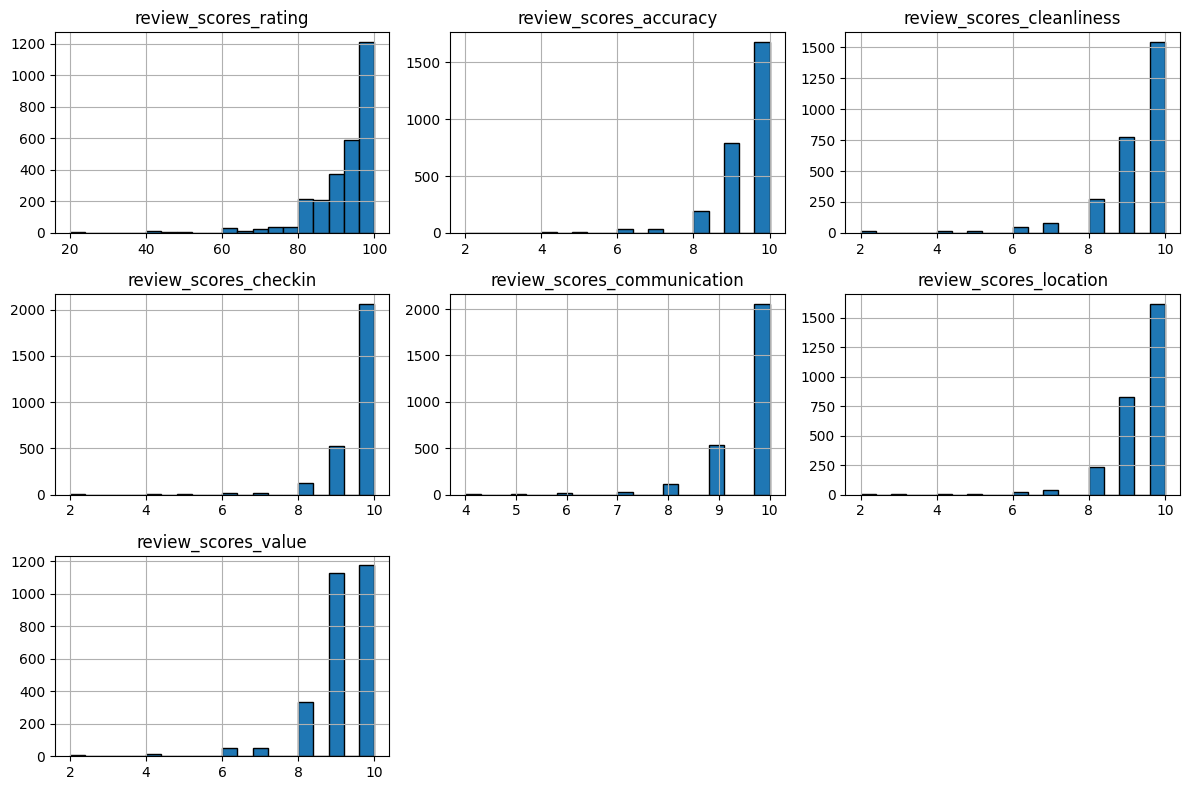

In [54]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(bos_listings_processed.columns[bos_listings_processed.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    bos_listings_processed[var_name].hist(bins=20,ax=ax, edgecolor = 'black')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [55]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [56]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [57]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [58]:
bos_listings_processed.amenities[:1].values

array(['{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'],
      dtype=object)

In [59]:
print(bos_listings_processed['amenities'].unique())

['{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'
 '{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Pets Allowed","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door",Hangers,"Hair Dryer",Iron}'
 '{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card",Essentials,Shampoo,"Lock on Bedroom Door","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}'
 ...
 '{Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly","Smoke Detector","Carbon Monoxide Detector"

In [60]:
# Creating a set of all possible amenities
amenities_list = list(bos_listings_processed.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Paid Parking Off Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50'}

In [61]:
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Air conditioning|Central air conditioning|Portable air conditioning'), 'air_conditioning'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Exercise equipment|Gym|gym|24-hour fitness center|Gym|Private gym in building|Shared gym in building|Gym/Private gym in building'), 'gym'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV|32\ HDTV with Netflix|32\ HDTV with standard cable|37\ HDTV with Amazon Prime Video|40\ HDTV with Roku|40\ HDTV with standard cable|40\ TV|42\ HDTV|42\ HDTV with Amazon Prime Video|42\ HDTV with Roku|45\ HDTV with premium cable|48\ HDTV|50\ HDTV with Roku|50\ HDTV with standard cable|52\ HDTV|54\ HDTV with Netflix|55\ HDTV|55\ HDTV with Apple TV|55\ HDTV with Netflix|65\ HDTV with Amazon Prime Video|65\ HDTV with Netflix|75\ TV|Amazon Prime Video|Apple TV| Cable TV|HBO Max|HDTV|HDTV with Amazon Prime Video|HDTV with Apple TV|HDTV with HBO Max|HDTV with Netflix|HDTV with Roku|HDTV with premium cable|HDTV with standard cable| Netflix|TV|TV with Amazon Prime Video|TV with Chromecast|TV with HBO Max|TV with Netflix|TV with Roku|TV with standard cable'), 'tv'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Avanti stainless steel electric stove|Avanti stainless steel oven|Ikea oven|Kenmore oven|Bosch stainless steel oven'), 'oven'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Electric stove|Gas stove|Ikea gas stove|Kenmore electric stove|Kenmore stainless steel electric stove|Bosch stainless steel gas stove'), 'stove'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('BBQ grill|Fire pit|Barbecue utensils'), 'bbq'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('balcony|Patio or balcony|Patio'),'nature_and_views'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront|Lake access|Beachfront||Ski-in/Ski-out'), 'nature_and_views'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Bed linens|Bed sheets and pillows|linens'), 'bed_linen'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Breakfast|Complimentary continental breakfast|Continental breakfast available \u2014 $14 per person per day'), 'breakfast'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Coffee maker|Espresso machine|Coffee maker|Keurig coffee machine|Nespresso machine|Pour-over coffee'), 'coffee_machine'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Dryer|Dryer \u2013 In building|Dryer \u2013\u00a0In unit|Drying rack for clothing|Dishwasher|Free washer\u2013In building|Free washer\u2013In unit|Paid washer\u2013In building|WasherWasher \u2013\u00a0In building|Washer \u2013\u00a0In unit'), 'white_goods'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Elevator'), 'elevator'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Children\u2019s books and toys|Children\u2019s books and toys for ages 0-2 years old|Children\u2019s books and toys for ages 0-2 years old and 2-5 years old|Children\u2019s dinnerware|Baby bath|Baby monitor|Baby safety gates|Babysitter recommendations'), 'child_friendly'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Free driveway parking on premises|Free driveway parking on premises \u2013 1 space|Free driveway parking on premises \u2013 2 spaces| Free parking garage on premises|Free parking on premises|Free street parking|Paid parking garage off premises|Paid parking garage off premises \u2013 32 per day|Paid parking garage off premises \u2013 40 per day|Paid parking garage off premises \u2013 48 per day|Paid parking garage off premises \u2013 35 per day|Paid parking lot on premises|Paid parking lot on premises \u2013 65 per day|Paid parking lot on premises \u2013 1 space|Paid parking lot on premises \u2013 2 spaces|Paid parking off premises|Paid parking on premises|Paid street parking off premises'), 'parking'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Private fenced garden or backyard|Private garden or backyard|Garden|Outdoor|Sun loungers|Terrace|Backyard'), 'outdoor_space'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Private hot tub|Shared outdoor heated saltwater pool|Shared outdoor pool|Shared pool|Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Internet|Pocket wifi|Wifi|Pocket wifi|Wifi|Wifi \u2013 100 Mbps|Wifi \u2013 1000 Mbps|Wifi \u2013 15 Mbps|Wifi \u2013 150 Mbps|Wifi \u2013 180 Mbps|Wifi \u2013 200 Mbps|Wifi \u2013 250 Mbps|Wifi \u2013 363 Mbps|Wifi \u2013 60 Mbps|Wifi \u2013 600 Mbps|Wifi \u2013 70 Mbps|Wifi \u2013 90 Mbps|Free wifi'), 'internet'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets allowed'), 'pets_allowed'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Safe|Security system|Security cameras on property'), 'secure'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Aveeno body soap|Bathtub|Beekman Hotel conditioner|Beekman body soap|Beekman conditioner|Beekman shampoo|Bath & Body Works body soap|Bath & Body Works body soap|Bath & Body Works conditioner|Bath & Body Works shampoo|Bath & Body Works. body soap|Body soap//Both bar soaps and body wash are available for you. body soap|DOVE Usually body soap|Dove body soap|Dove conditioner|Dove shampoo|Eco body soap|Gilchrist And Saomes body soap|Gilchrist and Soames body soap|Gilchrist and Somes body soap|Irish Spring Shower gel|Dial liquid hand soap|Tulip body soap body soap|Maxxam conditioner|Maxxam shampoo|PANTENE Usually conditioner|PANTENE Usually shampoo|TRESemm\u00e9 conditioner|TRESemm\u00e9 shampoo|Loreal conditioner'), 'toiletries'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Sonos Bluetooth sound system|Sonos and Amazon Tap Bluetooth sound system|bose sound system with Bluetooth and aux|Bluetooth sound system|Bluetooth speaker|Bluetooth speaker Bluetooth sound system|Bose Sound Touch with Bluetooth sound system with Bluetooth and aux'), 'sound_system'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Dedicated workspace|Dedicated workspace: desk|Dedicated workspace: desk and office chair|Dedicated workspace: desk and table|Dedicated workspace: monitor and desk|Dedicated workspace: office chair and desk|Dedicated workspace: table|Dedicated workspace: table and desk|Dedicated workspace: table and office chair'), 'workspace'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Freezer|GE refrigerator| LG refrigerator|Purchased in 2020. Refrigerator|Samsung refrigerator|WHIRLPOOL refrigerator|WHRILPOOL refrigerator|Mini fridge|KitchenAid refrigerator|Kitchenaid refrigerator'), 'refrigerator'] = 1
bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Onsite restaurant \u2014 Cosmica|Onsite restaurant \u2014 canteenM-open 24/7 Open 24/7'), 'canteen'] = 1







<ipython-input-61-8f18ca4b56e2>:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  bos_listings_processed.loc[bos_listings_processed['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)|Pets allowed'), 'pets_allowed'] = 1


In [62]:
bos_listings_processed.head()

host_id host_since  host_response_time host_response_rate  \
id                                                                     
12147973  31303940 2015-04-15           Not Known                nan   
3075044    2572247 2012-06-07      within an hour               100%   
6976         16701 2009-05-11  within a few hours               100%   
1436513    6031442 2013-04-21  within a few hours               100%   
7651065   15396970 2014-05-11      within an hour               100%   

         host_acceptance_rate  host_is_superhost  host_listings_count  \
id                                                                      
12147973                  NaN                  0                    1   
3075044                  100%                  0                    1   
6976                      88%                  1                    1   
1436513                   50%                  0                    1   
7651065                  100%                  1                    1   

          host_has_profile_pic  host_identity_verified  \
id                                                       
12147973                     1                       0   
3075044                      1                       1   
6976                         1                       1   
1436513                      1                       0   
7651065                      1                       1   

                                                     street  \
id                                                            
12147973      Birch Street, Boston, MA 02131, United States   
3075044   Pinehurst Street, Boston, MA 02131, United States   
6976            Ardale St., Boston, MA 02131, United States   
1436513                           Boston, MA, United States   
7651065     Durnell Avenue, Boston, MA 02131, United States   

         neighbourhood_cleansed    city zipcode  market smart_location  \
id                                                                       
12147973             Roslindale  Boston   02131  Boston     Boston, MA   
3075044              Roslindale  Boston   02131  Boston     Boston, MA   
6976                 Roslindale  Boston   02131  Boston     Boston, MA   
1436513              Roslindale  Boston     NaN  Boston     Boston, MA   
7651065              Roslindale  Boston   02131  Boston     Boston, MA   

          latitude  longitude  is_location_exact property_type  \
id                                                               
12147973 42.282619 -71.133068                  1         House   
3075044  42.286241 -71.134374                  1     Apartment   
6976     42.292438 -71.135765                  1     Apartment   
1436513  42.281106 -71.121021                  0         House   
7651065  42.284512 -71.136258                  1         House   

                room_type  accommodates  bathrooms  bedrooms     beds  \
id                                                                      
12147973  Entire home/apt             4   1.500000  2.000000 3.000000   
3075044      Private room             2   1.000000  1.000000 1.000000   
6976         Private room             2   1.000000  1.000000 1.000000   
1436513      Private room             4   1.000000  1.000000 2.000000   
7651065      Private room             2   1.500000  1.000000 2.000000   

          bed_type                                          amenities  \
id                                                                      
12147973  Real Bed  {TV,"Wireless Internet",Kitchen,"Free Parking ...   
3075044   Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   
6976      Real Bed  {TV,"Cable TV","Wireless Internet","Air Condit...   
1436513   Real Bed  {TV,Internet,"Wireless Internet","Air Conditio...   
7651065   Real Bed  {Internet,"Wireless Internet","Air Conditionin...   

              price weekly_price monthly_price security_deposit cleaning_fee  \
id                                                         

In [63]:
bos_listings_processed.shape

(3585, 92)

In [64]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = bos_listings_processed.iloc[:,61:].columns
bos_listings_processed[cols_to_replace_nulls] = bos_listings_processed[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in bos_listings_processed.iloc[:,61:].columns:
    if bos_listings_processed[col].sum() < len(bos_listings_processed)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

['oven', 'stove', 'bbq', 'bed_linen', 'breakfast', 'coffee_machine', 'cooking_basics', 'child_friendly', 'parking', 'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool', 'long_term_stays', 'private_entrance', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable', 'toiletries', 'sound_system', 'workspace', 'refrigerator', 'canteen']


In [65]:
# Dropping infrequent amenity features
bos_listings_processed.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
bos_listings_processed.drop('amenities', axis=1, inplace=True)

In [66]:
bos_listings_processed.shape

(3585, 68)

In [67]:
# reviews_per_month and number_of_reviews are very similar and so will drop one of them.

bos_listings_processed.drop(['reviews_per_month'], axis=1, inplace=True)

In [68]:
#availability30, availability60, availability90, availability365 are corelated, we will only keep one of them

bos_listings_processed.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

In [70]:
# correlation check for each feature with target feature and plot the first ten high corr features
# bos_listings_processed['price'] = bos_listings_processed['price']
# bos_corre = bos_listings_processed.corr()
# plt.subplots(figsize=(13,13))
# plt.xticks(rotation=0)
# plt.title('First ten high correlated features')
# cols = bos_corre.nlargest(10, 'price')['price'].index
# cm = np.corrcoef(bos_listings_processed[cols].values.T)
# sns.heatmap(cm, vmax=0.9,annot=True, square=True,annot_kws={'size': 10},
#            yticklabels=cols.values, xticklabels=cols.values)


<Axes: title={'center': 'First ten high correlated features'}>

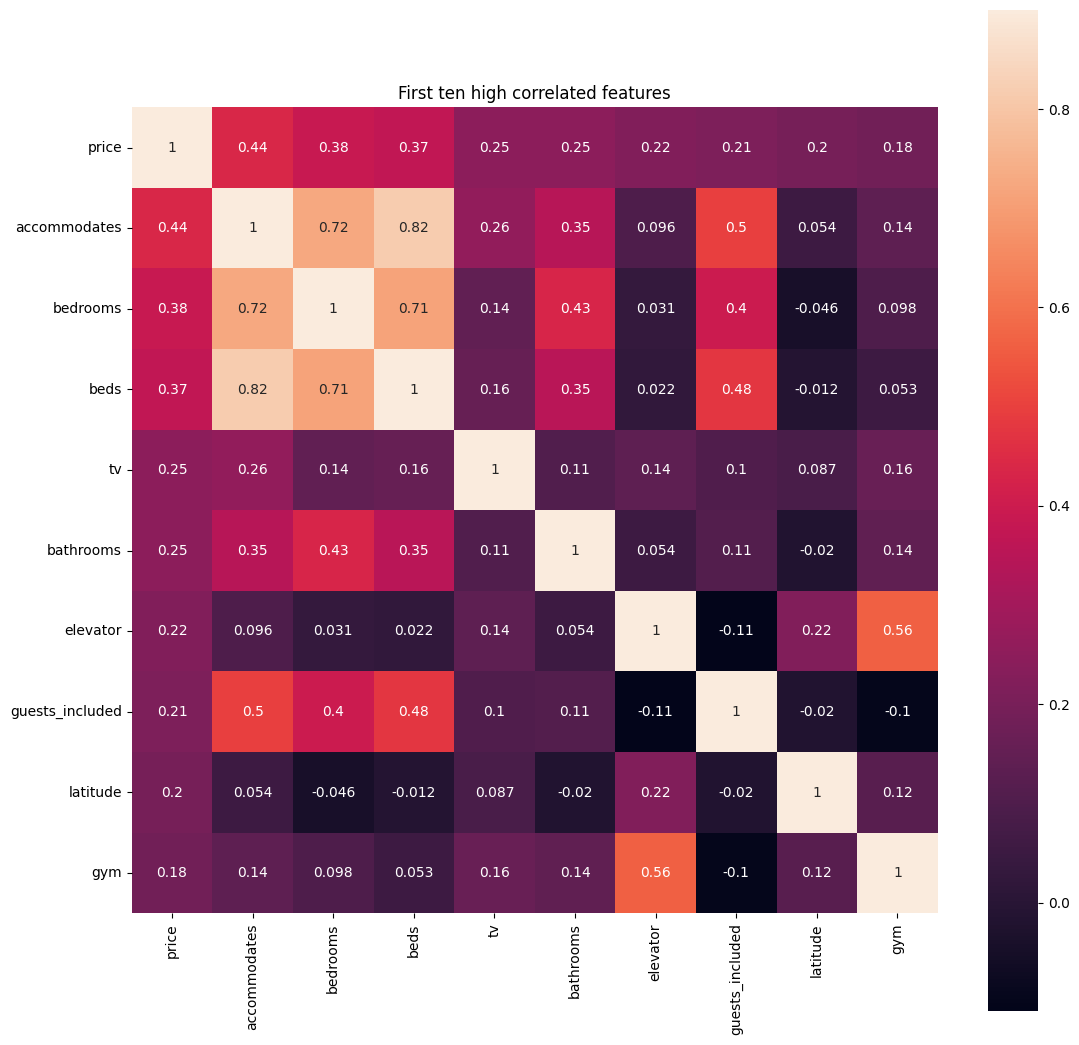

In [69]:
bos_listings_processed_for_corr = bos_listings_processed.apply(pd.to_numeric, errors='coerce')

bos_corre = bos_listings_processed_for_corr.corr()

plt.subplots(figsize=(13,13))
plt.xticks(rotation=0)
plt.title('First ten high correlated features')
cols = bos_corre.nlargest(10, 'price')['price'].index
cm = np.corrcoef(bos_listings_processed[cols].values.T)
sns.heatmap(cm, vmax=0.9,annot=True, square=True,annot_kws={'size': 10},
           yticklabels=cols.values, xticklabels=cols.values)

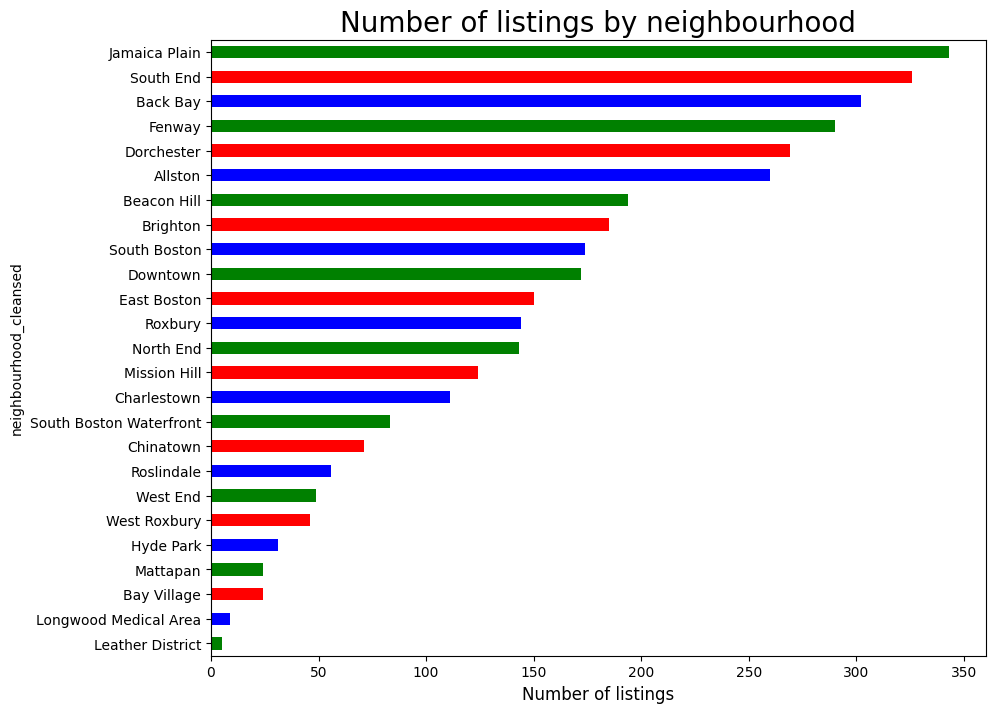

In [71]:
feq=bos_listings_processed.neighbourhood_cleansed.value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color = ["g","b","r"])
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [72]:
print(bos_listings_processed['room_type'].unique())

['Entire home/apt' 'Private room' 'Shared room']


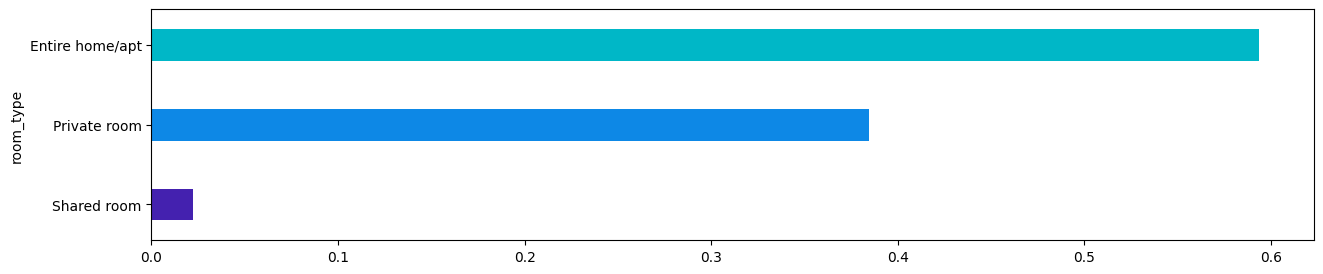

In [73]:
room_types_count_pre = bos_listings_processed['room_type'].value_counts()
freq = (room_types_count_pre/bos_listings_processed.shape[0]).sort_values(ascending=True)
colors = ["#4421af", "#0d88e6", "#00b7c7"]
freq.plot.barh(figsize=(15, 3), width=0.4, color = colors)
plt.show()

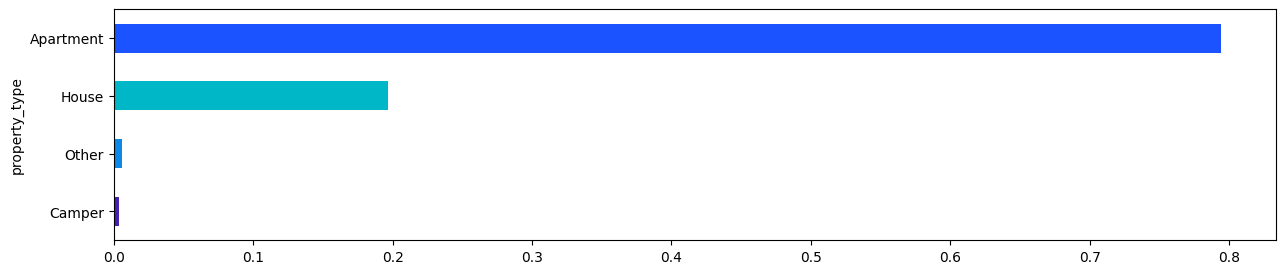

In [74]:
neighbourhood_types_count_pre = bos_listings_processed['property_type'].value_counts()
freq =(neighbourhood_types_count_pre/bos_listings_processed.shape[0]).sort_values(ascending=True)
colors = ["#4421af", "#0d88e6", "#00b7c7","#1a53ff"]
freq.plot.barh(figsize=(15, 3), width=0.5, color = colors)
plt.show()

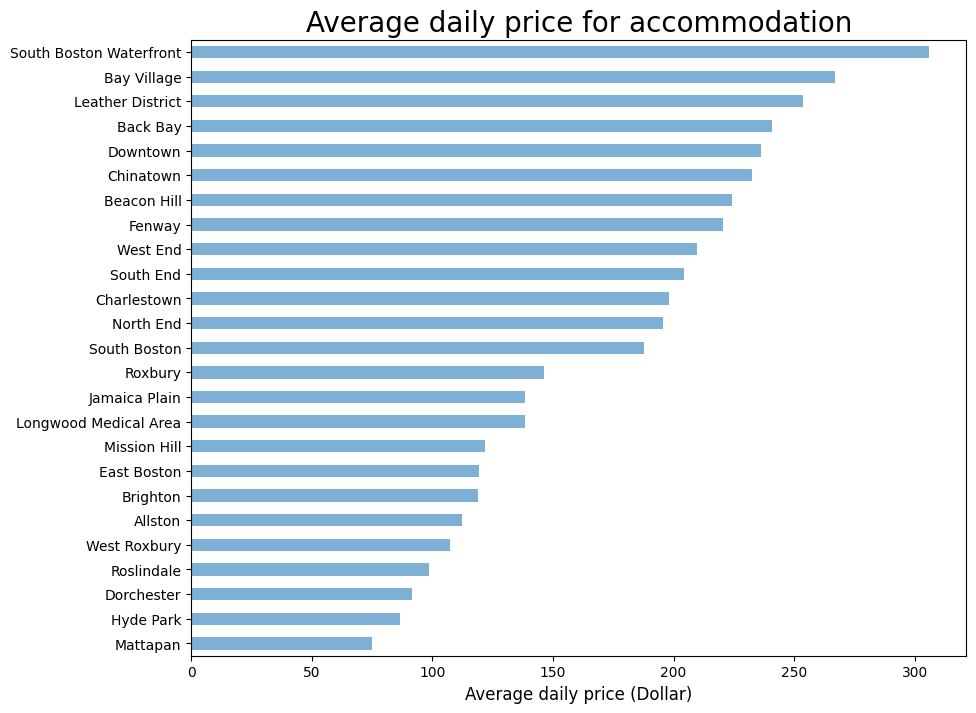

In [75]:

#feq = df_boston_listing_preprocessed[df_boston_listing_preprocessed['accommodates']==2]
feq = bos_listings_processed
feq = feq.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True)
feq.plot.barh(figsize=(10, 8), color='#7eb0d5')
plt.title("Average daily price for accommodation", fontsize=20)
plt.xlabel('Average daily price (Dollar)', fontsize=12)
plt.ylabel("")
plt.show()

<Axes: xlabel='property_type'>

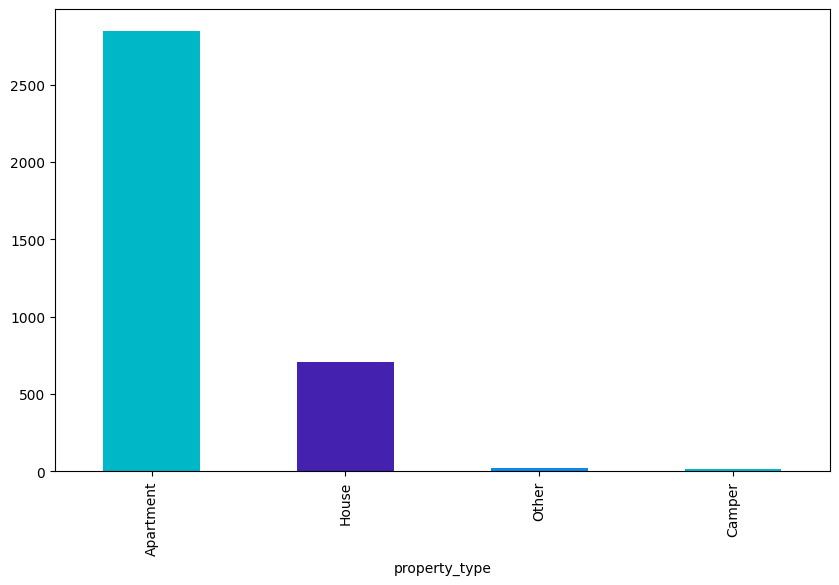

In [76]:
# Getting Types of Property

neighbourhood_types_pre = bos_listings_processed['property_type'].unique() #nunique()
neighbourhood_types_count_pre = bos_listings_processed['property_type'].value_counts()
colors = [ "#00b7c7", "#4421af", "#0d88e6"]
neighbourhood_types_count_pre.plot(kind='bar',figsize=(10,6),color = colors)


<Axes: xlabel='bathrooms'>

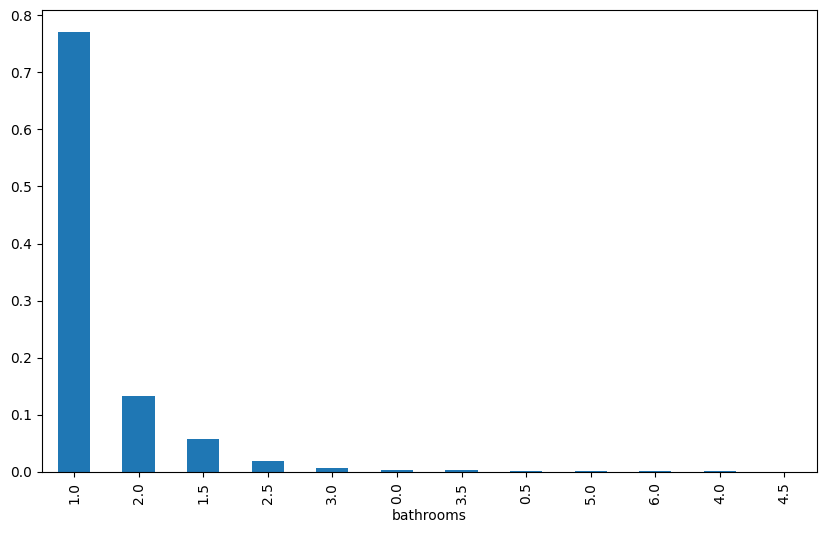

In [77]:
# Getting Types of Bathrooms
bathroom_types_pre = bos_listings_processed.bathrooms.unique() #nunique()
bathroom_types_count_pre = bos_listings_processed.bathrooms.value_counts()
#bathroom_types_count_pre.sort_values(ascending=False).plot(kind='bar',figsize=(10,6))
(bathroom_types_count_pre/bos_listings_processed.shape[0]).sort_values(ascending=False).plot(kind='bar',figsize=(10,6))



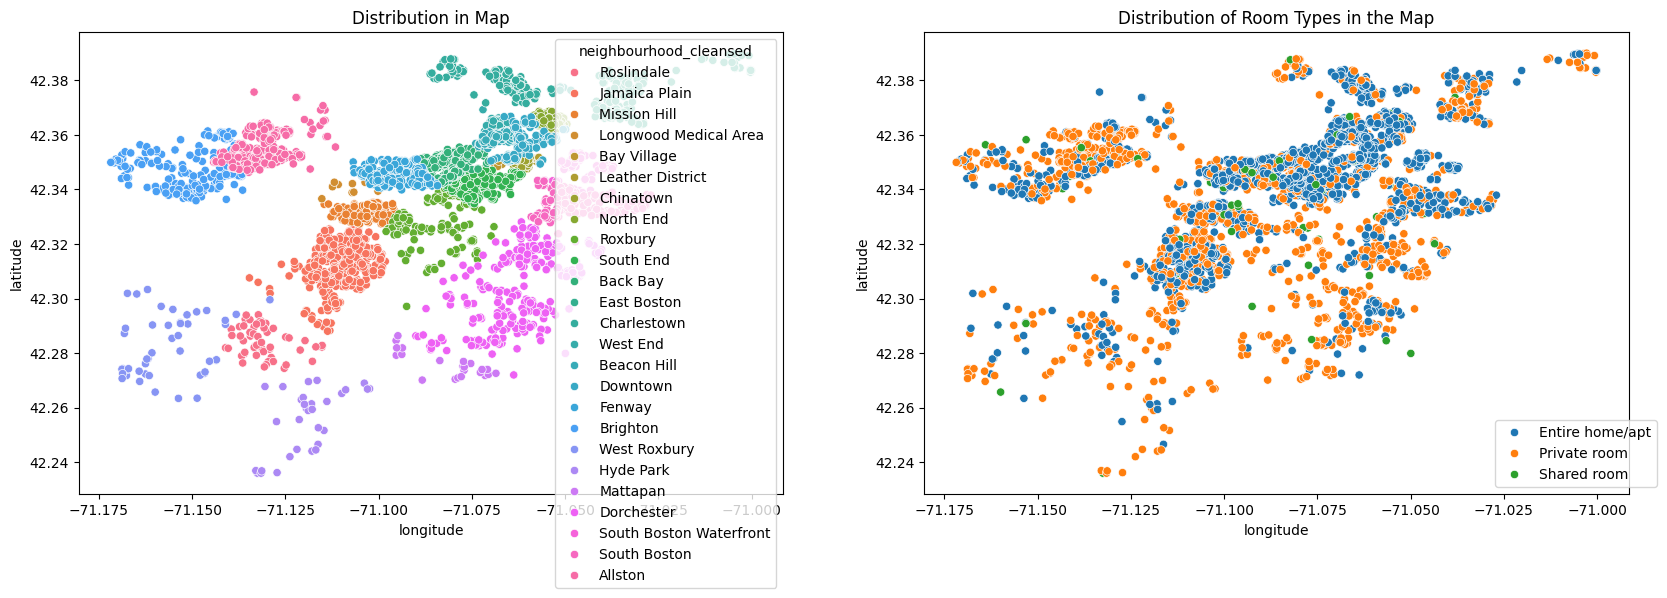

In [78]:
fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(121)
scatter1 = sns.scatterplot(x=bos_listings_processed['longitude'], y=bos_listings_processed['latitude'],
                           hue=bos_listings_processed['neighbourhood_cleansed'], ax=ax1)
ax1.set_title('Distribution in Map')

ax2 = fig.add_subplot(122)
scatter2 = sns.scatterplot(x=bos_listings_processed['longitude'], y=bos_listings_processed['latitude'],
                           hue=bos_listings_processed['room_type'], ax=ax2)
ax2.set_title('Distribution of Room Types in the Map')
ax2.legend(bbox_to_anchor=(1.05, 0), loc='lower right')

plt.show()


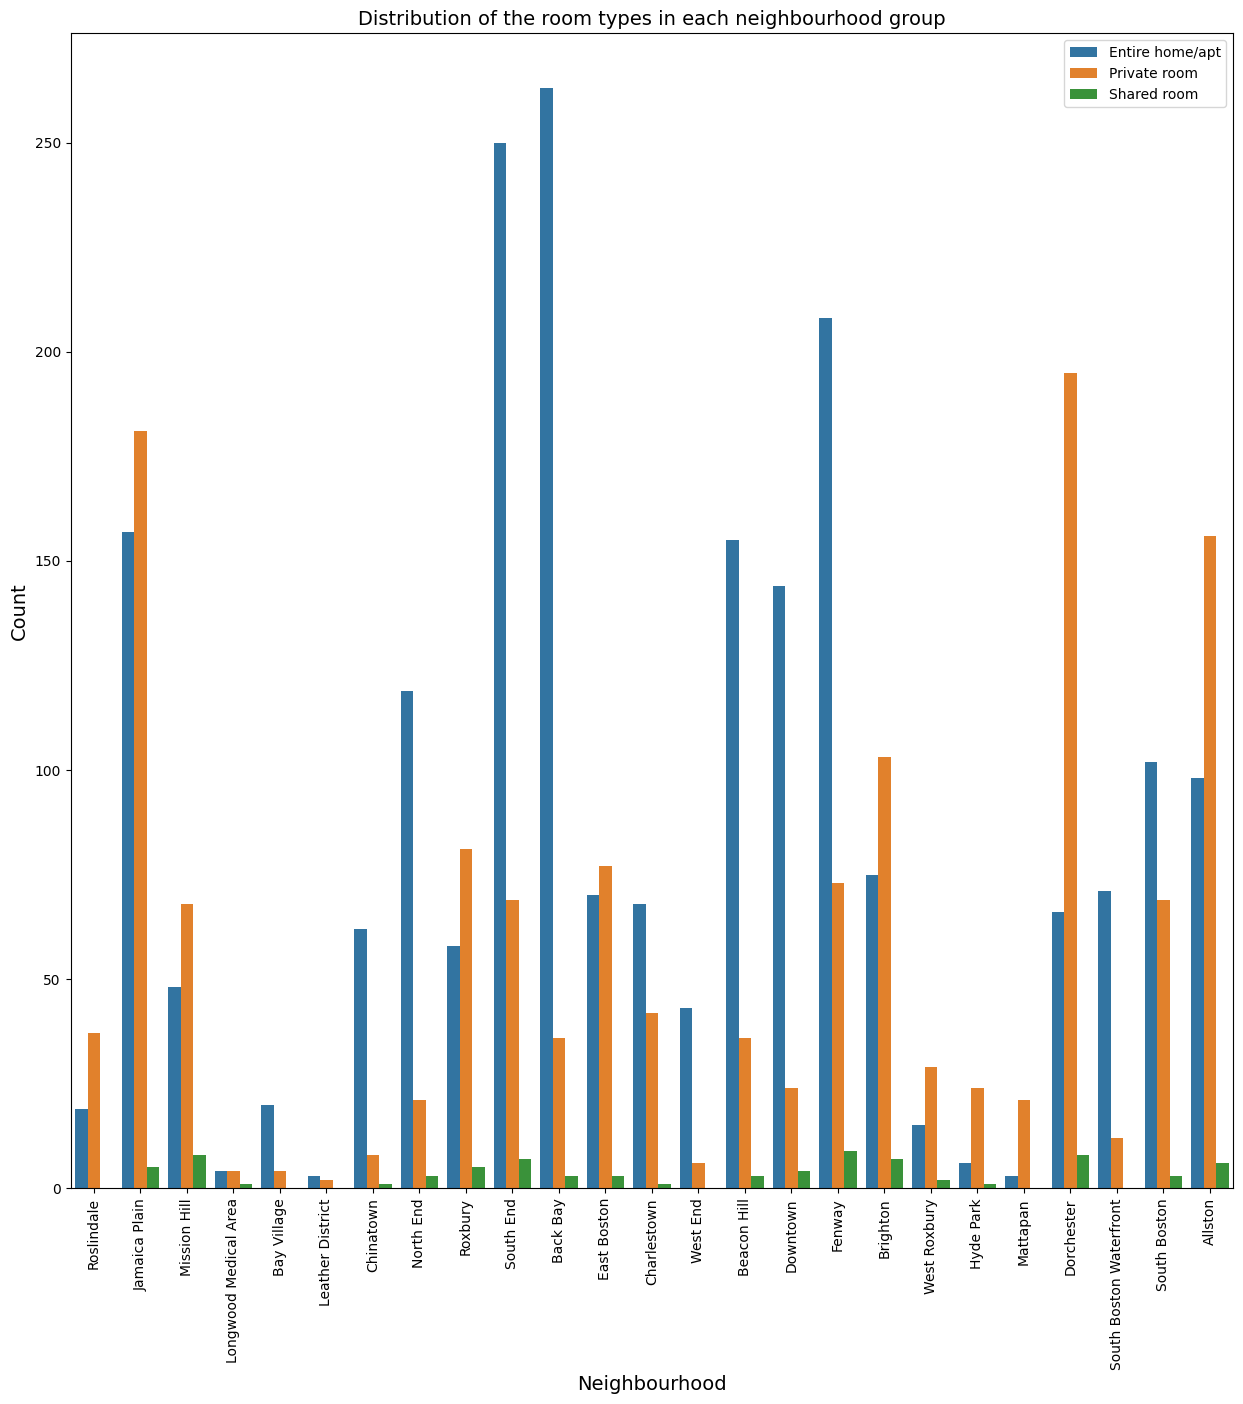

In [79]:
plt.figure(figsize=(15,15))
sns.countplot(x=bos_listings_processed['neighbourhood_cleansed'], hue=bos_listings_processed['room_type'])
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize=14)                                             # Y Label
plt.xlabel('Neighbourhood',fontsize=14)                                     # X Label
plt.legend(loc='upper right')
plt.title('Distribution of the room types in each neighbourhood group',fontsize=14)
plt.show()

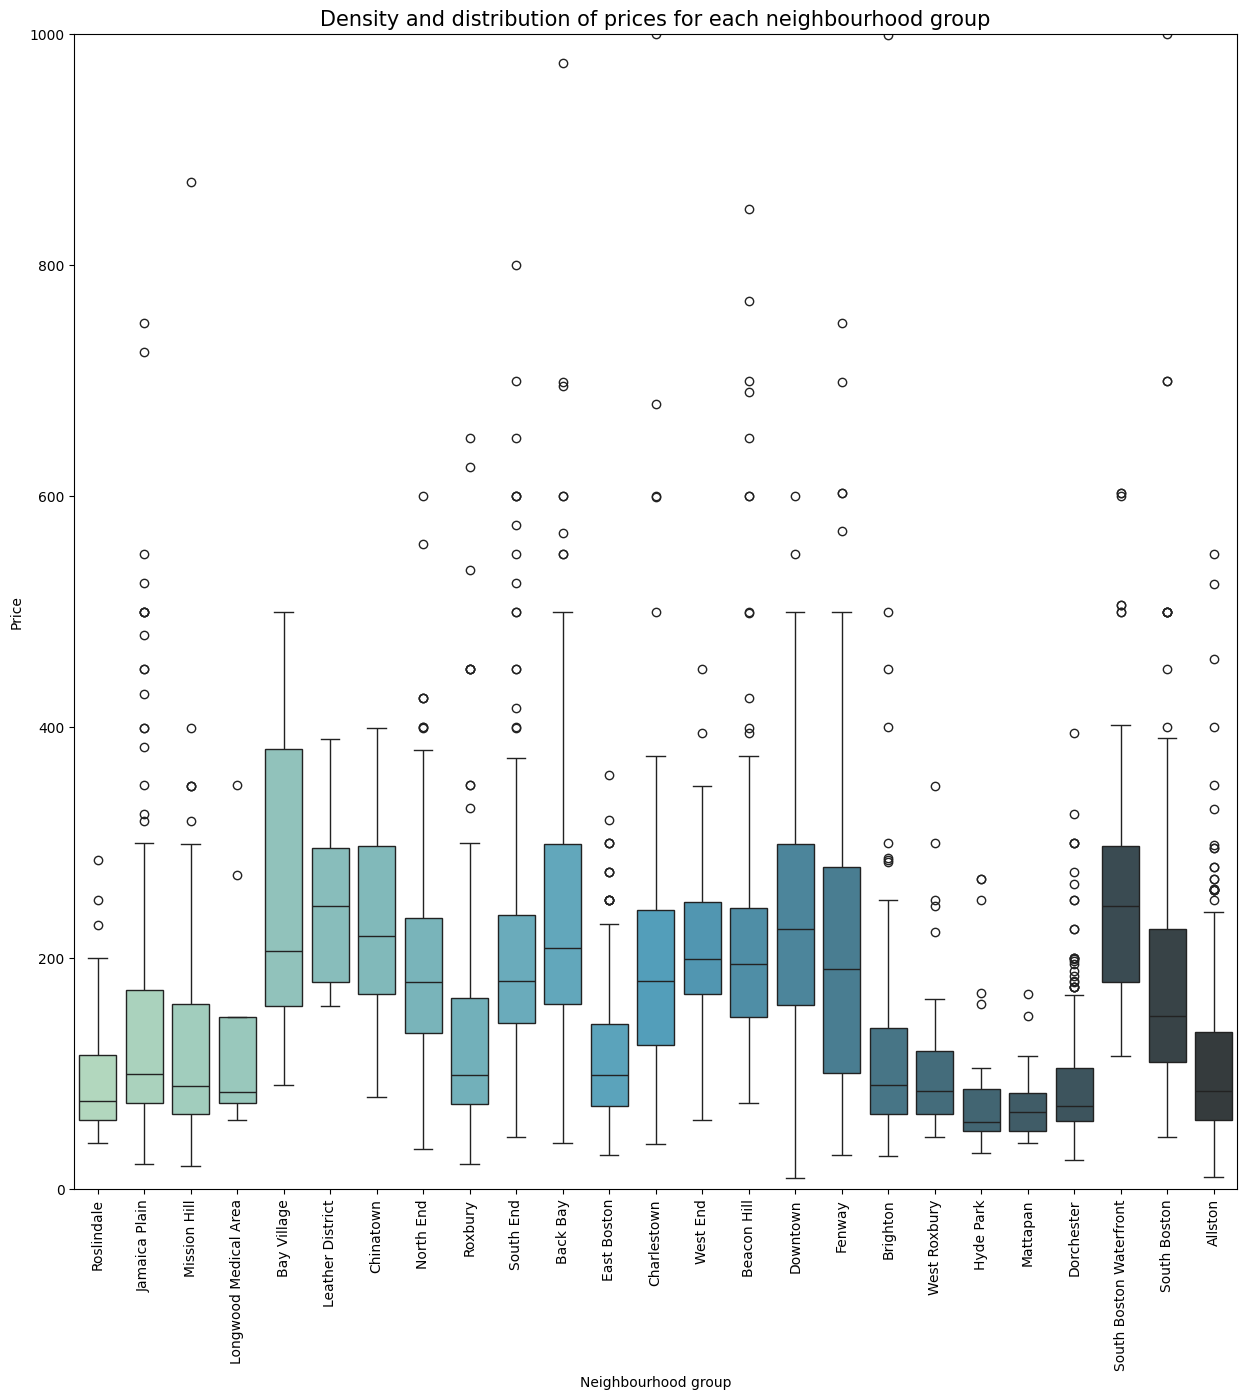

In [80]:
plt.figure(figsize=(15,15))
sns.boxplot(data=bos_listings_processed, x='neighbourhood_cleansed', y='price', palette='GnBu_d')
plt.title('Density and distribution of prices for each neighbourhood group', fontsize=15)
plt.xlabel('Neighbourhood group')
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.ylim(0,1000)
plt.show()

In [81]:
import folium
import os

latitudes = np.array(bos_listings_processed['latitude'])
longitudes = np.array(bos_listings_processed['longitude'])
la_mean = latitudes.mean()
lo_mean = longitudes.mean()
locations = list(zip(latitudes, longitudes))

m = folium.Map(location=[la_mean, lo_mean], zoom_start= 11.5)
FastMarkerCluster(data=locations).add_to(m)
m



In [82]:
colab_file_path = '/content/airbnb_map.html'

# Ensure the directory exists
colab_directory = os.path.dirname(colab_file_path)
if not os.path.exists(colab_directory):
    os.makedirs(colab_directory)

# Save the map
try:
    m.save(colab_file_path)
    print(f"Map saved successfully at {colab_file_path}")
except Exception as e:
    print(f"An error occurred while saving the map: {e}")

# Download the file to your local machine
files.download(colab_file_path)

Map saved successfully at /content/airbnb_map.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-83-71e7d3775d95>:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=a.index, x=a.values, ax=ax1, palette=colors_a)
<ipython-input-83-71e7d3775d95>:15: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(y=d.index, x=d.values, ax=ax2, palette=colors_d)


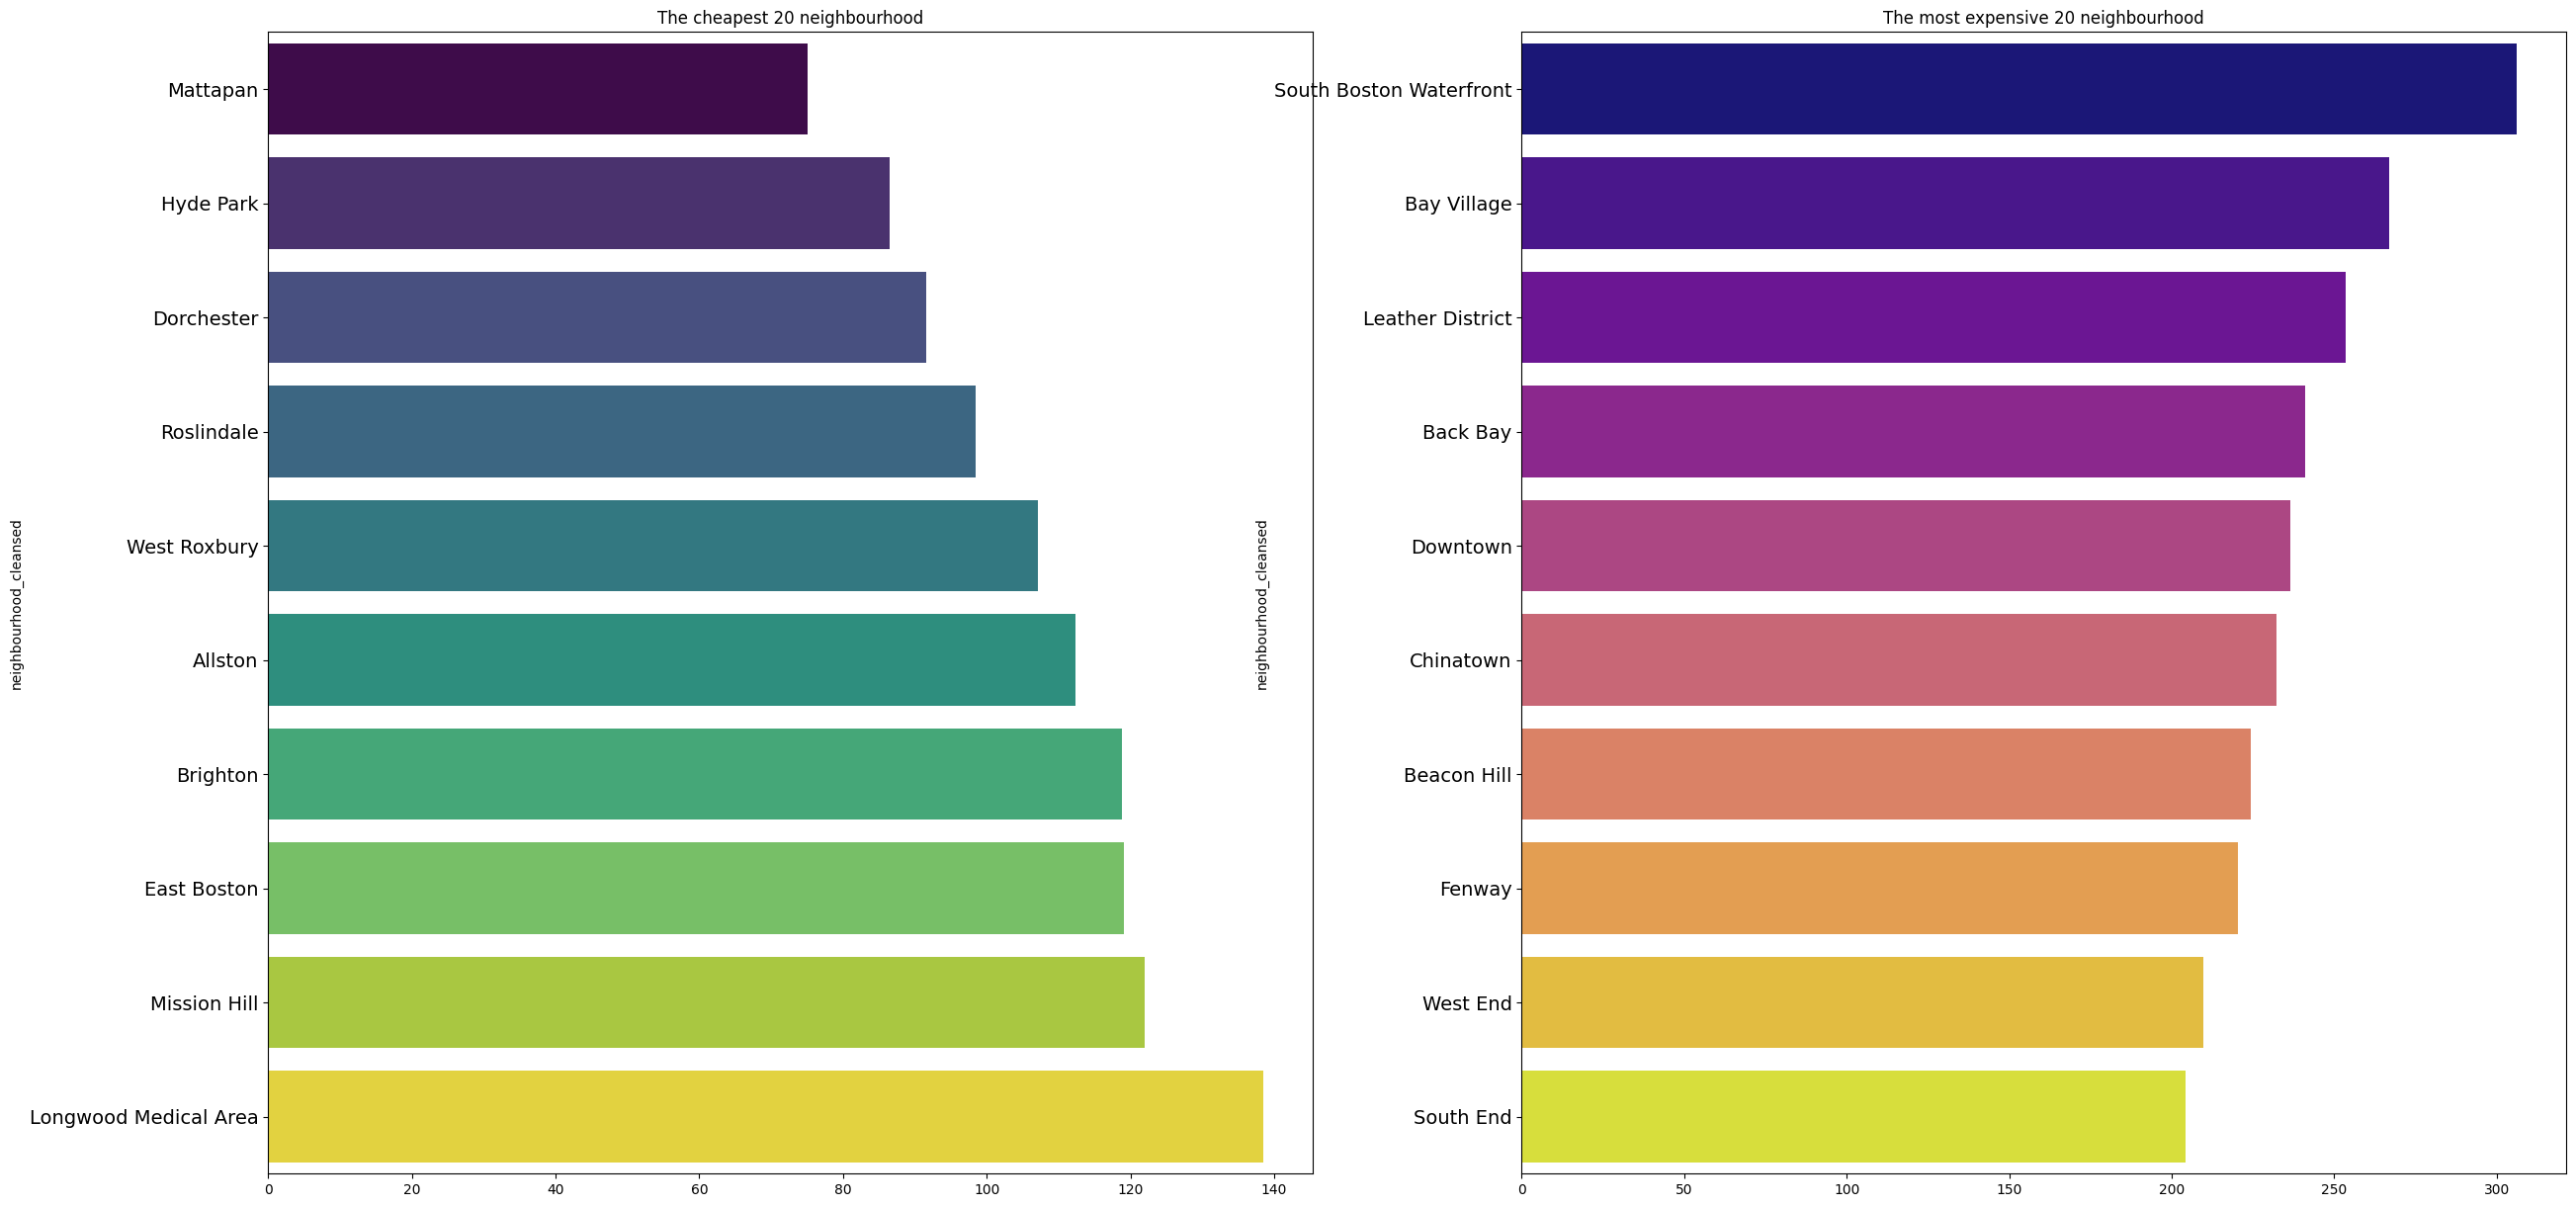

In [83]:
a = bos_listings_processed.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=True).head(10)
d = bos_listings_processed.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)

colors_a = plt.cm.viridis(np.linspace(0, 1, len(a)))
colors_d = plt.cm.plasma(np.linspace(0, 1, len(d)))

fig = plt.figure(figsize=(30,15))

ax1 = fig.add_subplot(121)
sns.barplot(y=a.index, x=a.values, ax=ax1, palette=colors_a)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_title('The cheapest 20 neighbourhood')

ax2 = fig.add_subplot(122)
sns.barplot(y=d.index, x=d.values, ax=ax2, palette=colors_d)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_title('The most expensive 20 neighbourhood')
plt.show()

[]

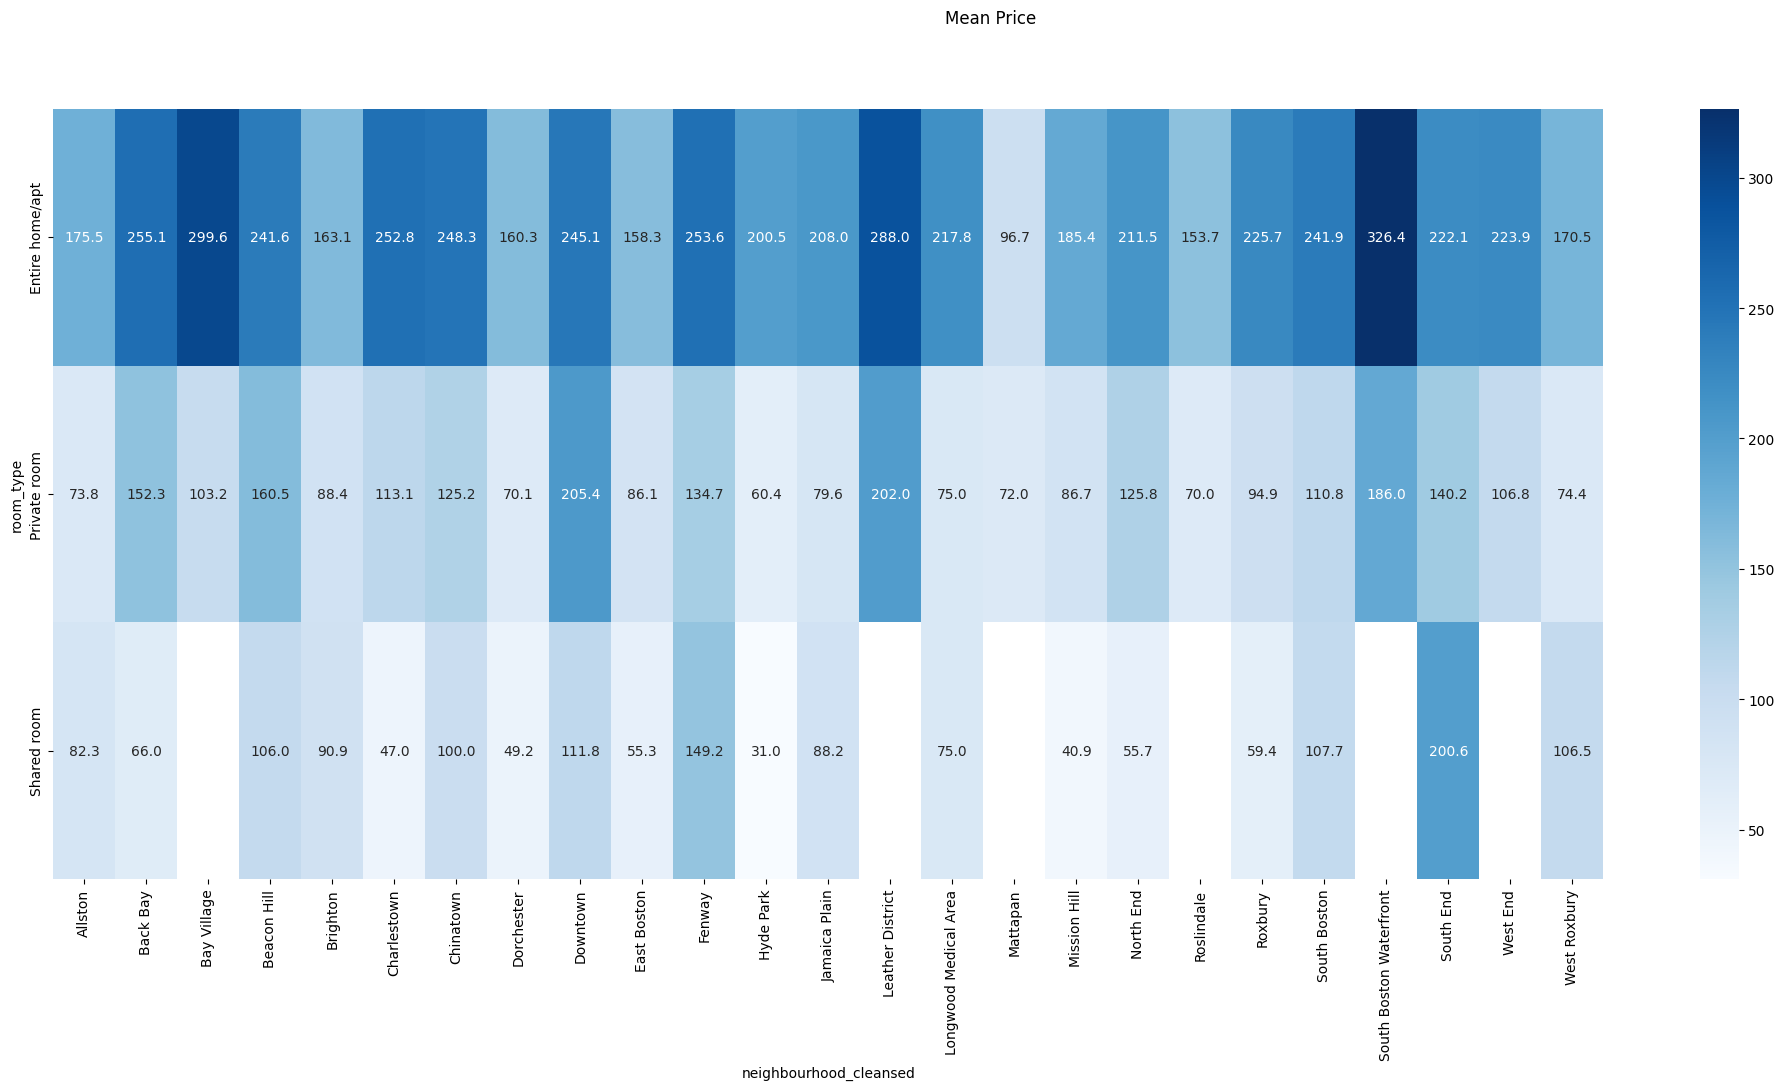

In [84]:
plt.figure(figsize=(25,10))
df_pivot = bos_listings_processed.pivot_table(values='price', index='room_type', columns='neighbourhood_cleansed', aggfunc='mean')
sns.heatmap(df_pivot, annot=True, fmt='.1f', cmap='Blues')
plt.suptitle('Mean Price')
plt.plot()

In [85]:
# Creating dataframes for time series analysis
ts_host_since = pd.DataFrame(bos_listings_processed.set_index('host_since').resample('MS').size())
ts_first_review = pd.DataFrame(bos_listings_processed.set_index('first_review').resample('MS').size())

# Renaming columns
ts_host_since = ts_host_since.rename(columns={0: 'hosts'})
ts_host_since.index.rename('month', inplace=True)
ts_first_review = ts_first_review.rename(columns={0: 'reviews'})
ts_first_review.index.rename('month', inplace=True)

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose_time_series(df, title=''):
    """
    Plots the original time series and its decomposition into trend, seasonal and residual.
    """
    # Decomposing the time series
    decomposition = seasonal_decompose(bos_listings_processed)

    # Getting the trend, seasonality and noise
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Plotting the original time series and the decomposition
    plt.figure(figsize=(12,8))
    plt.suptitle(title, fontsize=14, y=1)
    plt.subplots_adjust(top=0.80)
    plt.subplot(411)
    plt.plot(df, label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


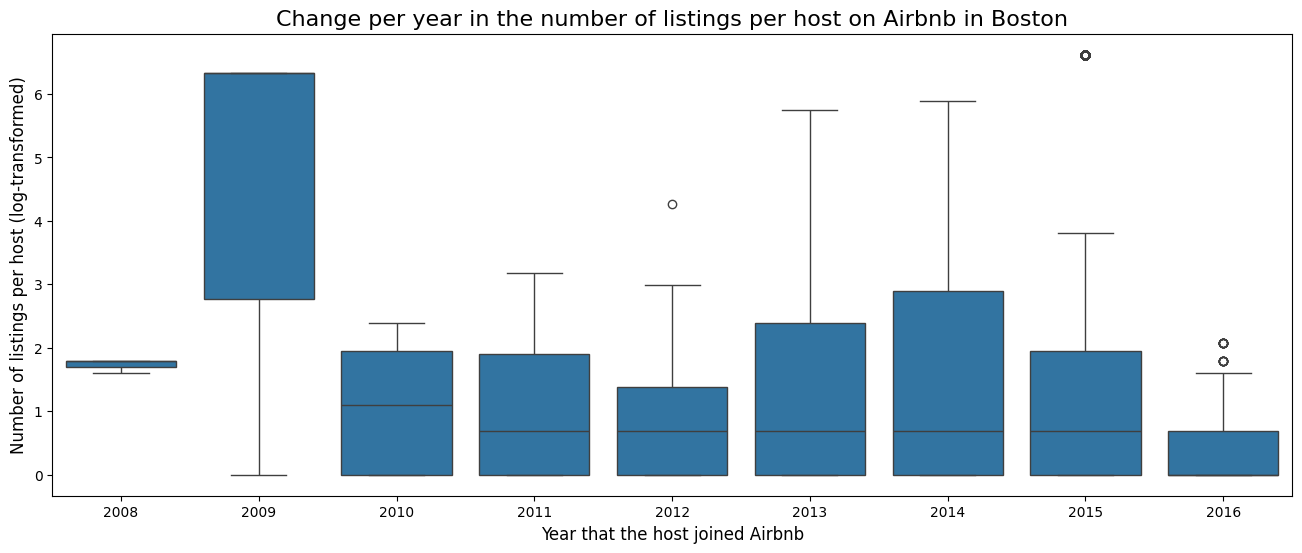

In [87]:
plt.figure(figsize=(16, 6))
# years = bos_listings_processed.host_since.dt.year.unique()
# palette = sns.color_palette("husl", len(years))
# year_color_map = dict(zip(years, palette))
sns.boxplot(x=bos_listings_processed.host_since.dt.year, y=np.log(bos_listings_processed.host_listings_count))
plt.xlabel('Year that the host joined Airbnb', fontsize=12)
plt.ylabel('Number of listings per host (log-transformed)', fontsize=12)
plt.title('Change per year in the number of listings per host on Airbnb in Boston', fontsize=16)
plt.show()


Average number of listings per host per year on Airbnb


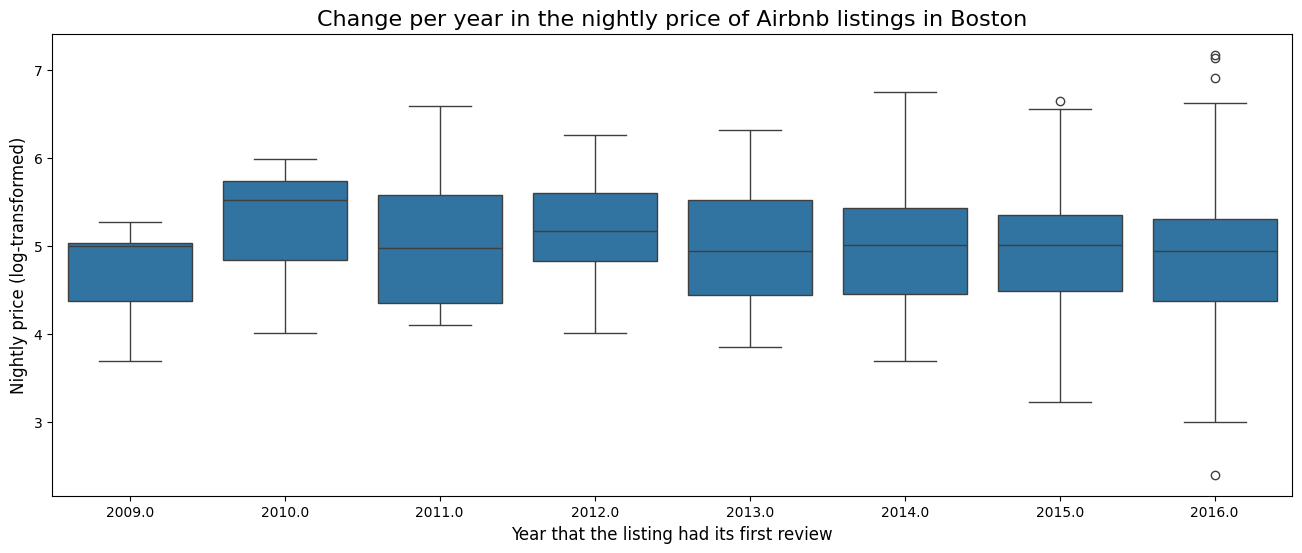

In [88]:
print("Average number of listings per host per year on Airbnb")
round(bos_listings_processed.set_index('host_since').host_listings_count.resample('YS').mean(),2)

# List of the largest host_listings_count and the year the host joined Airbnb
bos_listings_processed.sort_values('host_listings_count').drop_duplicates('host_listings_count',keep='last').tail(10)[['host_since', 'host_listings_count']]

plt.figure(figsize=(16,6))
sns.boxplot(x=bos_listings_processed.first_review.dt.year, y=np.log(bos_listings_processed.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Boston', fontsize=16)
plt.savefig('night_price_change.png', dpi=600, bbox_inches='tight')
plt.show()

In [89]:
print("Mean nightly price of listings in each year on Airbnb in Boston")
print(round(bos_listings_processed.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Boston
first_review
2009-01-01   124.830000
2010-01-01   230.280000
2011-01-01   180.750000
2012-01-01   204.540000
2013-01-01   169.400000
2014-01-01   178.210000
2015-01-01   167.550000
2016-01-01   157.780000
Name: price, dtype: float64


In [90]:
# Dropping host_since and first_review as they are no longer needed
bos_listings_processed.drop(['host_since', 'first_review'], axis=1, inplace=True)

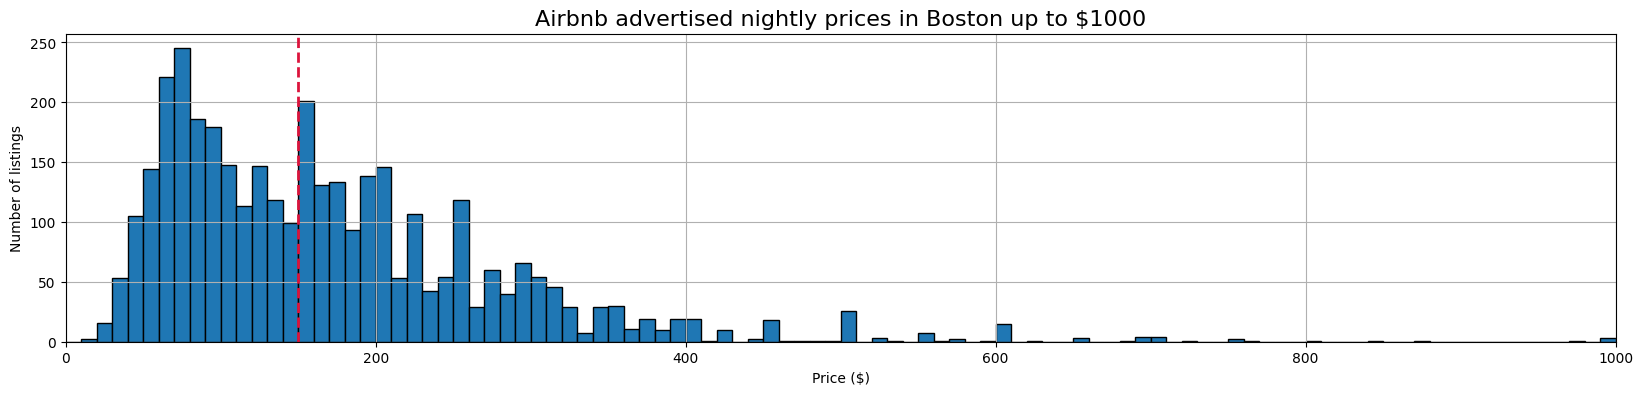

In [91]:
# Checking OVerall Distribution of Prices and Comparison with Median Price

# Distribution of prices from
1000
plt.figure(figsize=(20,4))
bos_listings_processed.price.hist(bins=100, range=(0,1000), edgecolor='black')
plt.margins(x=0)
plt.axvline(np.median(bos_listings_processed.price), color='crimson', linestyle='--', linewidth=2)
plt.title("Airbnb advertised nightly prices in Boston up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

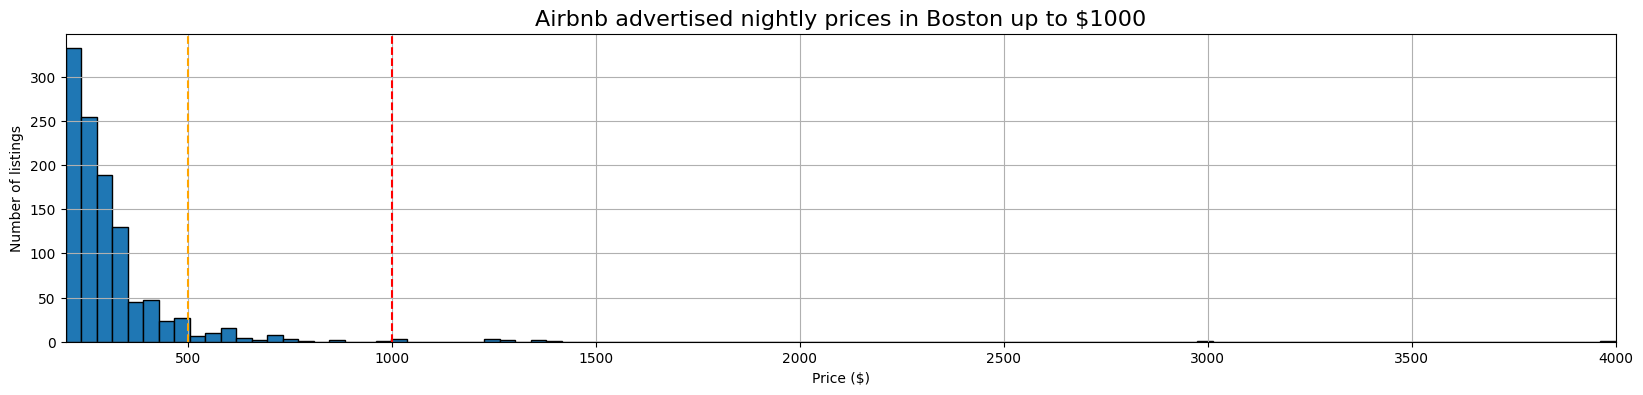

In [92]:
# Distribution of prices from $200 upwards
plt.figure(figsize=(20,4))
bos_listings_processed.price.hist(bins=100, range=(200, max(bos_listings_processed.price)), edgecolor = 'black')
plt.margins(x=0)
plt.axvline(500, color='orange', linestyle='--')
plt.axvline(1000, color='red', linestyle='--')
plt.title("Airbnb advertised nightly prices in Boston up to $1000", fontsize=16)
plt.xlabel("Price ($)")
plt.ylabel("Number of listings")
plt.show()

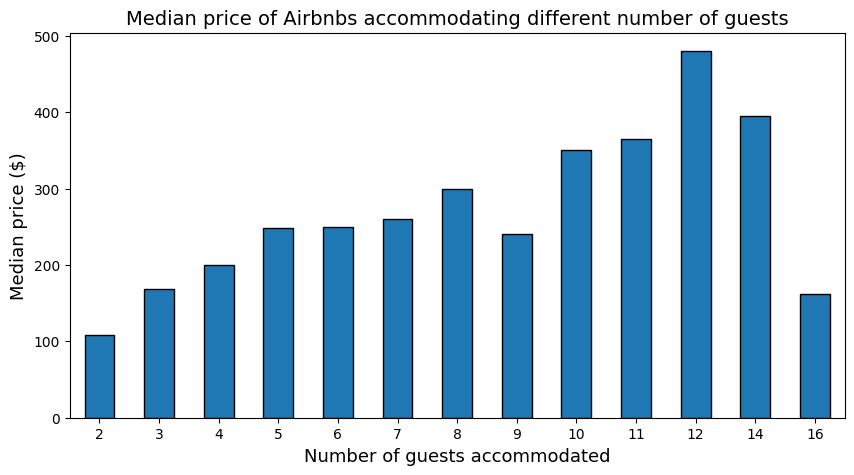

In [93]:
plt.figure(figsize=(10,5))
bos_listings_processed.groupby('accommodates').price.median().plot(kind='bar',edgecolor='black')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price ($)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()


In [94]:
print("Median number of listings per host:", int(bos_listings_processed.host_listings_count.median()))
print("Mean number of listings per host:", int(round(bos_listings_processed.host_listings_count.mean())))
print(f"{int(round(100*len(bos_listings_processed[bos_listings_processed.host_listings_count == 1])/len(bos_listings_processed)))}% of listings are from hosts with one listing.")


Median number of listings per host: 2
Mean number of listings per host: 59
45% of listings are from hosts with one listing.


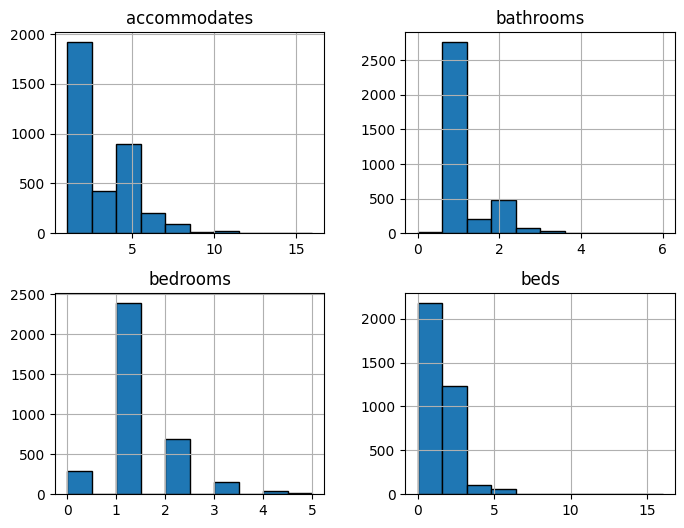

In [95]:
bos_listings_processed[['accommodates', 'bathrooms', 'bedrooms', 'beds']].hist(figsize=(8,6), edgecolor='black');

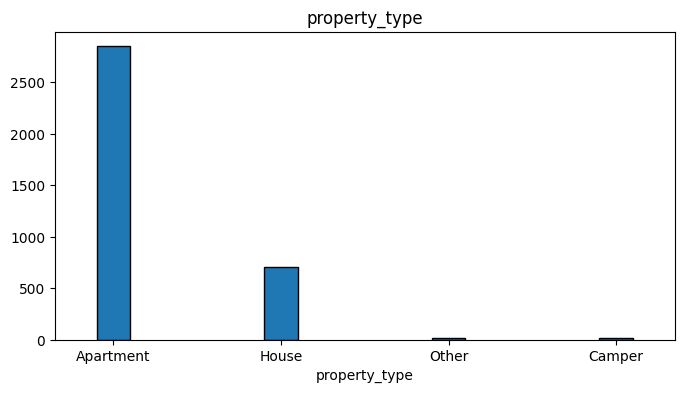

property_type
Apartment   0.794142
House       0.196653
Other       0.005579
Camper      0.003626
Name: proportion, dtype: float64


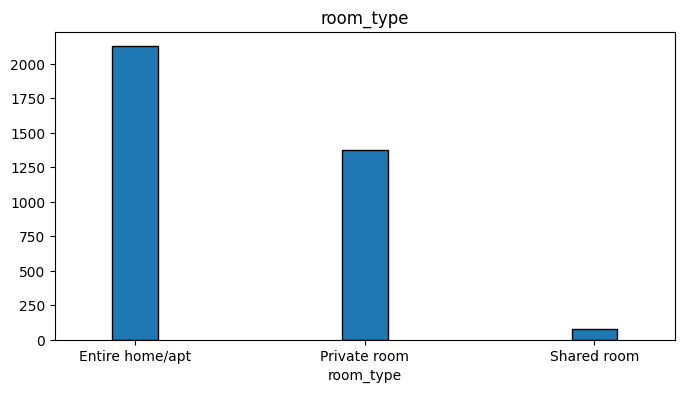

room_type
Entire home/apt   0.593305
Private room      0.384379
Shared room       0.022315
Name: proportion, dtype: float64


In [96]:
def category_count_plot(col, figsize=(8,4)):
    """
    Plots a simple bar chart of the total count for each category in the column specified.
    A figure size can optionally be specified.
    """
    plt.figure(figsize=figsize)
    bos_listings_processed[col].value_counts().plot(kind='bar', edgecolor='black', width = 0.2)
    plt.title(col)
    plt.xticks(rotation=0)
    plt.show()

for col in ['property_type', 'room_type']:
    category_count_plot(col, figsize=(8,4))
    print(bos_listings_processed[col].value_counts(normalize=True))


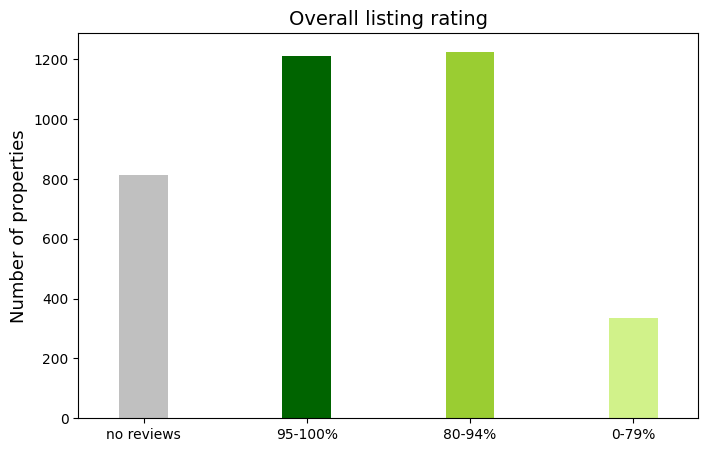

In [97]:

fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
bos_listings_processed['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], width = 0.3,ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

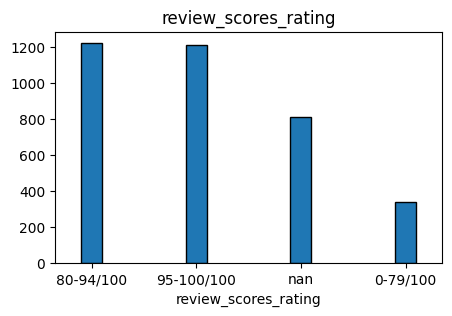

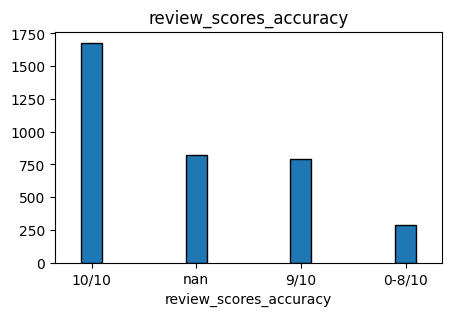

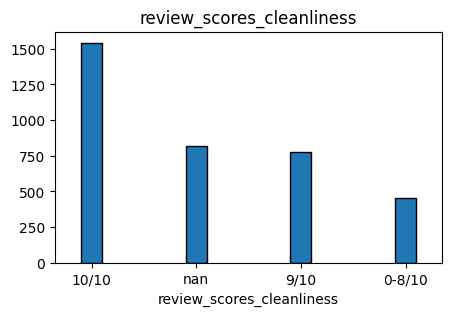

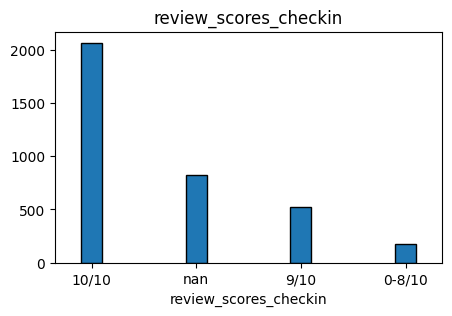

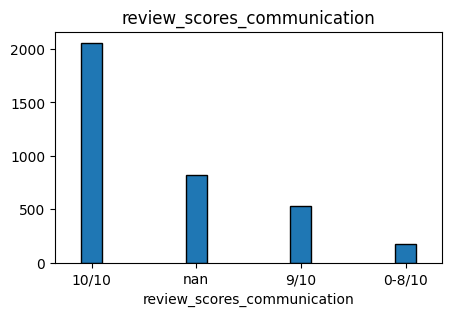

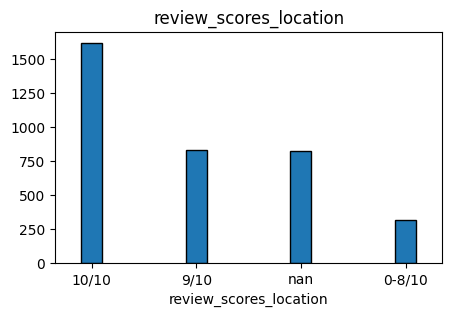

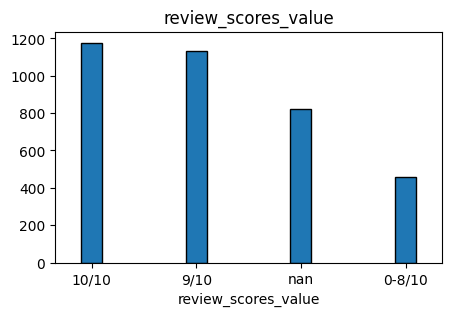

In [98]:
for col in list(bos_listings_processed.columns[bos_listings_processed.columns.str.startswith("review_scores") == True]):
    category_count_plot(col, figsize=(5,3))

<Axes: xlabel='host_is_superhost'>

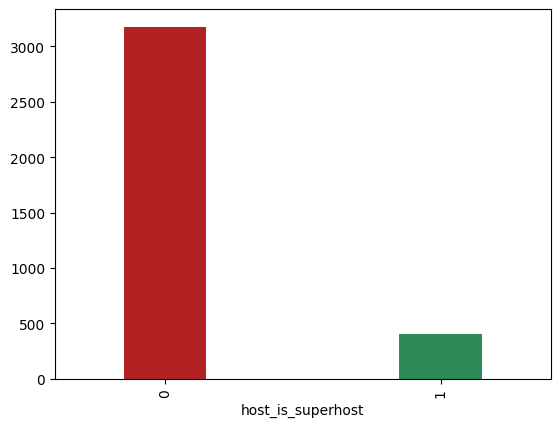

In [99]:
bos_listings_processed.groupby(bos_listings_processed.host_is_superhost).size().plot(kind='bar', color=['firebrick', 'seagreen'], width = 0.3)


<Axes: xlabel='host_is_superhost'>

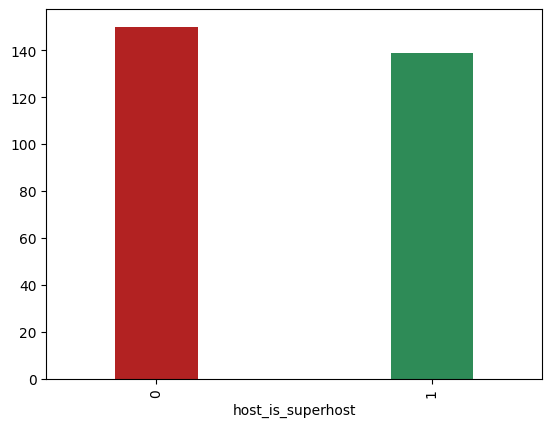

In [100]:
bos_listings_processed.groupby(bos_listings_processed.host_is_superhost).price.median().plot(kind='bar', color=['firebrick', 'seagreen'],width = 0.3)

<Axes: xlabel='host_identity_verified'>

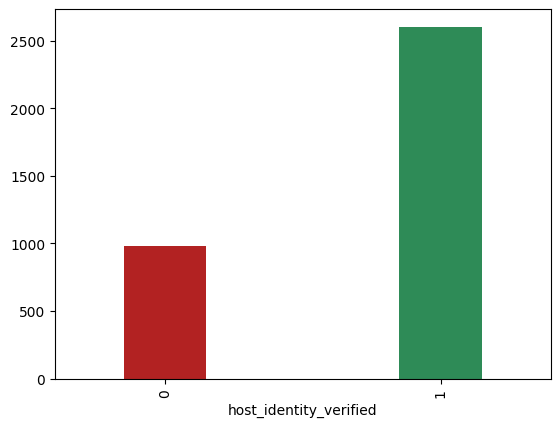

In [101]:
bos_listings_processed.groupby(bos_listings_processed.host_identity_verified).size().plot(kind='bar', color=['firebrick', 'seagreen'],width=0.3)

<Axes: xlabel='host_identity_verified'>

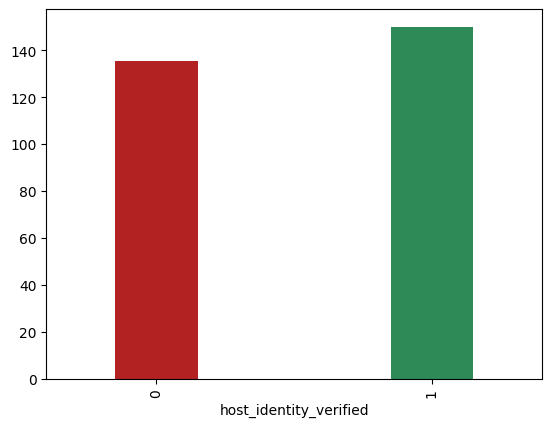

In [102]:
bos_listings_processed.groupby(bos_listings_processed.host_identity_verified).price.median().plot(kind='bar', color=['firebrick', 'seagreen'],width=0.3)


###Data Modelling

In [103]:
bos_listings_processed.head()

host_id  host_response_time host_response_rate  \
id                                                          
12147973  31303940           Not Known                nan   
3075044    2572247      within an hour               100%   
6976         16701  within a few hours               100%   
1436513    6031442  within a few hours               100%   
7651065   15396970      within an hour               100%   

         host_acceptance_rate  host_is_superhost  host_listings_count  \
id                                                                      
12147973                  NaN                  0                    1   
3075044                  100%                  0                    1   
6976                      88%                  1                    1   
1436513                   50%                  0                    1   
7651065                  100%                  1                    1   

          host_has_profile_pic  host_identity_verified  \
id                                                       
12147973                     1                       0   
3075044                      1                       1   
6976                         1                       1   
1436513                      1                       0   
7651065                      1                       1   

                                                     street  \
id                                                            
12147973      Birch Street, Boston, MA 02131, United States   
3075044   Pinehurst Street, Boston, MA 02131, United States   
6976            Ardale St., Boston, MA 02131, United States   
1436513                           Boston, MA, United States   
7651065     Durnell Avenue, Boston, MA 02131, United States   

         neighbourhood_cleansed    city zipcode  market smart_location  \
id                                                                       
12147973             Roslindale  Boston   02131  Boston     Boston, MA   
3075044              Roslindale  Boston   02131  Boston     Boston, MA   
6976                 Roslindale  Boston   02131  Boston     Boston, MA   
1436513              Roslindale  Boston     NaN  Boston     Boston, MA   
7651065              Roslindale  Boston   02131  Boston     Boston, MA   

          latitude  longitude  is_location_exact property_type  \
id                                                               
12147973 42.282619 -71.133068                  1         House   
3075044  42.286241 -71.134374                  1     Apartment   
6976     42.292438 -71.135765                  1     Apartment   
1436513  42.281106 -71.121021                  0         House   
7651065  42.284512 -71.136258                  1         House   

                room_type  accommodates  bathrooms  bedrooms     beds  \
id                                                                      
12147973  Entire home/apt             4   1.500000  2.000000 3.000000   
3075044      Private room             2   1.000000  1.000000 1.000000   
6976         Private room             2   1.000000  1.000000 1.000000   
1436513      Private room             4   1.000000  1.000000 2.000000   
7651065      Private room             2   1.500000  1.000000 2.000000   

          bed_type      price weekly_price monthly_price security_deposit  \
id                                                                          
12147973  Real Bed 250.000000          NaN           NaN              NaN   
3075044   Real Bed  65.000000      $400.00           NaN           $95.00   
6976      Real Bed  65.000000      $395.00     $1,350.00              NaN   
1436513   Real Bed  75.000000          NaN           NaN          $100.00   
7651065   Real Bed  79.000000          NaN           NaN              NaN   

         cleaning_fee  guests_included extra_people  minimum_nights  \
id                                                                    
12147973       $35.00                1        

In [104]:
bos_listings_processed.shape

(3585, 62)

In [105]:
# Lists that will be manipulated in the data processing
columns_list = []
list_cat_col = []
list_num_col = []

In [107]:
def get_col(df: 'dataframe', type_descr: 'numpy') -> list:
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n')
    else:
        return col.tolist()

In [108]:
list_num_col = get_col(df=bos_listings_processed, type_descr=np.number)

list_cat_col = get_col(df=bos_listings_processed, type_descr=object)

columns_list = get_col(df=bos_listings_processed, type_descr=[object, np.number])

In [109]:
print(list_cat_col)

['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'street', 'neighbourhood_cleansed', 'city', 'zipcode', 'market', 'smart_location', 'property_type', 'room_type', 'bed_type', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated', 'calendar_last_scraped', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'cancellation_policy', 'time_since_first_review', 'time_since_last_review']


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# #categorical = bos_listings_processed.select_dtypes(include=['object']).columns

# df_transformed = pd.DataFrame()

# for i in list_cat_col:
#   df_transformed[i] = LabelEncoder().fit_transform(bos_listings_processed[i])


# df_transformed.dtypes

In [110]:
df_transformed = pd.get_dummies(bos_listings_processed)

In [ ]:
# bos_listings_processed.info()

In [111]:
df_transformed.head()

host_id  host_is_superhost  host_listings_count  \
id                                                           
12147973  31303940                  0                    1   
3075044    2572247                  0                    1   
6976         16701                  1                    1   
1436513    6031442                  0                    1   
7651065   15396970                  1                    1   

          host_has_profile_pic  host_identity_verified  latitude  longitude  \
id                                                                            
12147973                     1                       0 42.282619 -71.133068   
3075044                      1                       1 42.286241 -71.134374   
6976                         1                       1 42.292438 -71.135765   
1436513                      1                       0 42.281106 -71.121021   
7651065                      1                       1 42.284512 -71.136258   

          is_location_exact  accommodates  bathrooms  bedrooms     beds  \
id                                                                        
12147973                  1             4   1.500000  2.000000 3.000000   
3075044                   1             2   1.000000  1.000000 1.000000   
6976                      1             2   1.000000  1.000000 1.000000   
1436513                   0             4   1.000000  1.000000 2.000000   
7651065                   1             2   1.500000  1.000000 2.000000   

              price  guests_included  minimum_nights  maximum_nights  \
id                                                                     
12147973 250.000000                1               2            1125   
3075044   65.000000                0               2              15   
6976      65.000000                1               3              45   
1436513   75.000000                2               1            1125   
7651065   79.000000                1               2              31   

          availability_90  number_of_reviews  requires_license  \
id                                                               
12147973                0                  0                 0   
3075044                84                 36                 0   
6976                   61                 41                 0   
1436513                26                  1                 0   
7651065                59                 29                 0   

          instant_bookable  require_guest_profile_picture  \
id                                                          
12147973                 0                              0   
3075044                  1                              0   
6976                     0                              1   
1436513                  0                              0   
7651065                  0                              0   

          require_guest_phone_verification  calculated_host_listings_count  \
id                                                                           
12147973                                 0                               1   
3075044                                  0                               1   
6976                                     0                               1   
1436513                                  0                               1   
7651065                                  0                               1   

          host_active_days  air_conditioning      gym       tv  \
id                                                               
12147973              2901               NaN 0.000000 1.000000   
3075044               3943               NaN 0.000000 1.000000   
6976                  5066               NaN 0.000000 1.000000   
1436513               3625               NaN 1.000000 1.000000   
7651065               3240               NaN 0.000000 0.000000   

          nature_and_views  white_goods  elevator  internet  pets_allowed  \
id           

In [112]:
df_transformed.shape

(3585, 2305)

In [114]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


In [116]:
tr_df = df_transformed.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('street')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('host')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('neighbourhood')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('time')]), axis=1)


In [117]:
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('weekly')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('monthly')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('security_deposit')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('cleaning')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('extra')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('smart')]), axis=1)

In [118]:
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('city')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('zipcode')]), axis=1)

In [119]:
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('calendar')]), axis=1)
tr_df = tr_df.drop(list(df_transformed.columns[df_transformed.columns.str.startswith('market')]), axis=1)

In [120]:
tr_df.shape

(3585, 71)

In [121]:
# multi_collinearity_heatmap(tr_df, figsize=(40,25))


In [122]:
#transformed_df_new.shape

In [123]:
tr_df.columns

Index(['latitude', 'longitude', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_90',
       'number_of_reviews', 'requires_license', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'air_conditioning', 'gym', 'tv',
       'nature_and_views', 'white_goods', 'elevator', 'internet',
       'pets_allowed', 'secure', 'property_type_Apartment',
       'property_type_Camper', 'property_type_House', 'property_type_Other',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'bed_type_Airbed', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed',
       'review_scores_rating_0-79/100', 'review_scores_rating_80-94/100',
       'review_scores_rating_95-100/100', 'review_scores_rating_nan',
       'review_scores_accuracy_0-

In [124]:
#dropping colliner and having null features

to_drop_cols = ['air_conditioning', 'nature_and_views', 'requires_license',  'bed_type_Airbed', 'bed_type_Couch', 'bed_type_Futon',
                'bed_type_Pull-out Sofa', 'bed_type_Real Bed',  'review_scores_rating_nan',
       'review_scores_accuracy_0-8/10', 'review_scores_accuracy_10/10',
       'review_scores_accuracy_9/10', 'review_scores_accuracy_nan',
       'review_scores_cleanliness_0-8/10', 'review_scores_cleanliness_10/10',
       'review_scores_cleanliness_9/10', 'review_scores_cleanliness_nan',
       'review_scores_checkin_0-8/10', 'review_scores_checkin_10/10',
       'review_scores_checkin_9/10', 'review_scores_checkin_nan',
       'review_scores_communication_0-8/10',
       'review_scores_communication_10/10', 'review_scores_communication_9/10',
       'review_scores_communication_nan', 'review_scores_location_0-8/10',
       'review_scores_location_10/10', 'review_scores_location_9/10',
       'review_scores_location_nan', 'review_scores_value_0-8/10',
       'review_scores_value_10/10', 'review_scores_value_9/10',
       'review_scores_value_nan']

to_drop_cols.extend(list(tr_df.columns[tr_df.columns.str.endswith('nan')]))

tr_df.drop(to_drop_cols, axis=1, inplace=True)

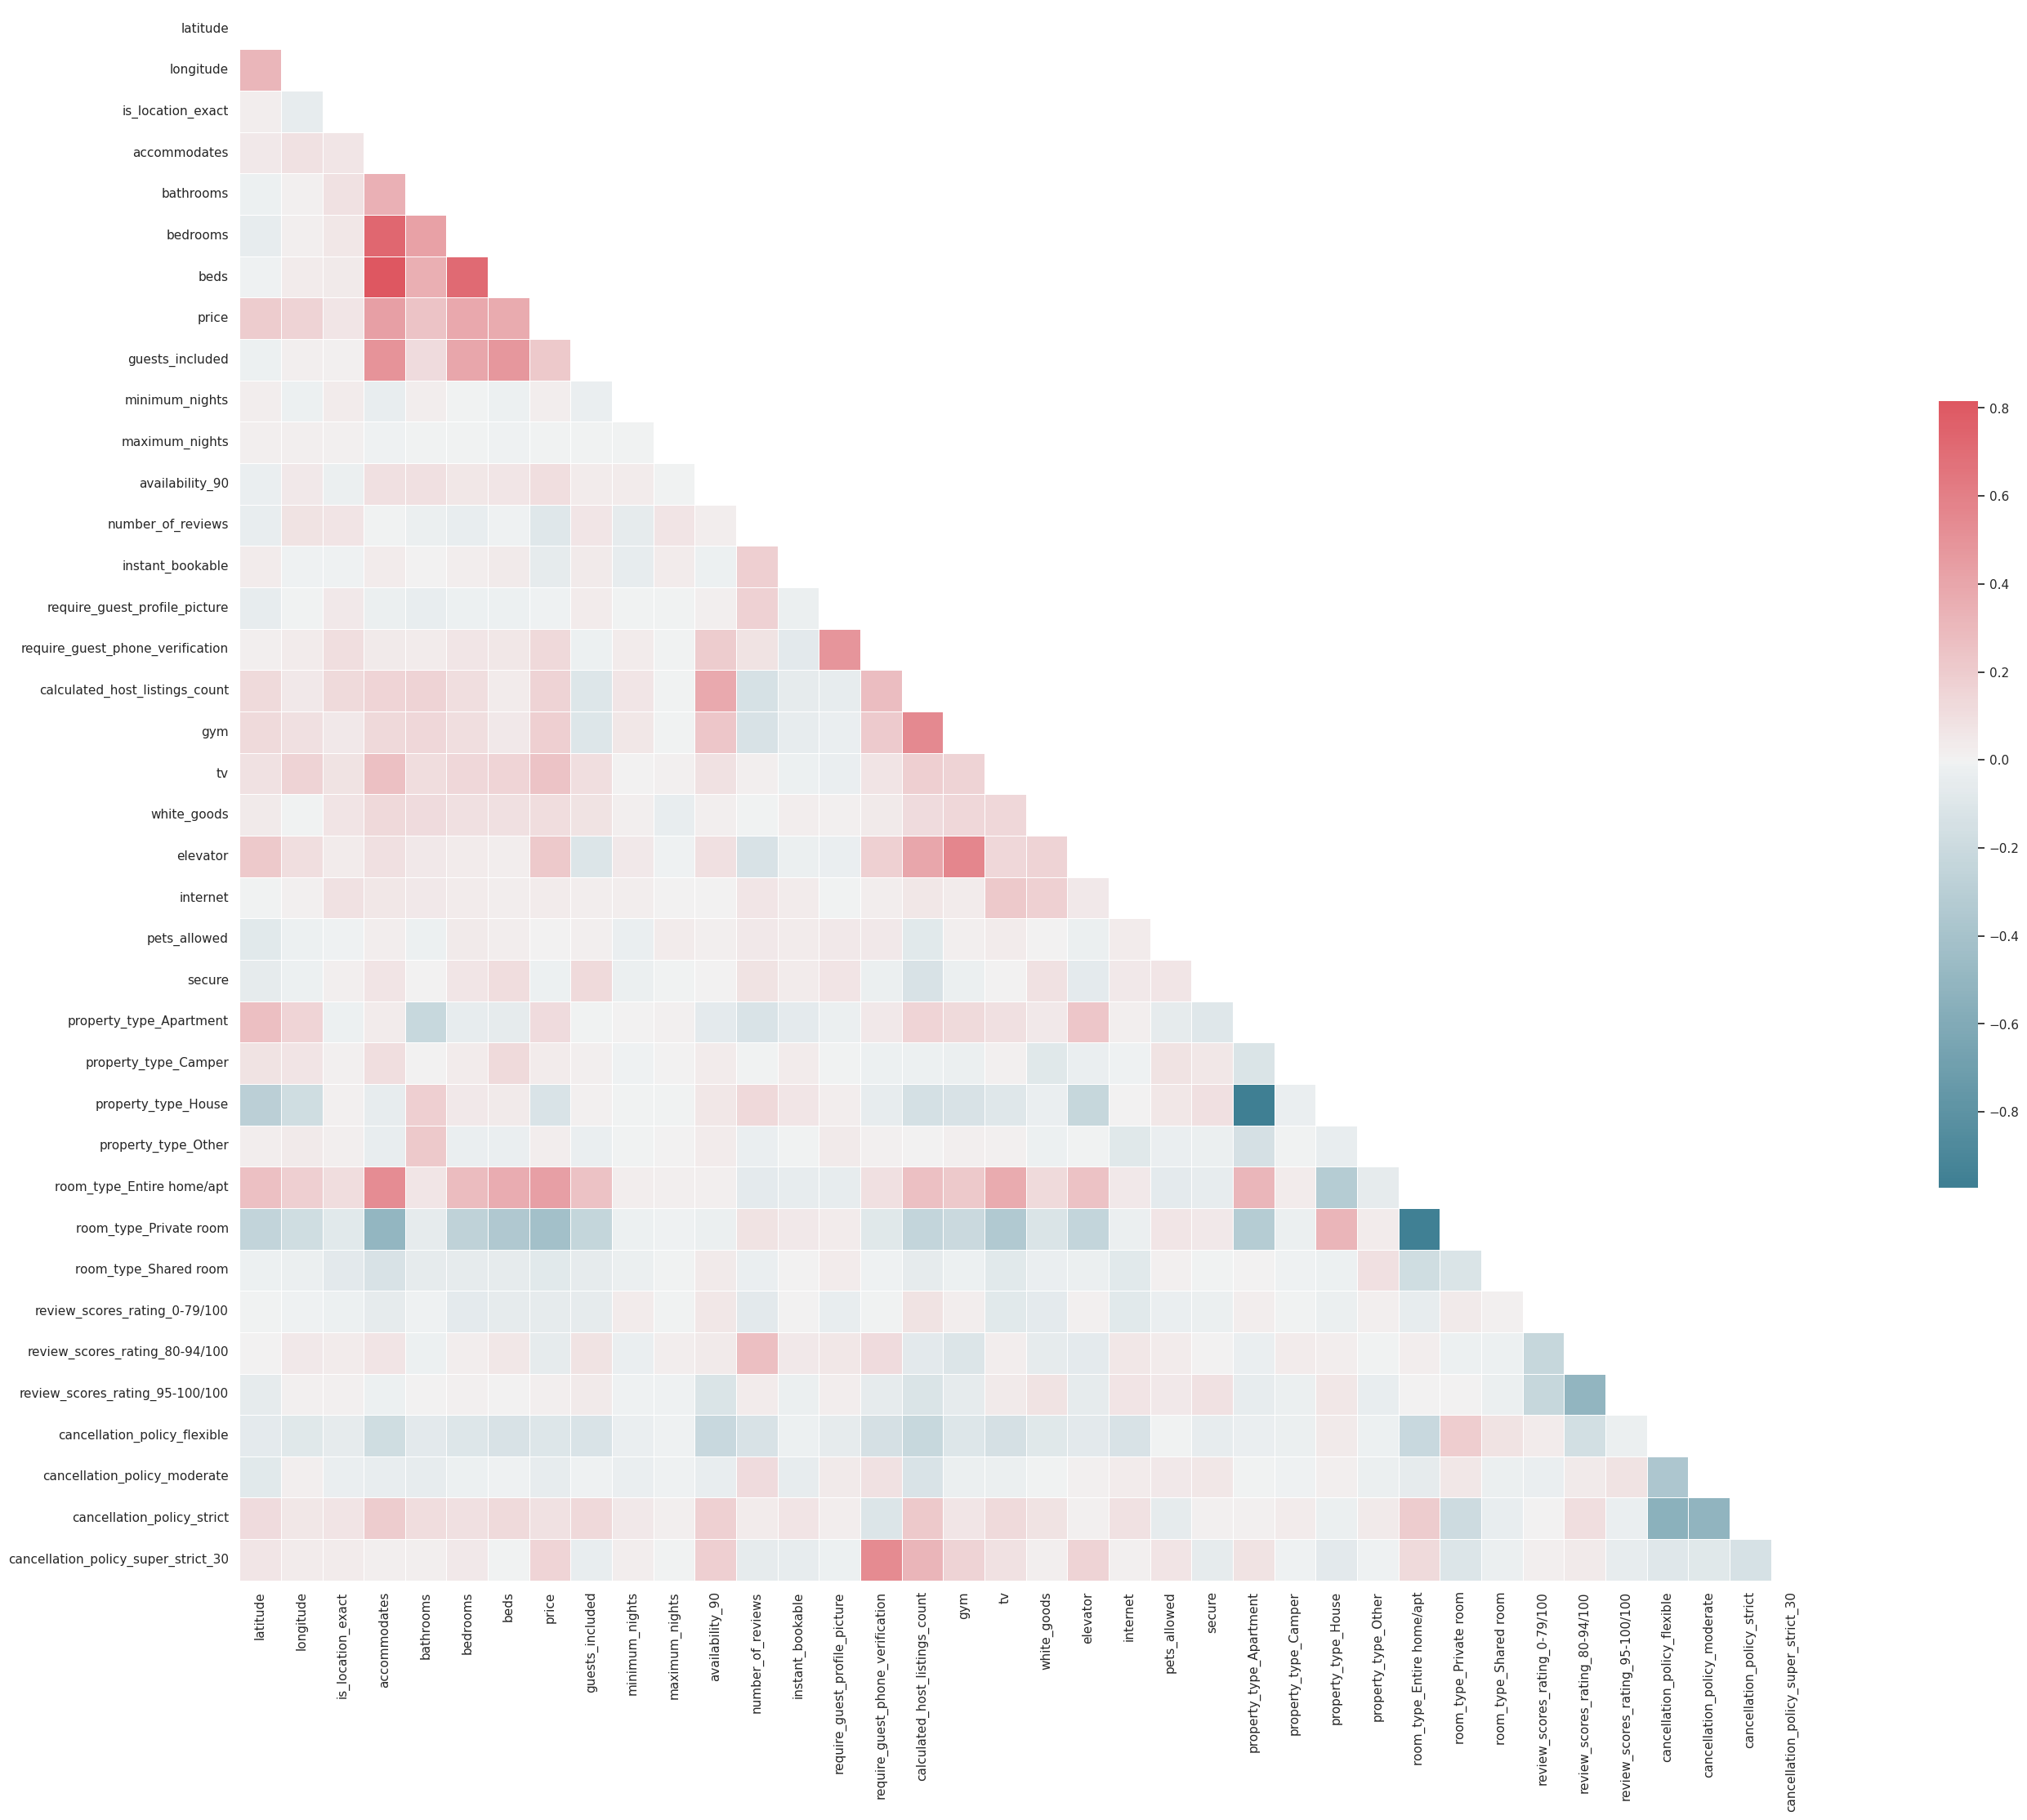

In [125]:
multi_collinearity_heatmap(tr_df, figsize=(40,25))

In [126]:
#there are still some collinear features

to_drop_cols_new = ['cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cancellation_policy_super_strict_30', 'calculated_host_listings_count','white_goods']

tr_df.drop(to_drop_cols_new, axis=1, inplace=True)

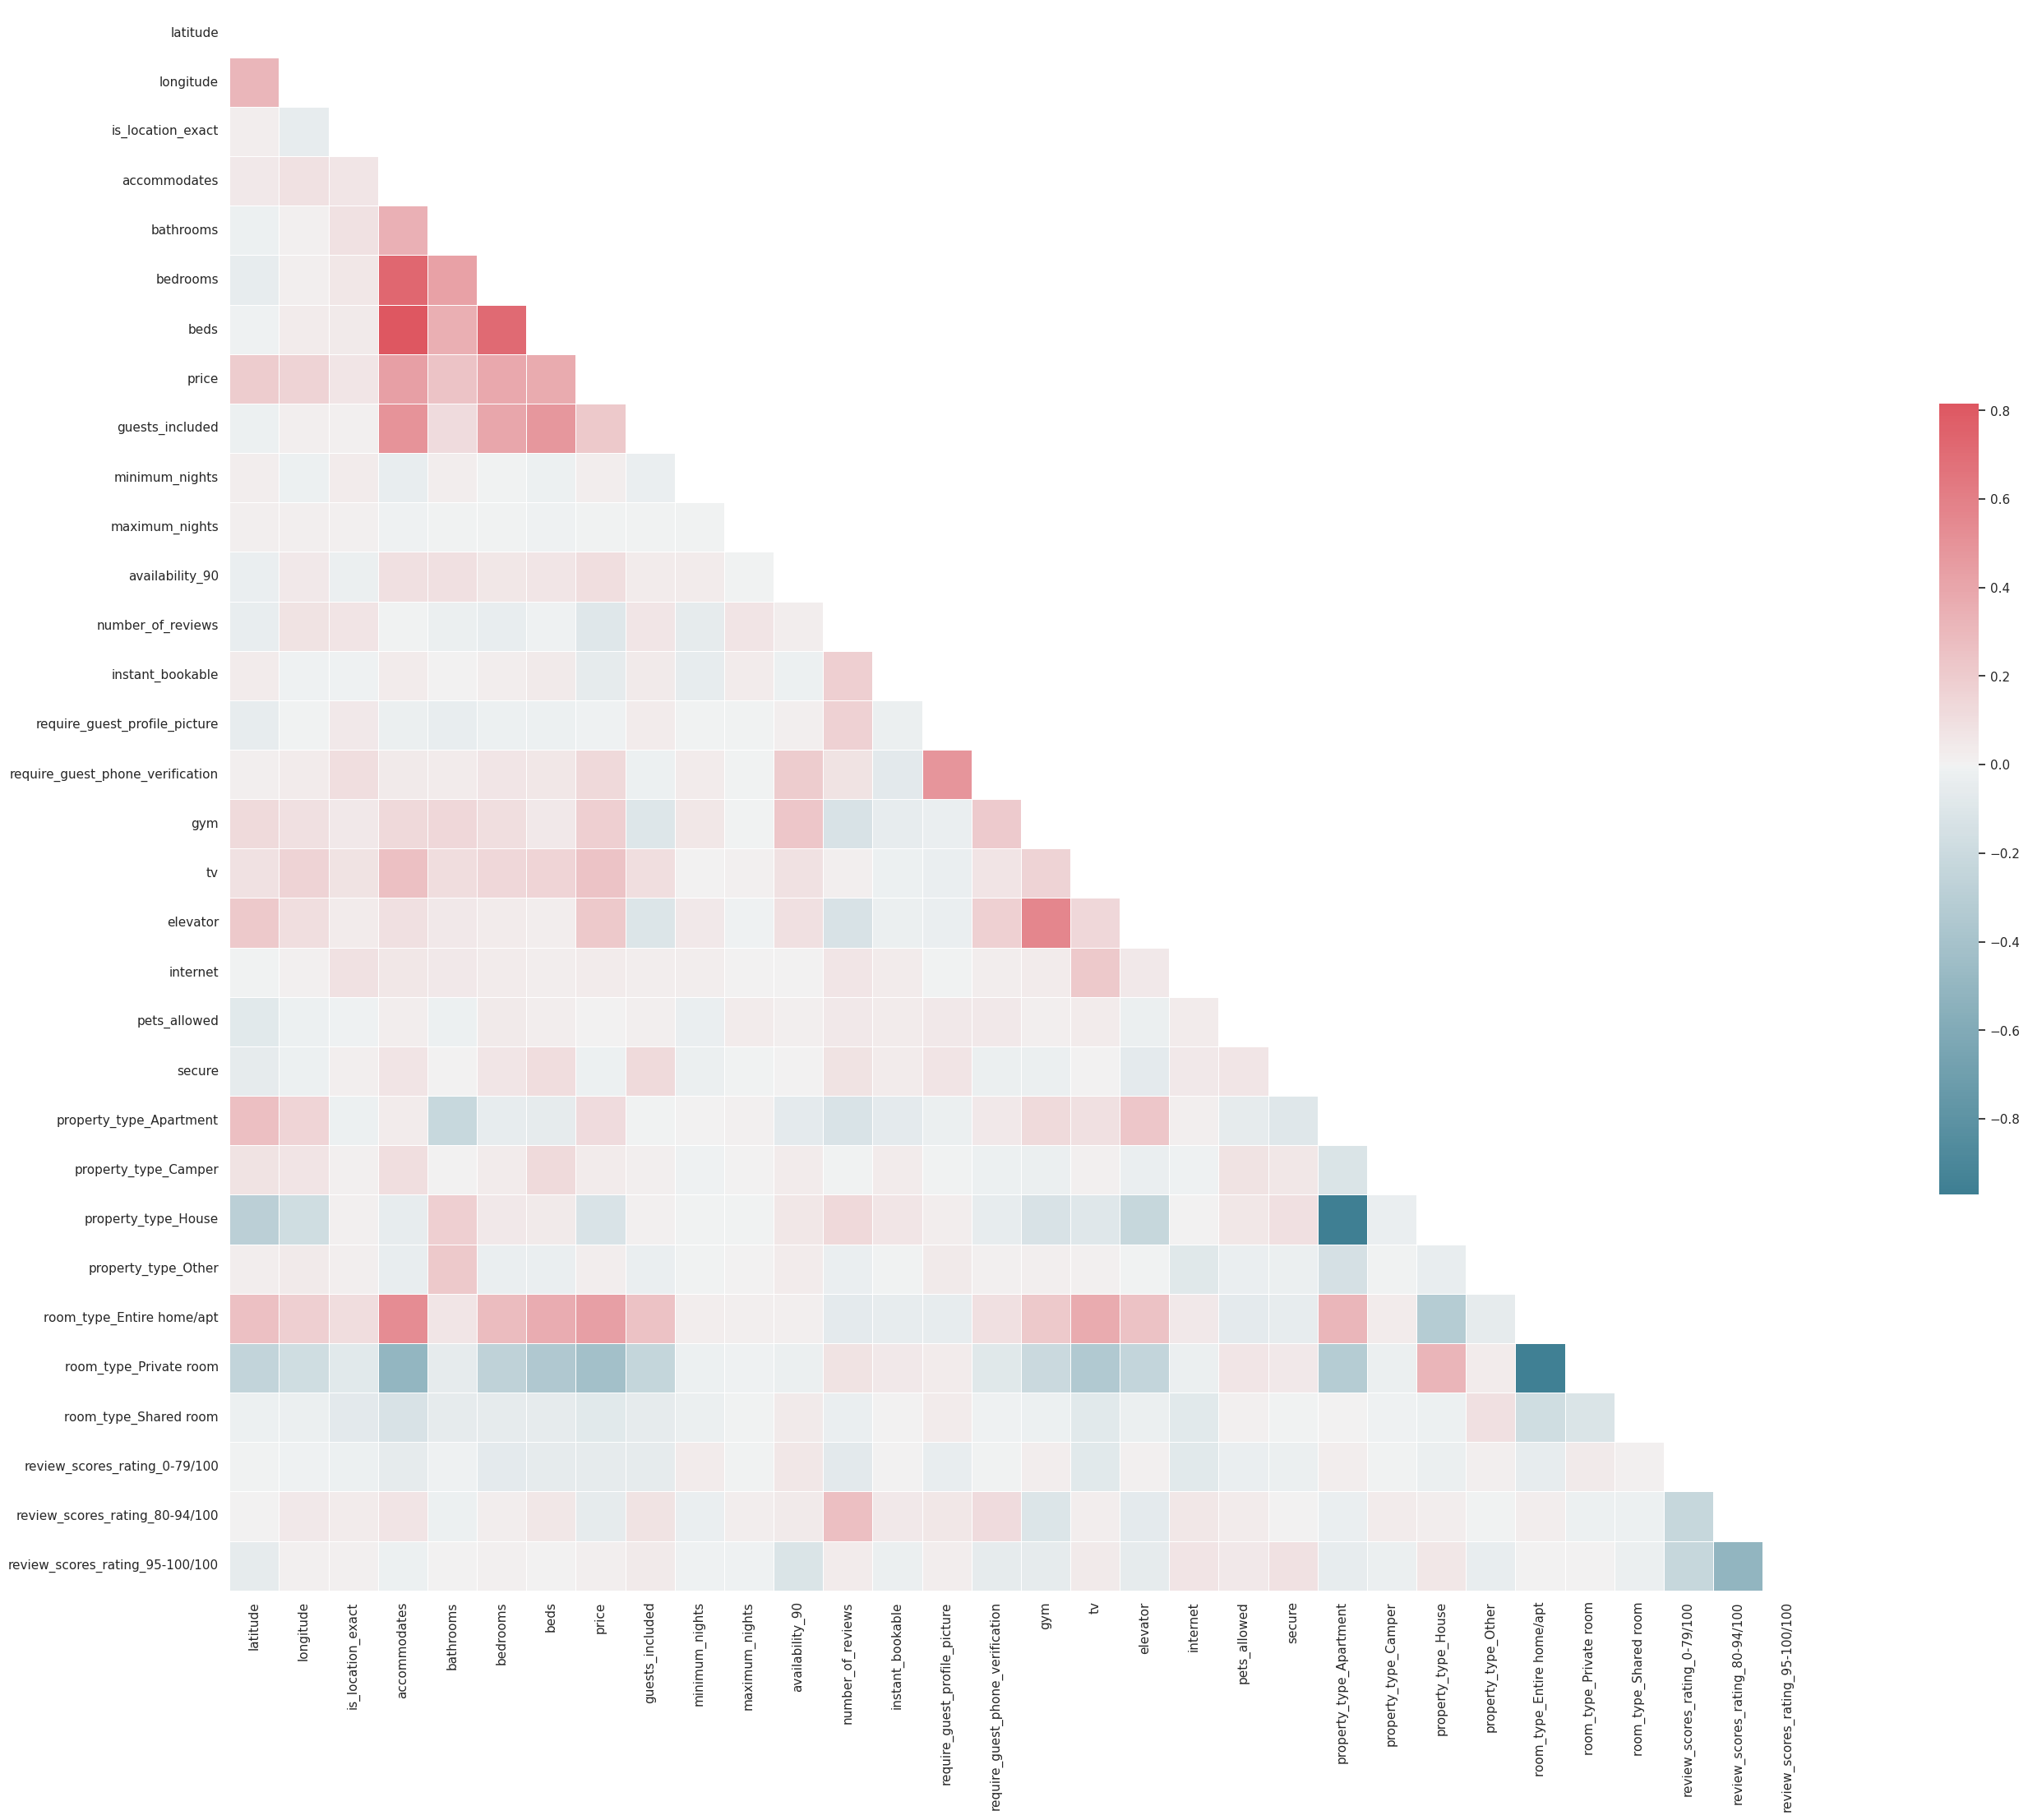

In [127]:
multi_collinearity_heatmap(tr_df, figsize=(40,25))

In [128]:
transformed_df_new = tr_df

In [129]:
numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'bedrooms','beds','maximum_nights', 'minimum_nights', 'number_of_reviews', 'price']

In [130]:
transformed_df_new[numerical_columns].hist(figsize =(10,12), edgecolor = 'black')

array([[<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'availability_90'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'maximum_nights'}>],
       [<Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

In [131]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90','price']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df_new[col] = transformed_df_new[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df_new[col] = np.log(transformed_df_new[col])


array([[<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>, <Axes: >,
        <Axes: >]], dtype=object)

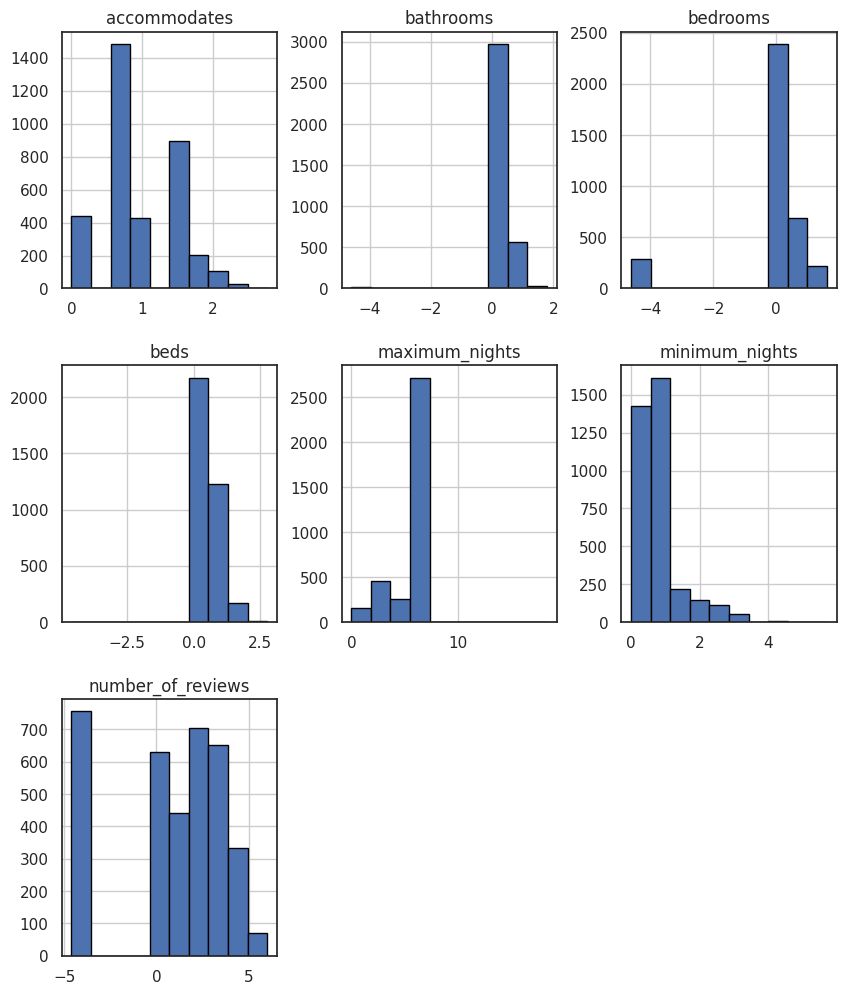

In [132]:
transformed_df_new[numerical_columns].hist(figsize =(10,12), edgecolor = 'black')

In [133]:
# Separating the target variable
X = transformed_df_new.drop('price', axis=1)
y = transformed_df_new.price

In [134]:
X.head()

latitude  longitude  is_location_exact  accommodates  bathrooms  \
id                                                                          
12147973 42.282619 -71.133068                  1      1.386294   0.405465   
3075044  42.286241 -71.134374                  1      0.693147   0.000000   
6976     42.292438 -71.135765                  1      0.693147   0.000000   
1436513  42.281106 -71.121021                  0      1.386294   0.000000   
7651065  42.284512 -71.136258                  1      0.693147   0.405465   

          bedrooms     beds  guests_included  minimum_nights  maximum_nights  \
id                                                                             
12147973  0.693147 1.098612                1        0.693147        7.025538   
3075044   0.000000 0.000000                0        0.693147        2.708050   
6976      0.000000 0.000000                1        1.098612        3.806662   
1436513   0.000000 0.693147                2        0.000000        7.025538   
7651065   0.000000 0.693147                1        0.693147        3.433987   

          availability_90  number_of_reviews  instant_bookable  \
id                                                               
12147973                0          -4.605170                 0   
3075044                84           3.583519                 1   
6976                   61           3.713572                 0   
1436513                26           0.000000                 0   
7651065                59           3.367296                 0   

          require_guest_profile_picture  require_guest_phone_verification  \
id                                                                          
12147973                              0                                 0   
3075044                               0                                 0   
6976                                  1                                 0   
1436513                               0                                 0   
7651065                               0                                 0   

              gym       tv  elevator  internet  pets_allowed   secure  \
id                                                                      
12147973 0.000000 1.000000  0.000000  1.000000      1.000000 0.000000   
3075044  0.000000 1.000000  0.000000  1.000000      1.000000 0.000000   
6976     0.000000 1.000000  0.000000  1.000000      0.000000 1.000000   
1436513  1.000000 1.000000  0.000000  1.000000      0.000000 1.000000   
7651065  0.000000 0.000000  0.000000  1.000000      0.000000 0.000000   

          property_type_Apartment  property_type_Camper  property_type_House  \
id                                                                             
12147973                    False                 False                 True   
3075044                      True                 False                False   
6976                         True                 False                False   
1436513                     False                 False                 True   
7651065                     False                 False                 True   

          property_type_Other  room_type_Entire home/apt  \
id                                                         
12147973                False                       True   
3075044                 False                      False   
6976                    False                      False   
1436513                 False                      False   
7651065                 False                      False   

          room_type_Private room  room_type_Shared room  \
id                                                        
12147973                   False                  False   
3075044                     True                  False   
6976                        True                  False   
1436513                     True                  False   
7651065                     True                  False   

In [135]:
X.shape

(3585, 31)

In [136]:
columns = X.columns
scaler = StandardScaler()
X[columns] = scaler.fit_transform(X[columns])

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(2509, 31)
(1076, 31)
(2509,)


In [139]:
def plot_pred_vs_act_scatterplot():
  length = len(prediction_dictionaries)
  n_col = 2
  if length < 2:
    n_col = length % 2

  nrow = 1
  if(length > 2):
    nrow = int(length / 2)
    if length % 2 != 0:
      nrow+=1

  fig, axes = plt.subplots(nrow, n_col, figsize=( 16, 3 * length))
  for ax, key in zip(axes.flatten(), prediction_dictionaries.keys()):
    sns.regplot(prediction_dictionaries[key], y_test, ax=ax)
    ax.set_title("The correlation line in {}".format(key))
  plt.show()

In [140]:
from tabulate import tabulate

##Model 1 - KNN

In [141]:
# Generate a kNN model
model_knn = neighbors.KNeighborsRegressor()
print(model_knn.get_params())

# Distance and Weight Array
n = np.arange(1,21)
dist = np.array(['euclidean', 'manhattan'])
weight = np.array(['uniform', 'distance'])

#Finding Best Performing Parameters
results = pd.DataFrame(columns = ['#neighbors','distance', 'weight', 'rmse'])
index = 0
for i in n:
  for j in dist:
    for k in weight:
      model_knn = neighbors.KNeighborsRegressor(n_neighbors=i, metric=str(j), weights=k)
      model_knn.fit(X_train, y_train)
      pred = model_knn.predict(X_test)
      rmse = mean_squared_error(y_test, pred, squared=False)
      results.loc[index] = [i,j,k,rmse]
      index +=1
print('Best performing model')
print(tabulate(results[results['rmse']==results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Best performing model
+----+--------------+------------+----------+---------+
|    |   #neighbors | distance   | weight   |    rmse |
|----+--------------+------------+----------+---------|
| 47 |           12 | manhattan  | distance | 101.166 |
+----+--------------+------------+----------+---------+
All results
+----+--------------+------------+----------+---------+
|    |   #neighbors | distance   | weight   |    rmse |
|----+--------------+------------+----------+---------|
|  0 |            1 | euclidean  | uniform  | 152.591 |
|  1 |            1 | euclidean  | distance | 152.591 |
|  2 |            1 | manhattan  | uniform  | 149.595 |
|  3 |            1 | manhattan  | distance | 149.595 |
|  4 |            2 | euclidean  | uniform  | 118.087 |
|  5 |            2 | euclidean  | distance | 118.092 |
|  6 |            2 | manhattan  

In [142]:
#Best performing model

print('Best performing model')
print(tabulate(results[results['rmse']==results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+--------------+------------+----------+---------+
|    |   #neighbors | distance   | weight   |    rmse |
|----+--------------+------------+----------+---------|
| 47 |           12 | manhattan  | distance | 101.166 |
+----+--------------+------------+----------+---------+


In [143]:
# Predicted vs Actual Values

model_knn = neighbors.KNeighborsRegressor(n_neighbors=7, metric="manhattan", weights="distance")
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

prediction_dictionaries = {'KNN': y_pred}

prediction_list = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'KNN': y_pred.flatten()}).head(20)
prediction_list.set_index('Actual Values', inplace=True)
prediction_list

KNN
Actual Values           
279.000000    356.222718
65.000000      74.766390
35.000000      78.846244
33.000000      61.759322
229.000000    172.329349
300.000000    210.475849
100.000000    122.241956
51.000000      82.868210
138.000000    178.437012
300.000000    290.137894
199.000000    270.394967
69.000000     108.701913
119.000000    166.513040
159.000000    195.109657
50.000000      59.120305
175.000000    208.412761
229.000000    167.509470
265.000000    220.794249
149.000000    170.956883
80.000000     115.069835

In [145]:
plt.figure(figsize=(8,8))
sns.regplot(x= y_pred, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.show()

In [146]:
mae_knn = mean_absolute_error(y_test, y_pred)
rmse_knn = mean_squared_error(y_test, y_pred, squared = False)

print('MAE: ', mae_knn)
print('RMSE: ',rmse_knn)
#print('Training R^2 Value: ', knn_model.score(X_train, y_train))
#print('Validation R^2 Value: ', r2_score(y_test, y_pred))

MAE:  54.77656574734183
RMSE:  103.16233036138333


###Cross Validation for KNN

In [147]:
kmdl= neighbors.KNeighborsRegressor(n_neighbors=5)
scores = cross_val_score(kmdl, transformed_df_new.drop('price', axis=1), transformed_df_new.price, cv=5, scoring='neg_root_mean_squared_error')
print('scores: ',scores)
print('Mean RMSE: ', -np.mean(scores))

scores:  [ -96.55286236 -128.65442799 -136.07662068 -185.8637986  -160.91410462]
Mean RMSE:  141.61236284995212


#### Cross validation with KNN grid search

In [148]:
# Generate a kNN model
model_knn = neighbors.KNeighborsRegressor()
print(model_knn.get_params())

# Give parameter values
parameters = {'n_neighbors':np.arange(1,21), 'metric': ['euclidean', 'manhattan'], 'weights': ['uniform', 'distance']}

# Grid search best model
optimized_model = GridSearchCV(model_knn, parameters, cv=5, scoring='neg_root_mean_squared_error' )
optimized_model.fit(transformed_df_new.drop('price', axis=1), transformed_df_new.price)

# Result
results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

# Best Scores
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
+----+-----------------+----------------+-------------------+------------------+----------------+---------------------+-----------------+-------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_metric   |   param_n_neighbors | param_weights   | params                                                            |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|----+-----------------+----------------+-------------------+------------------+----------------+----

In [149]:
# Randomized search best model
from sklearn.model_selection import RandomizedSearchCV
optimized_model = RandomizedSearchCV(model_knn, parameters, cv=5,  scoring='neg_root_mean_squared_error')
optimized_model.fit(transformed_df_new.drop('price', axis=1), transformed_df_new.price)

results = pd.DataFrame(optimized_model.cv_results_)
print(tabulate(results, headers = 'keys', tablefmt = 'psql'))

# Best Scores
print('Best score: ',optimized_model.best_score_)
print('Best parameters: ',optimized_model.best_params_)
print('Best estimator: ',optimized_model.best_estimator_)

+----+-----------------+----------------+-------------------+------------------+-----------------+---------------------+----------------+------------------------------------------------------------------+---------------------+---------------------+---------------------+---------------------+---------------------+-------------------+------------------+-------------------+
|    |   mean_fit_time |   std_fit_time |   mean_score_time |   std_score_time | param_weights   |   param_n_neighbors | param_metric   | params                                                           |   split0_test_score |   split1_test_score |   split2_test_score |   split3_test_score |   split4_test_score |   mean_test_score |   std_test_score |   rank_test_score |
|----+-----------------+----------------+-------------------+------------------+-----------------+---------------------+----------------+------------------------------------------------------------------+---------------------+---------------------+----

Scaling the data as per the results obtained from the above KNN cross validation

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

pipe_kNN_scaled = Pipeline(steps = [ ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])

pipe_kNN_scaled_pca = Pipeline(steps = [('Scaler', StandardScaler()), ('pca',PCA(n_components=2)), ('model',neighbors.KNeighborsRegressor(n_neighbors=5))])


#pipe_list = [pipe_kNN, pipe_kNN_scaled, pipe_kNN_scaled_pca]
pipe_list = [pipe_kNN_scaled, pipe_kNN_scaled_pca]

for pipe in pipe_list:
  model = pipe.fit(X_train, y_train)
  pred = model.predict(X_test)
  print('RMSE', mean_squared_error(y_test, pred, squared=False))
  print('MAE', mean_absolute_error(y_test, pred))
  print('\n')

RMSE 108.59522229284636
MAE 58.0364312267658


RMSE 129.8564212840431
MAE 67.76524163568773




## Model 2 - Decision Tree

In [151]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
pred = model_dt.predict (X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ',mean_squared_error(y_test, pred, squared = False))

MAE:  60.61431226765799
RMSE:  159.97695872662436


### Tuning the hyper parameters

All results
+----+---------+----------------+---------+
|    |   depth | puritymethod   |    rmse |
|----+---------+----------------+---------|
|  0 |       1 | squared_error  | 120.73  |
|  1 |       1 | friedman_mse   | 120.73  |
|  2 |       1 | absolute_error | 123.344 |
|  3 |       2 | squared_error  | 113.404 |
|  4 |       2 | friedman_mse   | 113.404 |
|  5 |       2 | absolute_error | 115.093 |
|  6 |       3 | squared_error  | 113.075 |
|  7 |       3 | friedman_mse   | 113.075 |
|  8 |       3 | absolute_error | 114.833 |
|  9 |       4 | squared_error  | 111.187 |
| 10 |       4 | friedman_mse   | 111.187 |
| 11 |       4 | absolute_error | 114.786 |
| 12 |       5 | squared_error  | 159.741 |
| 13 |       5 | friedman_mse   | 159.676 |
| 14 |       5 | absolute_error | 112.583 |
| 15 |       6 | squared_error  | 158.57  |
| 16 |       6 | friedman_mse   | 161.65  |
| 17 |       6 | absolute_error | 114.254 |
| 18 |       7 | squared_error  | 162.326 |
| 19 |       7 | fri

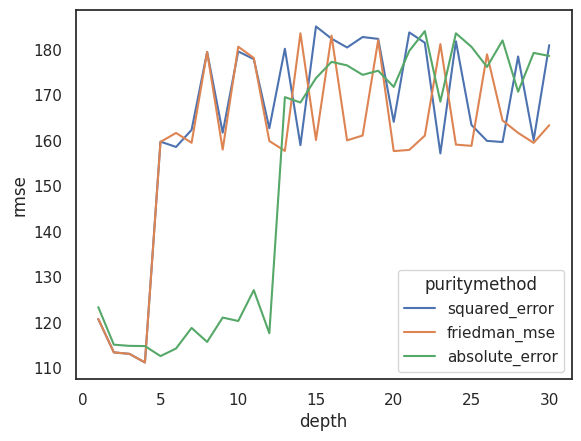

In [152]:
ind = 0
criterion_values = ['squared_error', 'friedman_mse', 'absolute_error']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'rmse'])

for i in range(1, 31):
  for j in criterion_values:
    model_dt = DecisionTreeRegressor(max_depth=i, criterion=j)
    model_dt.fit(X_train, y_train)
    pred = model_dt.predict(X_test)
    df_results.loc[ind] = [i, j, mean_squared_error(y_test, pred, squared = False)]
    ind+=1
sns_plot = sns.lineplot(x = 'depth', y = 'rmse', hue='puritymethod', data = df_results)
sns_plot.figure.savefig("decisiontree.png")

#print('Best performing model')
#print(tabulate(df_results[df_results['rmse']==df_results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))

print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))

In [153]:
print('Best performing model')
print(tabulate(df_results[df_results['rmse']==df_results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+---------+----------------+---------+
|    |   depth | puritymethod   |    rmse |
|----+---------+----------------+---------|
|  9 |       4 | squared_error  | 111.187 |
| 10 |       4 | friedman_mse   | 111.187 |
+----+---------+----------------+---------+


In [154]:
model_dt = DecisionTreeRegressor(max_depth=8, criterion='absolute_error')
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict (X_test)

In [155]:
# Prediction vs actual values for Decision Tree
prediction_list['Decision Tree'] = np.array(y_pred_dt[:20])
prediction_list

KNN  Decision Tree
Actual Values                          
279.000000    356.222718     319.000000
65.000000      74.766390      57.000000
35.000000      78.846244      70.000000
33.000000      61.759322      87.000000
229.000000    172.329349     169.000000
300.000000    210.475849     195.000000
100.000000    122.241956      80.000000
51.000000      82.868210      25.000000
138.000000    178.437012     150.000000
300.000000    290.137894     275.000000
199.000000    270.394967     319.000000
69.000000     108.701913      90.000000
119.000000    166.513040     319.000000
159.000000    195.109657     187.500000
50.000000      59.120305      50.000000
175.000000    208.412761     150.000000
229.000000    167.509470     250.000000
265.000000    220.794249     250.000000
149.000000    170.956883     150.000000
80.000000     115.069835      75.000000

In [156]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared = False)

print('MAE: ',mae_dt)
print('RMSE: ',rmse_dt)


MAE:  55.569702602230485
RMSE:  121.19555267767701


In [157]:
prediction_dictionaries['Decision Tree'] = y_pred_dt

In [159]:
plt.figure(figsize=(8,8))
sns.regplot(x= y_pred_dt, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.show()

## Random Forest Bagging

In [160]:
from sklearn.ensemble import RandomForestRegressor
rf_model_bagging = RandomForestRegressor (n_estimators=10).fit(X_train, y_train)
pred = rf_model_bagging.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ',mean_squared_error(y_test, pred, squared = False))

MAE:  52.240613382899625
RMSE:  107.57616610973774


### Tuning the Hyper Parameters for Random Forest Bagging

In [161]:
ind = 1
crit = ['squared_error', 'absolute_error']
df_results = pd.DataFrame(columns = ['depth', 'puritymethod', 'rmse'])

for i in np.arange(1, 31):
  for j in crit:
    rf_model = RandomForestRegressor(n_estimators=10,max_depth=i, criterion=j)
    rf_model.fit(X_train, y_train)
    pred = rf_model.predict (X_test)
    df_results.loc[ind] = [i, j, mean_squared_error(y_test, pred, squared = False)]
    ind+=1
sns_plot = sns.lineplot(x = 'depth', y = 'rmse', hue='puritymethod', data = df_results)
sns_plot.figure.savefig("randomforest.png")
print('Best performing model')
print(tabulate(df_results[df_results['rmse']==df_results['rmse'].min()], headers = 'keys', tablefmt = 'psql'))
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))

Best performing model
+----+---------+----------------+---------+
|    |   depth | puritymethod   |    rmse |
|----+---------+----------------+---------|
| 37 |      19 | squared_error  | 95.5854 |
+----+---------+----------------+---------+
All results
+----+---------+----------------+----------+
|    |   depth | puritymethod   |     rmse |
|----+---------+----------------+----------|
|  1 |       1 | squared_error  | 119.32   |
|  2 |       1 | absolute_error | 123.41   |
|  3 |       2 | squared_error  | 112.783  |
|  4 |       2 | absolute_error | 114.719  |
|  5 |       3 | squared_error  | 112.047  |
|  6 |       3 | absolute_error | 112.958  |
|  7 |       4 | squared_error  | 109.166  |
|  8 |       4 | absolute_error | 108.416  |
|  9 |       5 | squared_error  | 112.017  |
| 10 |       5 | absolute_error | 105.579  |
| 11 |       6 | squared_error  | 113.48   |
| 12 |       6 | absolute_error | 105.829  |
| 13 |       7 | squared_error  | 120.449  |
| 14 |       7 | absolute_

In [162]:
rf_model_bagging = RandomForestRegressor(n_estimators=10,max_depth=15, criterion='absolute_error').fit(X_train, y_train)
pred_rand_forest = rf_model_bagging.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, pred_rand_forest))
print('RMSE: ',mean_squared_error(y_test, pred_rand_forest, squared = False))

MAE:  53.845631970260214
RMSE:  106.98218565876815


In [163]:
prediction_dictionaries['Random Forest'] = pred_rand_forest

prediction_list['Random Forest'] = np.array(pred_rand_forest[:20])

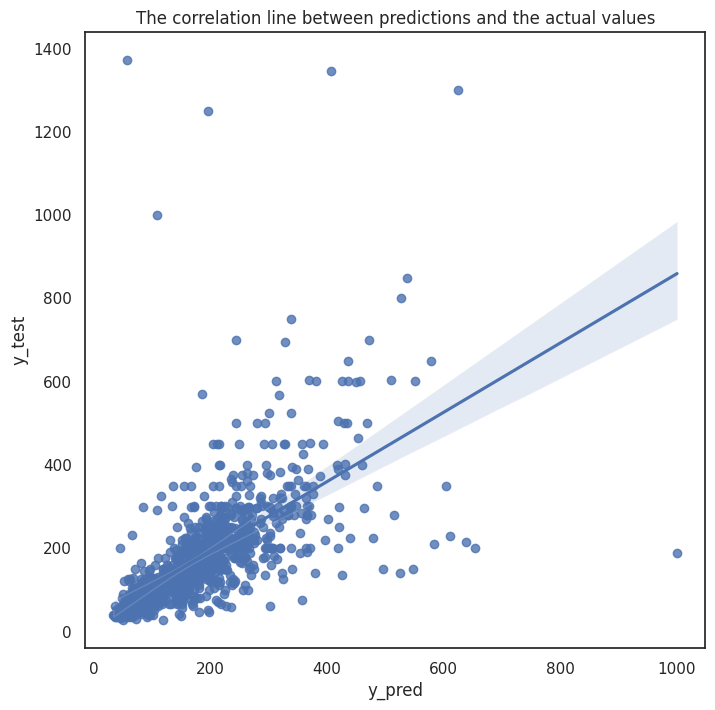

In [164]:
plt.figure(figsize=(8,8))
sns.regplot(x= pred_rand_forest, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.show()

## Model 4 - Support Vector Regressor

In [165]:
from sklearn.svm import LinearSVR, SVR
clf_svr = LinearSVR()
clf_svr.fit(X_train, y_train)
preds_svr = clf_svr.predict(X_test)

print('MAE: ', mean_absolute_error(y_test, preds_svr))
print('RMSE: ',mean_squared_error(y_test, preds_svr, squared = False))
#print("R2 Score: ",r2_score(y_test, preds_svr))

MAE:  55.33922497509375
RMSE:  112.19192978024002


In [171]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive','standard SVR'],
              'dual': [True, False],
              'tol': [0.0001, 0.00001]}

grid = GridSearchCV(LinearSVR(), param_grid, refit = True, verbose = 10, n_jobs=-1, cv=5,scoring="neg_mean_squared_error")

grid.fit(X, y)

# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import LinearSVR
# from scipy.stats import uniform

# param_grid = {'C': [uniform(loc=0, scale=10)],
#               'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive','standard SVR'],
#               'dual': [True, False],
#               'tol': [0.0001, 0.00001]}

# grid = GridSearchCV(LinearSVR(), param_grid, refit=True, verbose=10, n_jobs=-1, cv=5, scoring="neg_mean_squared_error", error_score='raise')

# grid.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py", line 507, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/

GridSearchCV(cv=5, estimator=LinearSVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'dual': [True, False],
                         'loss': ['epsilon_insensitive',
                                  'squared_epsilon_insensitive',
                                  'standard SVR'],
                         'tol': [0.0001, 1e-05]},
             scoring='neg_mean_squared_error', verbose=10)

In [172]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import LinearSVR, SVC
from scipy.stats import uniform

# Define the parameter grid for LinearSVR
param_dist_linear_svr = {
    'C': uniform(loc=0, scale=10),  # Example range for C
    'loss': ['squared_epsilon_insensitive', 'epsilon_insensitive']
}

# Define the parameter grid for SVC with kernel='linear'
param_dist_svc_linear = {
    'C': uniform(loc=0, scale=10),  # Example range for C
}

# Initialize RandomizedSearchCV for LinearSVR
random_search_linear_svr = RandomizedSearchCV(
    LinearSVR(), param_distributions=param_dist_linear_svr, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Initialize RandomizedSearchCV for SVC with kernel='linear'
random_search_svc_linear = RandomizedSearchCV(
    SVC(kernel='linear'), param_distributions=param_dist_svc_linear, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

# Perform the search for LinearSVR
random_search_linear_svr.fit(X_train, y_train)

# Perform the search for SVC with kernel='linear'
random_search_svc_linear.fit(X_train, y_train)

# Print the best parameters and the corresponding score for LinearSVR
print("Best Parameters for LinearSVR: ", random_search_linear_svr.best_params_)
print("Best Score for LinearSVR: ", random_search_linear_svr.best_score_)

# Print the best parameters and the corresponding score for SVC with kernel='linear'
print("Best Parameters for SVC with kernel='linear': ", random_search_svc_linear.best_params_)
print("Best Score for SVC with kernel='linear': ", random_search_svc_linear.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best Parameters for LinearSVR:  {'C': 3.745401188473625, 'loss': 'squared_epsilon_insensitive'}
Best Score for LinearSVR:  -16839.289377446516
Best Parameters for SVC with kernel='linear':  {'C': 0.5808361216819946}
Best Score for SVC with kernel='linear':  0.09644615152165788


In [173]:
print(f"Best parameters are {grid.best_params_}")
print("Best score is {}".format(grid.best_score_ * -1))
print("Best model is {}".format(grid.best_estimator_))
print("scores {}".format(grid.cv_results_['mean_test_score']))

Best parameters are {'C': 1, 'dual': True, 'loss': 'squared_epsilon_insensitive', 'tol': 1e-05}
Best score is 15565.798667034353
Best model is LinearSVR(C=1, loss='squared_epsilon_insensitive', tol=1e-05)
scores [-18897.63983458 -18897.90848457 -15577.03785891 -15575.63465415
             nan             nan             nan             nan
 -15575.70724887 -15575.64675286             nan             nan
 -16138.49710476 -16134.66731834 -15598.71751073 -15565.79866703
             nan             nan             nan             nan
 -15579.91513333 -15579.85171798             nan             nan
 -15992.42945395 -15996.40186244 -19824.82312855 -15899.67980277
             nan             nan             nan             nan
 -15580.35286638 -15580.28895543             nan             nan
 -15965.16203999 -15938.82821756 -22818.34433321 -28171.19970226
             nan             nan             nan             nan
 -15580.39681071 -15580.33284996             nan             nan
 -16232.

In [174]:
# Best Scores
print('Best score: ',grid.best_score_)

print('Best parameters: ',grid.best_params_)
print('Best estimator: ',grid.best_estimator_)

Best score:  -15565.798667034353
Best parameters:  {'C': 1, 'dual': True, 'loss': 'squared_epsilon_insensitive', 'tol': 1e-05}
Best estimator:  LinearSVR(C=1, loss='squared_epsilon_insensitive', tol=1e-05)


In [175]:
# Parameter tuning for SVR

svr_best = LinearSVR(C=1, dual=True,
          loss='squared_epsilon_insensitive',
          tol=0.0001)

svr_best.fit(X_train, y_train)

preds_svr_best = svr_best.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [176]:
mae_svr = mean_absolute_error(y_test, preds_svr_best)
rmse_svr = mean_squared_error(y_test, preds_svr_best, squared = False)

print('MAE: ', mae_svr)
print('RMSE: ',rmse_svr)

MAE:  59.64361669024241
RMSE:  109.3276292018587


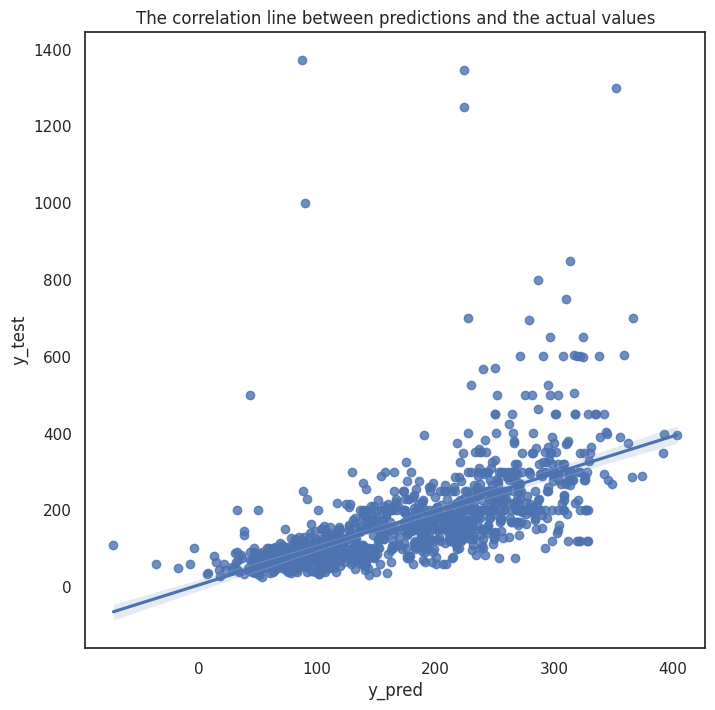

In [178]:
plt.figure(figsize=(8,8))
sns.regplot(x= preds_svr_best, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.show()

In [179]:
prediction_dictionaries['SVR'] = preds_svr_best

In [180]:
prediction_list['SVR'] = np.array(preds_svr_best[:20])
prediction_list

KNN  Decision Tree  Random Forest        SVR
Actual Values                                                    
279.000000    356.222718     319.000000     366.100000 316.118211
65.000000      74.766390      57.000000      63.400000 115.751529
35.000000      78.846244      70.000000      91.750000  77.969908
33.000000      61.759322      87.000000      54.850000 101.343816
229.000000    172.329349     169.000000     207.700000 210.014172
300.000000    210.475849     195.000000     218.050000 244.182508
100.000000    122.241956      80.000000     100.200000 142.472717
51.000000      82.868210      25.000000      48.500000  76.274932
138.000000    178.437012     150.000000     153.200000 114.888471
300.000000    290.137894     275.000000     346.300000 267.328043
199.000000    270.394967     319.000000     364.550000 303.273785
69.000000     108.701913      90.000000     105.800000  99.592826
119.000000    166.513040     319.000000     233.000000 320.756631
159.000000    195.109657     187.500000     186.400000 126.511129
50.000000      59.120305      50.000000      49.200000  30.075728
175.000000    208.412761     150.000000     259.700000 206.375618
229.000000    167.509470     250.000000     218.100000 251.464111
265.000000    220.794249     250.000000     204.550000 208.346666
149.000000    170.956883     150.000000     190.200000 303.589015
80.000000     115.069835      75.000000      86.000000  86.456830

## Model 5 - Neural Networks Regression

In [181]:
from sklearn.neural_network import MLPRegressor

nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
pred = nn_model.predict (X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('RMSE: ',mean_squared_error(y_test, pred, squared = False))

MAE:  56.64071019260873
RMSE:  100.31510500204291


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

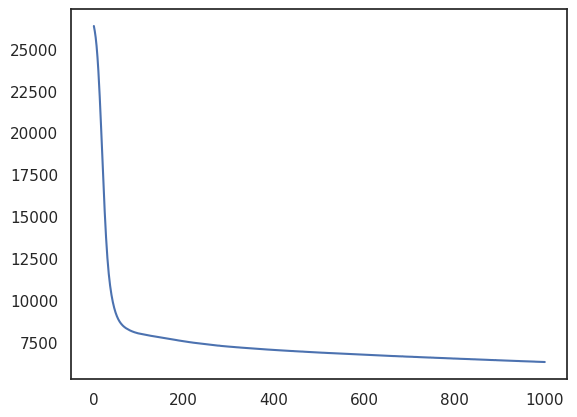

In [182]:
sns.lineplot(y=nn_model.loss_curve_, x= np.arange(1, len(nn_model.loss_curve_)+1))

<Axes: xlabel='price'>

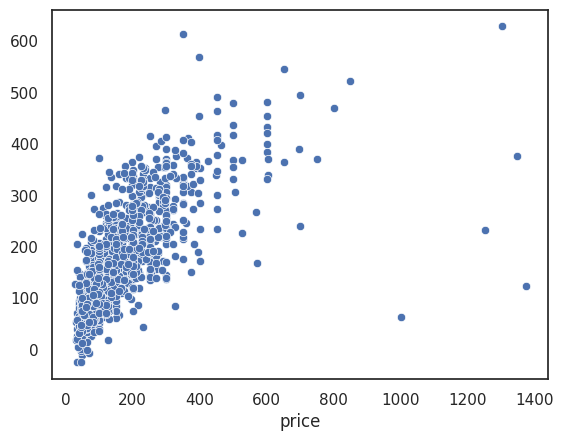

In [183]:
sns.scatterplot(x= y_test, y = pred)

In [184]:
df_results = pd.DataFrame(columns=['Learning Rate', 'Transfer Function',  'RMSE'])
lr = [0.00001, 0.0001, 0.01, 0.03, 1, 3, 10]
transfer_function = ['identity', 'logistic', 'tanh', 'relu']
k=0
for i in lr:
  for j in transfer_function:
    nn_model = MLPRegressor(learning_rate_init= i, activation=j)
    nn_model.fit(X_train, y_train)
    pred = nn_model.predict(X_test)
    df_results.loc[k] = [i, j, mean_squared_error(y_test, pred, squared = False)]
    k+=1
print('All results')
print(tabulate(df_results, headers = 'keys', tablefmt = 'psql'))
print('Best performing model')
print(tabulate(df_results[df_results['RMSE']==df_results['RMSE'].min()], headers = 'keys', tablefmt = 'psql'))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

All results
+----+-----------------+---------------------+---------+
|    |   Learning Rate | Transfer Function   |    RMSE |
|----+-----------------+---------------------+---------|
|  0 |          1e-05  | identity            | 222.449 |
|  1 |          1e-05  | logistic            | 223.055 |
|  2 |          1e-05  | tanh                | 222.93  |
|  3 |          1e-05  | relu                | 222.851 |
|  4 |          0.0001 | identity            | 196.246 |
|  5 |          0.0001 | logistic            | 210.236 |
|  6 |          0.0001 | tanh                | 208.084 |
|  7 |          0.0001 | relu                | 184.89  |
|  8 |          0.01   | identity            | 109.218 |
|  9 |          0.01   | logistic            | 104.642 |
| 10 |          0.01   | tanh                | 101.775 |
| 11 |          0.01   | relu                | 101.051 |
| 12 |          0.03   | identity            | 110.25  |
| 13 |          0.03   | logistic            | 103.153 |
| 14 |          0.0

In [185]:
nn_model = MLPRegressor(learning_rate_init= 0.03, activation='logistic')
nn_model.fit(X_train, y_train)
preds_nn = nn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [186]:
mae_nn = mean_absolute_error(y_test, preds_nn)
rmse_nn = mean_squared_error(y_test, preds_nn, squared = False)

print('MAE: ', mae_nn)
print('RMSE: ',rmse_nn)

MAE:  55.638384352133286
RMSE:  101.97739744309875


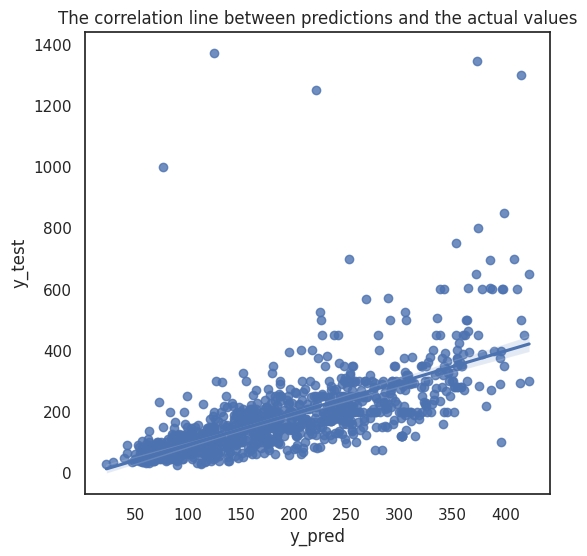

In [187]:
plt.figure(figsize=(6,6))
sns.regplot(x= preds_nn, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [188]:
prediction_dictionaries['Neural Network']  = preds_nn

In [189]:
prediction_list['Neural Network'] = np.array(preds_nn[:20])


## Model 6 - Linear Regression

In [190]:

lg_regr = linear_model.LinearRegression()
lg_regr.fit(X_train, y_train)

y_pred_lin = lg_regr.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_lin)
rmse_linear = mean_squared_error(y_test, y_pred_lin, squared = False)

print('MAE: ', mae_linear)
print('RMSE: ',rmse_linear)
print('R^2 Value: ', lg_regr.score(X_train, y_train))

MAE:  59.657952981222046
RMSE:  109.26366327964125
R^2 Value:  0.29982433479491666


In [191]:
prediction_list['Linear'] = np.array(y_pred_lin[:20])

In [192]:
prediction_dictionaries['Linear'] = y_pred_lin

In [193]:
from sklearn.linear_model import Ridge

alpha = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 250, 500, 750, 1000, 1500, 2500, 5000, 10000, 100000, 1000000]
param_grid = {
    'alpha': alpha
}

ridge = Ridge(alpha=1).fit(X_train, y_train)
scores = cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2')
scores_mse = cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("CV Mean for Ridge (r2): ", np.mean(scores))
print("CV Mean for Ridge (mse): ", np.mean(scores_mse) * -1)

CV Mean for Ridge (r2):  0.31494490792370283
CV Mean for Ridge (mse):  16787.185145850082


In [194]:
grid_mse = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_result_mse = grid_mse.fit(X_train, y_train)

grid_r2 = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result_r2 = grid_r2.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [195]:
print('Best Score for mse: ', grid_mse.best_score_ * -1)
print('Best Params for mse: ', grid_mse.best_params_)
print()
print('Best Score for r2: ', grid_r2.best_score_)
print('Best Params for r2: ', grid_r2.best_params_)

Best Score for mse:  16757.22872799213
Best Params for mse:  {'alpha': 250}

Best Score for r2:  0.3173937501846571
Best Params for r2:  {'alpha': 500}


In [196]:
ridge_best = Ridge(alpha=250).fit(X_train, y_train)
ridge_best.fit(X_train, y_train)
ridge_pred = ridge_best.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred)
rmse_ridge = mean_squared_error(y_test, ridge_pred, squared = False)

print('MAE: ',mae_ridge)
print('RMSE: ',rmse_ridge)

MAE:  54.77656574734183
RMSE:  109.06434590745893


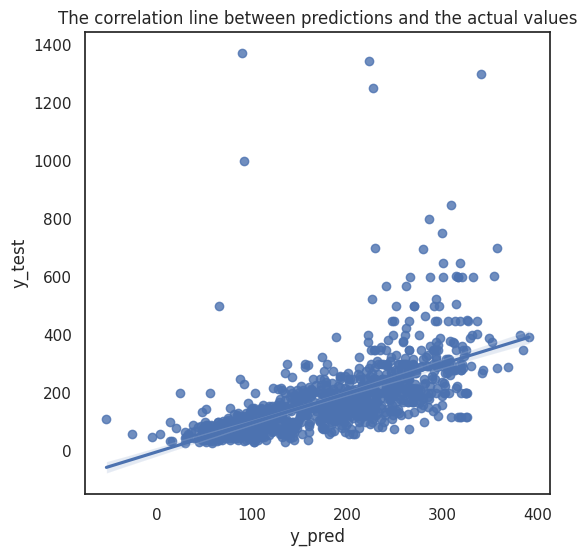

In [198]:
plt.figure(figsize=(6,6))
sns.regplot(x= ridge_pred, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.show()

In [199]:
prediction_dictionaries['Ridge'] = ridge_pred

In [200]:
prediction_list['Ridge'] = np.array(ridge_pred[:20])
prediction_list

KNN  Decision Tree  Random Forest        SVR  \
Actual Values                                                       
279.000000    356.222718     319.000000     366.100000 316.118211   
65.000000      74.766390      57.000000      63.400000 115.751529   
35.000000      78.846244      70.000000      91.750000  77.969908   
33.000000      61.759322      87.000000      54.850000 101.343816   
229.000000    172.329349     169.000000     207.700000 210.014172   
300.000000    210.475849     195.000000     218.050000 244.182508   
100.000000    122.241956      80.000000     100.200000 142.472717   
51.000000      82.868210      25.000000      48.500000  76.274932   
138.000000    178.437012     150.000000     153.200000 114.888471   
300.000000    290.137894     275.000000     346.300000 267.328043   
199.000000    270.394967     319.000000     364.550000 303.273785   
69.000000     108.701913      90.000000     105.800000  99.592826   
119.000000    166.513040     319.000000     233.000000 320.756631   
159.000000    195.109657     187.500000     186.400000 126.511129   
50.000000      59.120305      50.000000      49.200000  30.075728   
175.000000    208.412761     150.000000     259.700000 206.375618   
229.000000    167.509470     250.000000     218.100000 251.464111   
265.000000    220.794249     250.000000     204.550000 208.346666   
149.000000    170.956883     150.000000     190.200000 303.589015   
80.000000     115.069835      75.000000      86.000000  86.456830   

               Neural Network     Linear      Ridge  
Actual Values                                        
279.000000         354.241807 315.730972 312.914032  
65.000000           90.385453 116.005958 111.490444  
35.000000          116.070003  76.170426  91.054683  
33.000000          108.705830 102.488570 102.017347  
229.000000         234.585324 211.031539 215.375737  
300.000000         246.945584 243.832320 242.231028  
100.000000         129.707596 144.720992 144.828229  
51.000000           66.235090  78.718849  77.160292  
138.000000         142.339355 113.223937 121.293229  
300.000000         327.214162 267.103615 260.327184  
199.000000         316.038026 303.367476 302.054796  
69.000000          130.520780 100.855568 101.273464  
119.000000         301.646452 320.445601 318.035571  
159.000000         164.926343 127.166519 126.172418  
50.000000           73.205934  28.329406  30.239503  
175.000000         179.555196 204.800880 202.551937  
229.000000         285.335078 253.623551 246.904818  
265.000000         208.339558 209.447365 211.718061  
149.000000         283.782200 303.803023 293.694114  
80.000000          107.813199  86.718849  85.873102

## Model 7 - Random Forest Regressor

In [201]:
forest_model = RandomForestRegressor() #n_estimators is 100 by default
forest_model.fit(X_train, y_train)
forest_model_prediction = forest_model.predict(X_test)

forest_mae = mean_absolute_error(y_test,forest_model_prediction)
forest_rmse = mean_squared_error(y_test,forest_model_prediction, squared = False)

print('MAE: ', forest_mae)
print('RMSE: ', forest_rmse)

MAE:  50.38532527881041
RMSE:  104.48639543386537


In [202]:
prediction_dictionaries['Random Forest Regressor'] = forest_model_prediction

In [203]:
prediction_list['Random Forest Regressor'] = np.array(forest_model_prediction[:20])
prediction_list

KNN  Decision Tree  Random Forest        SVR  \
Actual Values                                                       
279.000000    356.222718     319.000000     366.100000 316.118211   
65.000000      74.766390      57.000000      63.400000 115.751529   
35.000000      78.846244      70.000000      91.750000  77.969908   
33.000000      61.759322      87.000000      54.850000 101.343816   
229.000000    172.329349     169.000000     207.700000 210.014172   
300.000000    210.475849     195.000000     218.050000 244.182508   
100.000000    122.241956      80.000000     100.200000 142.472717   
51.000000      82.868210      25.000000      48.500000  76.274932   
138.000000    178.437012     150.000000     153.200000 114.888471   
300.000000    290.137894     275.000000     346.300000 267.328043   
199.000000    270.394967     319.000000     364.550000 303.273785   
69.000000     108.701913      90.000000     105.800000  99.592826   
119.000000    166.513040     319.000000     233.000000 320.756631   
159.000000    195.109657     187.500000     186.400000 126.511129   
50.000000      59.120305      50.000000      49.200000  30.075728   
175.000000    208.412761     150.000000     259.700000 206.375618   
229.000000    167.509470     250.000000     218.100000 251.464111   
265.000000    220.794249     250.000000     204.550000 208.346666   
149.000000    170.956883     150.000000     190.200000 303.589015   
80.000000     115.069835      75.000000      86.000000  86.456830   

               Neural Network     Linear      Ridge  Random Forest Regressor  
Actual Values                                                                 
279.000000         354.241807 315.730972 312.914032               357.930000  
65.000000           90.385453 116.005958 111.490444                62.970000  
35.000000          116.070003  76.170426  91.054683               125.430000  
33.000000          108.705830 102.488570 102.017347                62.080000  
229.000000         234.585324 211.031539 215.375737               213.970000  
300.000000         246.945584 243.832320 242.231028               253.690000  
100.000000         129.707596 144.720992 144.828229               105.900000  
51.000000           66.235090  78.718849  77.160292                40.020000  
138.000000         142.339355 113.223937 121.293229               149.300000  
300.000000         327.214162 267.103615 260.327184               262.810000  
199.000000         316.038026 303.367476 302.054796               313.580000  
69.000000          130.520780 100.855568 101.273464               127.830000  
119.000000         301.646452 320.445601 318.035571               186.300000  
159.000000         164.926343 127.166519 126.172418               177.890000  
50.000000           73.205934  28.329406  30.239503                56.270000  
175.000000         179.555196 204.800880 202.551937               181.060000  
229.000000         285.335078 253.623551 246.904818               223.340000  
265.000000         208.339558 209.447365 211.718061               212.260000  
149.000000         283.782200 303.803023 293.694114               231.200000  
80.000000          107.813199  86.718849  85.873102                79.670000

## Model 8 - XGBoost

In [204]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
#training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

mae_xg = mean_absolute_error(y_test, val_preds_xgb_reg)
rmse_xg = mean_squared_error(y_test, val_preds_xgb_reg, squared = False)

print('MAE: ',mae_xg)
print('RMSE: ',rmse_xg)

MAE:  56.3769187554994
RMSE:  115.35515990391434


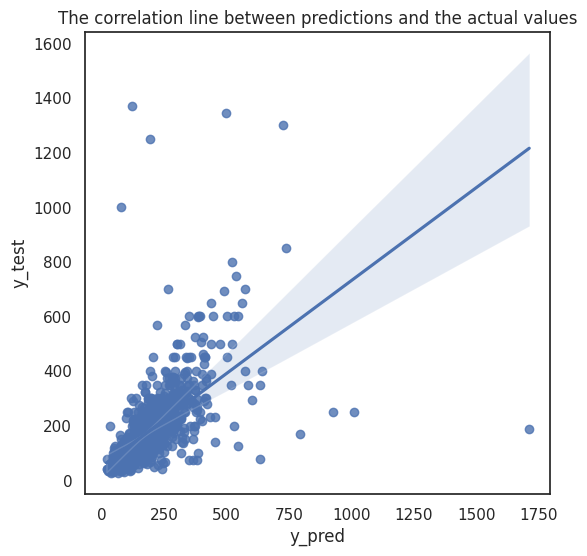

In [205]:
plt.figure(figsize=(6,6))
sns.regplot(x= val_preds_xgb_reg, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.savefig('knnline.png', dpi=300, bbox_inches='tight')
plt.show()

In [206]:
prediction_dictionaries['XGB'] = val_preds_xgb_reg
prediction_list['XGB'] = np.array(val_preds_xgb_reg[:20])

In [207]:
ft_weights_xgb_reg = xgb_reg.feature_importances_

feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': ft_weights_xgb_reg})
feature_df = feature_df.sort_values(by='Importance', ascending = False)
feature_df

Feature  Importance
25         room_type_Entire home/apt    0.530775
4                          bathrooms    0.066090
11                 number_of_reviews    0.044896
8                     minimum_nights    0.041300
15                               gym    0.028387
5                           bedrooms    0.026763
1                          longitude    0.025530
3                       accommodates    0.024233
23               property_type_House    0.020890
14  require_guest_phone_verification    0.020889
10                   availability_90    0.018381
17                          elevator    0.018047
7                    guests_included    0.013998
0                           latitude    0.013809
19                      pets_allowed    0.013059
16                                tv    0.011396
22              property_type_Camper    0.010675
24               property_type_Other    0.009817
30   review_scores_rating_95-100/100    0.008061
2                  is_location_exact    0.006480
27             room_type_Shared room    0.006445
28     review_scores_rating_0-79/100    0.005278
12                  instant_bookable    0.005231
18                          internet    0.005023
21           property_type_Apartment    0.004980
6                               beds    0.004514
26            room_type_Private room    0.004368
9                     maximum_nights    0.004216
29    review_scores_rating_80-94/100    0.002712
20                            secure    0.002589
13     require_guest_profile_picture    0.001166

In [208]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg = ft_weights_xgb_reg.sort_values('weight', ascending=False)
ft_weights_xgb_reg = ft_weights_xgb_reg.iloc[:15]

plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center')
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

### Hyper-parameter tuning for XBBoost

In [209]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = xgb.XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           scoring='neg_root_mean_squared_error',
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [210]:
hyperParameterTuning(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 5,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.5}

In [211]:
xgb_reg = xgb.XGBRegressor(colsample_bytree= 0.5,
 learning_rate = 0.01,
 max_depth= 10,
 min_child_weight= 1,
 n_estimators= 500,
 objective= 'reg:squarederror',
 subsample= 0.5)

xgb_reg.fit(X_train, y_train)

training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

mae_xgb = mean_absolute_error(y_test, val_preds_xgb_reg)
rmse_xgb = mean_squared_error(y_test, val_preds_xgb_reg, squared = False)

print('MAE: ', mae_xgb)
print('RMSE: ',rmse_xgb)

MAE:  49.108238496744946
RMSE:  96.48853629882187


In [212]:
plt.figure(figsize=(6,6))
sns.regplot(x= val_preds_xgb_reg, y = y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title("The correlation line between predictions and the actual values")
plt.show()

In [213]:
prediction_dictionaries['XGB'] = val_preds_xgb_reg
prediction_list['XGB'] = np.array(val_preds_xgb_reg[:20])

In [214]:
ft_weights_xgb_reg.rename(index={"room_type_Entire home/apt": "Entire home/apt"})

weight
Entire home/apt                  0.530775
bathrooms                        0.066090
number_of_reviews                0.044896
minimum_nights                   0.041300
gym                              0.028387
bedrooms                         0.026763
longitude                        0.025530
accommodates                     0.024233
property_type_House              0.020890
require_guest_phone_verification 0.020889
availability_90                  0.018381
elevator                         0.018047
guests_included                  0.013998
latitude                         0.013809
pets_allowed                     0.013059

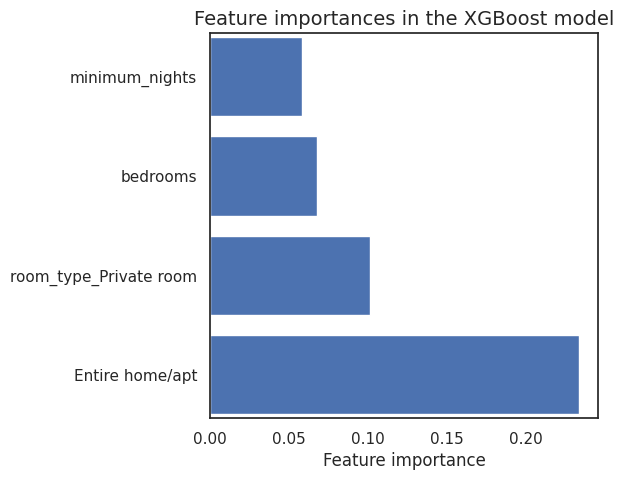

In [215]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg = ft_weights_xgb_reg.sort_values('weight', ascending=False)
ft_weights_xgb_reg = ft_weights_xgb_reg.iloc[:4]

ft_weights_xgb_reg = ft_weights_xgb_reg.rename(index={"room_type_Entire home/apt": "Entire home/apt"})

plt.figure(figsize=(5,5))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center')
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.savefig('impfeatures2.png')
plt.show()

In [216]:
models = [('kNN', rmse_knn),
          ('Decision Tree', rmse_dt),
          ('SVR', rmse_svr),
          ('Neural Networks',rmse_nn),
          #('Linear Regression', rmse_linear),
          ('Ridge', rmse_ridge),
          #('XG Boost', rmse_xg),
          ('XGB', rmse_xgb)]


df_all_models = pd.DataFrame(models, columns = ['Model', 'RMSE'])
df_all_models = df_all_models.set_index('Model')
df_all_models.sort_values(by=['RMSE'])


RMSE
Model                     
XGB              96.488536
Neural Networks 101.977397
kNN             103.162330
Ridge           109.064346
SVR             109.327629
Decision Tree   121.195553

In [217]:
prediction_list

KNN  Decision Tree  Random Forest        SVR  \
Actual Values                                                       
279.000000    356.222718     319.000000     366.100000 316.118211   
65.000000      74.766390      57.000000      63.400000 115.751529   
35.000000      78.846244      70.000000      91.750000  77.969908   
33.000000      61.759322      87.000000      54.850000 101.343816   
229.000000    172.329349     169.000000     207.700000 210.014172   
300.000000    210.475849     195.000000     218.050000 244.182508   
100.000000    122.241956      80.000000     100.200000 142.472717   
51.000000      82.868210      25.000000      48.500000  76.274932   
138.000000    178.437012     150.000000     153.200000 114.888471   
300.000000    290.137894     275.000000     346.300000 267.328043   
199.000000    270.394967     319.000000     364.550000 303.273785   
69.000000     108.701913      90.000000     105.800000  99.592826   
119.000000    166.513040     319.000000     233.000000 320.756631   
159.000000    195.109657     187.500000     186.400000 126.511129   
50.000000      59.120305      50.000000      49.200000  30.075728   
175.000000    208.412761     150.000000     259.700000 206.375618   
229.000000    167.509470     250.000000     218.100000 251.464111   
265.000000    220.794249     250.000000     204.550000 208.346666   
149.000000    170.956883     150.000000     190.200000 303.589015   
80.000000     115.069835      75.000000      86.000000  86.456830   

               Neural Network     Linear      Ridge  Random Forest Regressor  \
Actual Values                                                                  
279.000000         354.241807 315.730972 312.914032               357.930000   
65.000000           90.385453 116.005958 111.490444                62.970000   
35.000000          116.070003  76.170426  91.054683               125.430000   
33.000000          108.705830 102.488570 102.017347                62.080000   
229.000000         234.585324 211.031539 215.375737               213.970000   
300.000000         246.945584 243.832320 242.231028               253.690000   
100.000000         129.707596 144.720992 144.828229               105.900000   
51.000000           66.235090  78.718849  77.160292                40.020000   
138.000000         142.339355 113.223937 121.293229               149.300000   
300.000000         327.214162 267.103615 260.327184               262.810000   
199.000000         316.038026 303.367476 302.054796               313.580000   
69.000000          130.520780 100.855568 101.273464               127.830000   
119.000000         301.646452 320.445601 318.035571               186.300000   
159.000000         164.926343 127.166519 126.172418               177.890000   
50.000000           73.205934  28.329406  30.239503                56.270000   
175.000000         179.555196 204.800880 202.551937               181.060000   
229.000000         285.335078 253.623551 246.904818               223.340000   
265.000000         208.339558 209.447365 211.718061               212.260000   
149.000000         283.782200 303.803023 293.694114               231.200000   
80.000000          107.813199  86.718849  85.873102                79.670000   

                     XGB  
Actual Values             
279.000000    345.571228  
65.000000      59.208847  
35.000000      97.506218  
33.000000      79.426544  
229.000000    213.172958  
300.000000    230.581848  
100.000000    128.959595  
51.000000      62.044579  
138.000000    137.300125  
300.000000    291.231079  
199.000000    265.558380  
69.000000     129.984711  
119.000000    194.056702  
159.000000    175.545883  
50.000000      54.799625  
175.000000    190.988220  
229.000000    263.940094  
265.000000    215.765350  
149.000000    295.173706  
80.000000      76.340012